Egaroucidのソース改変用なので無視してよい1

In [ ]:
%%file /content/drive/MyDrive/MyIntern/console/print.hpp

/*
    Egaroucid Project

    @file print.hpp
        Functions about printing on console
    @date 2021-2023
    @author Takuto Yamana (a.k.a. Nyanyan)
    @license GPL-3.0 license
*/

#pragma once
#include <iostream>
#include <unordered_map>
#include "./../engine/engine_all.hpp"
#include "option.hpp"
#include "info.hpp"
#include "command_definition.hpp"
#include "commandline_option_definition.hpp"
#include "function.hpp"

#define COUT_TAB "  "
#define VERSION_TAB_SIZE 10
#define COMMANDLINE_OPTION_HELP_TAB_SIZE 40
#define COMMAND_HELP_TAB_SIZE 40
#define LEVEL_INFO_TAB_SIZE 5
#define LEVEL_MIDGAME_TAB_SIZE 15
#define LEVEL_DEPTH_TAB_SIZE 10
#define SEARCH_RESULT_TAB_SIZE 15
#define ANALYZE_TAB_SIZE 13
#define ANALYZE_SUMMARY_TAB_SIZE 13

struct Analyze_summary{
    int n_ply;
    int n_disagree;
    int sum_disagree;
    int n_mistake;
    int sum_mistake;

    Analyze_summary(){
        n_ply = 0;
        n_disagree = 0;
        sum_disagree = 0;
        n_mistake = 0;
        sum_mistake = 0;
    }
};

void print_version(){
    std::cout << EGAROUCID_NAME << " " << EGAROUCID_VERSION << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@date ";
    std::cout << EGAROUCID_DATE << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@author ";
    std::cout << EGAROUCID_AUTHOR << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@license ";
    std::cout << EGAROUCID_LICENSE << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@website ";
    std::cout << EGAROUCID_URL << std::endl;
    std::cout << std::endl;
}

void print_commandline_options_list(){
    std::cout << "Commandline options:" << std::endl;
    for (int i = 0; i < N_COMMANDLINE_OPTIONS; ++i){
        std::string s;
        for (int j = 0; j < (int)commandline_option_data[i].names.size(); ++j){
            if (j != 0)
                s += "|";
            s += commandline_option_data[i].names[j];
        }
        s += " " + commandline_option_data[i].arg;
        std::cout << COUT_TAB;
        std::cout << std::left << std::setw(COMMANDLINE_OPTION_HELP_TAB_SIZE) << s;
        std::cout << commandline_option_data[i].description;
        std::cout << std::endl;
    }
    std::cout << std::endl;
}

void print_commands_list(){
    std::cout << "Commands:" << std::endl;
    for (int i = 0; i < N_COMMANDS; ++i){
        std::string s;
        for (int j = 0; j < (int)command_data[i].names.size(); ++j){
            if (j != 0)
                s += "|";
            s += command_data[i].names[j];
        }
        s += " " + command_data[i].arg;
        std::cout << COUT_TAB;
        std::cout << std::left << std::setw(COMMAND_HELP_TAB_SIZE) << s;
        std::cout << command_data[i].description;
        std::cout << std::endl;
    }
    std::cout << std::endl;
}

void print_help(){
    print_version();
    print_commandline_options_list();
    print_commands_list();
}

void print_level_info(){
    const std::string probability_char = "_-=+^#";
    std::cout << "Level definition:" << std::endl;
    std::cout << COUT_TAB;
    std::cout << "Endgame probability" << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 78%: " << probability_char[MPC_78_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 81%: " << probability_char[MPC_81_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 95%: " << probability_char[MPC_95_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 98%: " << probability_char[MPC_98_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 99%: " << probability_char[MPC_99_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << "100%: " << probability_char[MPC_100_LEVEL] << std::endl;
    std::cout << COUT_TAB;
    std::cout << "|";
    std::cout << std::right << std::setw(LEVEL_INFO_TAB_SIZE) << "Level";
    std::cout << "|";
    std::cout << std::left << std::setw(LEVEL_MIDGAME_TAB_SIZE) << "Midgame";
    std::cout << "|";
    std::string str_endgame_10 = "Endgame " + std::to_string(LEVEL_DEPTH_TAB_SIZE);
    std::cout << std::right << std::setw(LEVEL_DEPTH_TAB_SIZE) << str_endgame_10;
    std::cout << "|";
    for (int depth = LEVEL_DEPTH_TAB_SIZE * 2; depth <= 60; depth += LEVEL_DEPTH_TAB_SIZE){
        std::cout << std::right << std::setw(LEVEL_DEPTH_TAB_SIZE) << depth;
        std::cout << "|";
    }
    std::cout << std::endl;
    for (int level = 0; level < N_LEVEL; ++level){
        std::cout << COUT_TAB;
        std::cout << "|";
        std::cout << std::right << std::setw(LEVEL_INFO_TAB_SIZE) << level;
        std::cout << "|";
        std::string s;
        if (get_level_midsearch(level, 0))
            s = std::to_string(level_definition[level].mid_lookahead) + " moves@" + std::to_string(SELECTIVITY_PERCENTAGE[level_definition[level].mid_mpc_level]) + "%";
        else
            s = "None";
        std::cout << std::right << std::setw(LEVEL_MIDGAME_TAB_SIZE) << s;
        for (int n_moves = 0; n_moves < HW2 - 4; ++n_moves){
            if (n_moves % LEVEL_DEPTH_TAB_SIZE == 0)
                std::cout << "|";
            bool is_mid_search;
            uint_fast8_t mpc_level;
            int depth;
            get_level(level, n_moves, &is_mid_search, &depth, &mpc_level);
            if (is_mid_search)
                std::cout << " ";
            else{
                std::cout << probability_char[mpc_level];
            }
        }
        std::cout << "|";
        std::cout << std::endl;
    }
}

void print_board_info(Board_info *board){
    uint64_t black = board->board.player;
    uint64_t white = board->board.opponent;
    if (board->player == WHITE)
        std::swap(black, white);
    std::cout << "  ";
    for (int x = 0; x < HW; ++x)
        std::cout << (char)('a' + x) << " ";
    std::cout << std::endl;
    for (int y = 0; y < HW; ++y){
        std::cout << y + 1 << " ";
        for (int x = 0; x < HW; ++x){
            int cell = HW2_M1 - (y * HW + x);
            if (1 & (black >> cell))
                std::cout << "X ";
            else if (1 & (white >> cell))
                std::cout << "O ";
            else
                std::cout << ". ";
        }
        if (y == 2){
            std::cout << COUT_TAB;
            if (board->board.is_end())
                std::cout << "GAME OVER";
            else if (board->player == BLACK)
                std::cout << "BLACK to move";
            else
                std::cout << "WHITE to move";
        } else if (y == 3){
            std::cout << COUT_TAB;
            std::cout << "ply " << board->board.n_discs() - 3 << " " << HW2 - board->board.n_discs() << " empties";
        } else if (y == 4){
            std::cout << COUT_TAB;
            int black_discs, white_discs;
            black_discs = board->board.count_player();
            white_discs = board->board.count_opponent();
            if (board->player)
                std::swap(black_discs, white_discs);
            std::cout << "BLACK: " << black_discs << " WHITE: " << white_discs;
        }
        std::cout << std::endl;
    }
}

inline void print_search_result_body(Search_result result, int level){
    std::string s;
    if (result.depth == SEARCH_BOOK){
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << level;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Book";
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << idx_to_coord(result.policy);
        // std::cout << "|";
        std::cout << std::to_string(result.policy) << std::endl;
        if (result.value >= 0)
            s = "+" + std::to_string(result.value);
        else
            s = std::to_string(result.value);
        std::cout << s;
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // s = ms_to_time(0);
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << 0;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << 0;
        // std::cout << "|";
        std::cout << std::endl;
    } else{
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << level;
        // std::cout << "|";
        // s = std::to_string(result.depth) + "@" + std::to_string(result.probability) + "%";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << idx_to_coord(result.policy);
        // std::cout << "|";
        std::cout << std::to_string(result.policy) << std::endl;
        if (result.value >= 0)
            s = "+" + std::to_string(result.value);
        else
            s = std::to_string(result.value);
        std::cout << s;
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // s = ms_to_time(result.time);
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << result.nodes;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << result.nps;
        // std::cout << "|";
        std::cout << std::endl;
    }
}

inline void print_search_result_head(){
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Level";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Depth";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Move";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Score";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Time";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Nodes";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "NPS";
    std::cout << "|";
    std::cout << std::endl;
}

inline void print_search_result(Search_result result, int level){
    print_search_result_head();
    print_search_result_body(result, level);
}

void print_search_result_quiet(Search_result result){
    std::cout << idx_to_coord(result.policy) << std::endl;
}

inline void print_analyze_body(Analyze_result result, int ply, int player, std::string judge){
    std::string s;
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << ply;
    std::cout << "|";
    if (player == BLACK)
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Black";
    else
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "White";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << idx_to_coord(result.played_move);
    std::cout << "|";
    if (result.played_depth == SEARCH_BOOK)
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Book";
    else{
        s = std::to_string(result.played_depth) + "@" + std::to_string(result.played_probability) + "%";
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
    }
    std::cout << "|";
    if (result.played_score >= 0)
        s = "+" + std::to_string(result.played_score);
    else
        s = std::to_string(result.played_score);
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
    std::cout << "|";
    if (result.alt_move != -1){
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << idx_to_coord(result.alt_move);
        std::cout << "|";
        if (result.alt_depth == SEARCH_BOOK)
            std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Book";
        else{
            s = std::to_string(result.alt_depth) + "@" + std::to_string(result.alt_probability) + "%";
            std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
        }
        std::cout << "|";
        if (result.alt_score >= 0)
            s = "+" + std::to_string(result.alt_score);
        else
            s = std::to_string(result.alt_score);
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
        std::cout << "|";
    } else{
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "None";
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "";
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "";
        std::cout << "|";
    }
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << judge;
    std::cout << "|";
    std::cout << std::endl;
}

inline void print_analyze_head(){
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Ply";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Player";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Played";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Depth";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Score";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Alternative";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Depth";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Score";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Judge";
    std::cout << "|";
    std::cout << std::endl;
}

inline void print_analyze_foot(Analyze_summary summary[]){
    std::cout << std::endl;
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Player";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Disagree";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Disagree Loss";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Disagree Rate";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Mistake";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Mistake Loss";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Mistake Rate";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Avg. Error";
    std::cout << "|";
    std::cout << std::endl;
    std::string s;
    for (int i = 0; i < 2; ++i){
        std::cout << "|";
        if (i == BLACK)
            std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Black";
        else
            std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "White";
        std::cout << "|";
        std::stringstream ss_disagree;
        ss_disagree << std::right << std::setw(2) << summary[i].n_disagree;
        ss_disagree << " / ";
        ss_disagree << std::right << std::setw(2) << summary[i].n_ply;
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << ss_disagree.str();
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << summary[i].sum_disagree;
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << std::fixed << std::setprecision(3) << ((double)summary[i].n_disagree / summary[i].n_ply);
        std::cout << "|";
        std::stringstream ss_mistake;
        ss_mistake << std::right << std::setw(2) << summary[i].n_mistake;
        ss_mistake << " / ";
        ss_mistake << std::right << std::setw(2) << summary[i].n_ply;
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << ss_mistake.str();
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << summary[i].sum_mistake;
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << std::fixed << std::setprecision(3) << ((double)summary[i].n_mistake / summary[i].n_ply);
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << std::fixed << std::setprecision(3) << ((double)(summary[i].sum_disagree + summary[i].sum_mistake) / summary[i].n_ply);
        std::cout << "|";
        std::cout << std::endl;
    }
}

void print_special_commandline_options(std::vector<Commandline_option> commandline_options){
    if (find_commandline_option(commandline_options, ID_VERSION) == OPTION_FOUND){
        print_version();
        std::exit(0);
    }
    if (find_commandline_option(commandline_options, ID_HELP) == OPTION_FOUND){
        print_help();
        std::exit(0);
    }
    if (find_commandline_option(commandline_options, ID_LEVEL_INFO) == OPTION_FOUND){
        print_level_info();
        std::exit(0);
    }
}

void execute_special_commandline_tasks(std::vector<Commandline_option> commandline_options, Options *options, State *state){
    if (find_commandline_option(commandline_options, ID_SOLVE) != OPTION_NOT_FOUND){
        solve_problems(find_commandline_option(commandline_options, ID_SOLVE), options, state);
        std::exit(0);
    }
}

Overwriting /content/drive/MyDrive/MyIntern/console/print.hpp


Egaroucidのソース改変用なので無視してよい2

In [ ]:
%%file /content/drive/MyDrive/MyIntern/console/command.hpp



/*
    Egaroucid Project

    @file command.hpp
        Commands for Egaroucid
    @date 2021-2023
    @author Takuto Yamana (a.k.a. Nyanyan)
    @license GPL-3.0 license
*/

#pragma once
#include <iostream>
#include <string>
#include <sstream>
#include <cctype>
#include <algorithm>
#include "./../engine/engine_all.hpp"
#include "board_info.hpp"
#include "option.hpp"
#include "state.hpp"
#include "close.hpp"
#include "print.hpp"
#include "command_definition.hpp"

#define ANALYZE_MISTAKE_THRESHOLD 4

std::string get_command_line(){
    std::cerr << "> ";
    std::string cmd_line;
    std::getline(std::cin, cmd_line);
    return cmd_line;
}

void split_cmd_arg(std::string cmd_line, std::string *cmd, std::string *arg){
    std::istringstream iss(cmd_line);
    iss >> *cmd;
    iss.get();
    std::getline(iss, *arg);
}

int get_command_id(std::string cmd){
    for (int i = 0; i < N_COMMANDS; ++i){
        if (std::find(command_data[i].names.begin(), command_data[i].names.end(), cmd) != command_data[i].names.end())
            return command_data[i].id;
    }
    return COMMAND_NOT_FOUND;
}

void init_board(Board_info *board){
    board->reset();
}

void new_board(Board_info *board){
    board->board = board->boards[0].copy();
    board->player = board->players[0];
    board->boards.clear();
    board->players.clear();
    board->boards.emplace_back(board->board);
    board->players.emplace_back(board->player);
    board->ply_vec = 0;
}

bool outside(int y, int x){
    return y < 0 || HW <= y || x < 0 || HW <= x;
}

void play(Board_info *board, std::string transcript){
    if (transcript.length() % 2){
        std::cerr << "[ERROR] invalid transcript length" << std::endl;
        return;
    }
    Board_info board_bak = board->copy();
    while (board->ply_vec < (int)board->boards.size() - 1){
        board->boards.pop_back();
        board->players.pop_back();
    }
    Flip flip;
    for (int i = 0; i < (int)transcript.length(); i += 2){
        int x = HW_M1 - (int)(transcript[i] - 'a');
        if (x >= HW)
            x = HW_M1 - (int)(transcript[i] - 'A');
        int y = HW_M1 - (int)(transcript[i + 1] - '1');
        if (outside(y, x)){
            std::cerr << "[ERROR] invalid coordinate " << transcript[i] << transcript[i + 1] << std::endl;
            *board = board_bak;
            return;
        }
        calc_flip(&flip, &board->board, y * HW + x);
        if (flip.flip == 0ULL){
            std::cerr << "[ERROR] invalid move " << transcript[i] << transcript[i + 1] << std::endl;
            *board = board_bak;
            return;
        }
        board->board.move_board(&flip);
        board->player ^= 1;
        if (board->board.is_end() && i < (int)transcript.length() - 2){
            std::cerr << "[ERROR] game over found before checking all transcript. remaining codes ignored." << std::endl;
            return;
        }
        if (board->board.get_legal() == 0ULL){
            board->board.pass();
            board->player ^= 1;
        }
        board->boards.emplace_back(board->board);
        board->players.emplace_back(board->player);
        ++board->ply_vec;
    }
}

int calc_remain(std::string arg){
    int remain = 1;
    try{
        remain = std::stoi(arg);
    } catch (const std::invalid_argument& ex){
        remain = 1;
    } catch (const std::out_of_range& ex){
        remain = 1;
    }
    if (remain <= 0)
        remain = 1;
    return remain;
}

void undo(Board_info *board, int remain){
    if (remain == 0)
        return;
    if (board->ply_vec <= 0){
        std::cerr << "[ERROR] can't undo" << std::endl;
        return;
    }
    --board->ply_vec;
    board->board = board->boards[board->ply_vec].copy();
    board->player = board->players[board->ply_vec];
    undo(board, remain - 1);
}

void redo(Board_info *board, int remain){
    if (remain == 0)
        return;
    if (board->ply_vec >= (int)board->boards.size() - 1){
        std::cerr << "[ERROR] can't redo" << std::endl;
        return;
    }
    ++board->ply_vec;
    board->board = board->boards[board->ply_vec].copy();
    board->player = board->players[board->ply_vec];
    redo(board, remain - 1);
}

Search_result go_noprint(Board_info *board, Options *options, State *state){
    if (board->board.is_end()){
        std::cerr << "[ERROR] game over" << std::endl;
        Search_result res;
        return res;
    }
    Search_result result = ai(board->board, options->level, true, BOOK_ACCURACY_LEVEL_INF, true, options->show_log, state->date);
    ++state->date;
    state->date = manage_date(state->date);
    Flip flip;
    calc_flip(&flip, &board->board, result.policy);
    board->board.move_board(&flip);
    board->player ^= 1;
    if (board->board.get_legal() == 0ULL){
        board->board.pass();
        board->player ^= 1;
    }
    while (board->ply_vec < (int)board->boards.size() - 1){
        board->boards.pop_back();
        board->players.pop_back();
    }
    board->boards.emplace_back(board->board);
    board->players.emplace_back(board->player);
    ++board->ply_vec;
    return result;
}

void go(Board_info *board, Options *options, State *state){
    Search_result result = go_noprint(board, options, state);
    if (options->quiet)
        print_search_result_quiet(result);
    else
        print_search_result(result, options->level);
}

void setboard(Board_info *board, std::string board_str){
    board_str.erase(std::remove_if(board_str.begin(), board_str.end(), ::isspace), board_str.end());
    if (board_str.length() != HW2 + 1){
        std::cerr << "[ERROR] invalid argument" << std::endl;
        return;
    }
    Board new_board;
    int player = BLACK;
    new_board.player = 0ULL;
    new_board.opponent = 0ULL;
    for (int i = 0; i < HW2; ++i){
        if (board_str[i] == 'B' || board_str[i] == 'b' || board_str[i] == 'X' || board_str[i] == 'x' || board_str[i] == '0' || board_str[i] == '*')
            new_board.player |= 1ULL << (HW2_M1 - i);
        else if (board_str[i] == 'W' || board_str[i] == 'w' || board_str[i] == 'O' || board_str[i] == 'o' || board_str[i] == '1')
            new_board.opponent |= 1ULL << (HW2_M1 - i);
    }
    if (board_str[HW2] == 'B' || board_str[HW2] == 'b' || board_str[HW2] == 'X' || board_str[HW2] == 'x' || board_str[HW2] == '0' || board_str[HW2] == '*')
        player = BLACK;
    else if (board_str[HW2] == 'W' || board_str[HW2] == 'w' || board_str[HW2] == 'O' || board_str[HW2] == 'o' || board_str[HW2] == '1')
        player = WHITE;
    else{
        std::cerr << "[ERROR] invalid player argument" << std::endl;
        return;
    }
    if (player == WHITE)
        std::swap(new_board.player, new_board.opponent);
    board->board = new_board.copy();
    board->player = player;
    board->boards.clear();
    board->players.clear();
    board->boards.emplace_back(board->board);
    board->players.emplace_back(board->player);
    board->ply_vec = 0;
}

void set_level(Options *options, std::string level_str){
    try {
        int level = std::stoi(level_str);
        if (0 <= level && level < N_LEVEL){
            options->level = level;
            if (options->show_log)
                std::cerr << "level set to " << options->level << std::endl;
        } else
            std::cerr << "[ERROR] level out of range" << std::endl;
    } catch (const std::invalid_argument& e) {
        std::cerr << "[ERROR] invalid level" << std::endl;
    } catch (const std::out_of_range& e) {
        std::cerr << "[ERROR] level invalid argument" << std::endl;
    }
}

void set_mode(Options *options, std::string mode_str){
    try {
        int mode = std::stoi(mode_str);
        if (0 <= mode && mode < 4){
            options->mode = mode;
            if (options->show_log)
                std::cerr << "mode set to " << options->mode << std::endl;
        } else
            std::cerr << "[ERROR] mode out of range" << std::endl;
    } catch (const std::invalid_argument& e) {
        std::cerr << "[ERROR] invalid mode" << std::endl;
    } catch (const std::out_of_range& e) {
        std::cerr << "[ERROR] mode invalid argument" << std::endl;
    }
}

void hint(Board_info *board, Options *options, State *state, std::string arg){
    int n_show = 1;
    try {
        n_show = std::stoi(arg);
        if (n_show < 1)
            n_show = 1;
    } catch (const std::invalid_argument& e) {
        n_show = 1;
    } catch (const std::out_of_range& e) {
        n_show = 1;
    }
    uint64_t legal = board->board.get_legal();
    if (n_show > pop_count_ull(legal))
        n_show = pop_count_ull(legal);
    std::cout << pop_count_ull(legal) << std::endl;
    std::vector<Search_result> result = book.get_all_moves_with_value(&board->board);
    //std::cout << "(int)result.size() = " << (int)result.size() << std::endl;
    //ここでnobookなので (int)result.size() =0
    if ((int)result.size() < n_show){
        for (const Search_result &elem: result)
            legal ^= 1ULL << elem.policy;
        int n_check = n_show + n_show / 4 - (int)result.size();
        if (n_check > pop_count_ull(legal))
            n_check = pop_count_ull(legal);
        std::vector<Flip_value> move_list(pop_count_ull(legal));
        int idx = 0;
        for (uint_fast8_t cell = first_bit(&legal); legal; cell = next_bit(&legal))
            calc_flip(&move_list[idx++].flip, &board->board, cell);
        int presearch_level = options->level / 2;
        Board n_board = board->board.copy();
        for (Flip_value &flip_value: move_list){
            n_board.move_board(&flip_value.flip);
                flip_value.value = -ai(n_board, presearch_level, true, BOOK_ACCURACY_LEVEL_INF, true, false, state->date).value;
                ++state->date;
                state->date = manage_date(state->date);
            n_board.undo_board(&flip_value.flip);
        }
        std::sort(move_list.rbegin(), move_list.rend());




        //std::cout << "(int)move_list.size() = " << (int)move_list.size() << std::endl;



        for (int i = 0; i < (int)move_list.size(); ++i){//n_check => (int)move_list.size()
            n_board.move_board(&move_list[i].flip);
                Search_result elem = ai(n_board, options->level, true, BOOK_ACCURACY_LEVEL_INF, true, false, state->date);
                ++state->date;
                state->date = manage_date(state->date);
                elem.value *= -1;
                elem.policy = move_list[i].flip.pos;
            n_board.undo_board(&move_list[i].flip);
            result.emplace_back(elem);
        }
    }
    std::sort(result.rbegin(), result.rend());
    //print_search_result_head();
    for (int i = 0; i < (int)result.size(); ++i){
        //std::cout << "(int)result.size() = " << (int)result.size() << std::endl;
        print_search_result_body(result[i], options->level);
    }
}

inline void analyze(Board_info *board, Options *options, State *state){
    print_analyze_head();
    Analyze_summary summary[2];
    for (int i = (int)board->boards.size() - 2; i >= 0; --i){
        Board n_board = board->boards[i].copy();
        uint64_t played_board = (n_board.player | n_board.opponent) ^ (board->boards[i + 1].player | board->boards[i + 1].opponent);
        if (pop_count_ull(played_board) == 1){
            uint_fast8_t played_move = ntz(played_board);
            Analyze_result result = ai_analyze(n_board, options->level, true, state->date, played_move);
            ++state->date;
            state->date = manage_date(state->date);
            std::string judge = "";
            ++summary[board->players[i]].n_ply;
            if (result.alt_score > result.played_score){
                if (result.alt_score - result.played_score >= ANALYZE_MISTAKE_THRESHOLD){
                    ++summary[board->players[i]].n_mistake;
                    summary[board->players[i]].sum_mistake += result.alt_score - result.played_score;
                    judge = "Mistake";
                } else{
                    ++summary[board->players[i]].n_disagree;
                    summary[board->players[i]].sum_disagree += result.alt_score - result.played_score;
                    judge = "Disagree";
                }
            }
            int ply = n_board.n_discs() - 3;
            print_analyze_body(result, ply, board->players[i], judge);
        }
    }
    print_analyze_foot(summary);
}

void check_command(Board_info *board, State *state, Options *options){
    std::string cmd_line = get_command_line();
    std::string cmd, arg;
    split_cmd_arg(cmd_line, &cmd, &arg);
    int cmd_id = get_command_id(cmd);
    switch (cmd_id){
        case COMMAND_NOT_FOUND:
            std::cout << "[ERROR] command `" << cmd << "` not found" << std::endl;
            break;
        case CMD_ID_HELP:
            print_commands_list();
            break;
        case CMD_ID_EXIT:
            close(state, options);
            break;
        case CMD_ID_VERSION:
            print_version();
            break;
        case CMD_ID_INIT:
            init_board(board);
            break;
        case CMD_ID_NEW:
            new_board(board);
            break;
        case CMD_ID_PLAY:
            play(board, arg);
            break;
        case CMD_ID_UNDO:
            undo(board, calc_remain(arg));
            break;
        case CMD_ID_REDO:
            redo(board, calc_remain(arg));
            break;
        case CMD_ID_GO:
            go(board, options, state);
            break;
        case CMD_ID_SETBOARD:
            setboard(board, arg);
            break;
        case CMD_ID_LEVEL:
            set_level(options, arg);
            break;
        case CMD_ID_LEVELINFO:
            print_level_info();
            break;
        case CMD_ID_MODE:
            set_mode(options, arg);
            break;
        case CMD_ID_HINT:
            hint(board, options, state, arg);
            break;
        case CMD_ID_ANALYZE:
            analyze(board, options, state);
            break;
        default:
            break;
    }
}

Overwriting /content/drive/MyDrive/MyIntern/console/command.hpp


Egaroucidのソース改変用なので無視してよい3

In [ ]:
%%file MyEgaroucid_console.cpp
/*
	Egaroucid Project

	@file Egaroucid_console.cpp
		Main file for Console application
	@date 2021-2023
	@author Takuto Yamana (a.k.a. Nyanyan)
	@license GPL-3.0 license
*/

#include <iostream>
#include "/content/drive/MyDrive/MyIntern/engine/engine_all.hpp"
#include "/content/drive/MyDrive/MyIntern/console/console_all.hpp"

void init_console(Options options){
    thread_pool.resize(std::max(0, options.n_threads - 1));
    bit_init();
    mobility_init();
    flip_init();
    endsearch_init();
    #if USE_MPC_PRE_CALCULATION
        mpc_init();
    #endif
    hash_resize(DEFAULT_HASH_LEVEL, options.hash_level, options.binary_path, options.show_log);
    stability_init();
    if (!evaluate_init(options.eval_file, options.show_log))
        std::exit(0);
    if (!options.nobook)
        book_init(options.book_file, options.show_log);
    if (options.show_log)
        std::cerr << "initialized" << std::endl;
}

int main(int argc, char* argv[]){
    State state;
    std::string binary_path = get_binary_path();
    std::vector<Commandline_option> commandline_options = get_commandline_options(argc, argv);
    Options options = get_options(commandline_options, binary_path);
    print_special_commandline_options(commandline_options);
    init_console(options);
    execute_special_tasks();
    execute_special_commandline_tasks(commandline_options, &options, &state);
    Board_info board;
    board.reset();
    while (true){
        if (options.gtp){
            gtp_check_command(&board, &state, &options);
        }else {
            if (!options.quiet){
                print_board_info(&board);
                std::cout << std::endl;
            }
            if (!execute_special_tasks_loop(&board, &state, &options))
                check_command(&board, &state, &options);
        }
    }
    return 0;
}

Writing MyEgaroucid_console.cpp


In [ ]:
!g++ -O2 MyEgaroucid_console.cpp -o /content/drive/MyDrive/MyIntern/bin/MyEgaroucid_for_Console.out -mtune=native -march=native -mfpmath=both -pthread -std=c++17 -Wall -Wextra -DHAS_NO_AVX2

In file included from /content/drive/MyDrive/MyIntern/engine/midsearch.hpp:17,
                 from /content/drive/MyDrive/MyIntern/engine/ai.hpp:17,
                 from /content/drive/MyDrive/MyIntern/engine/engine_all.hpp:12,
                 from MyEgaroucid_console.cpp:12:
/content/drive/MyDrive/MyIntern/engine/common.hpp: In function ‘int get_localtime(tm*, time_t*)’:
/content/drive/MyDrive/MyIntern/engine/common.hpp:182:27: warning: parameter ‘a’ set but not used [-Wunused-but-set-parameter]
  182 |     int get_localtime(tm* a, time_t* b) {
      |                       ~~~~^
In file included from /content/drive/MyDrive/MyIntern/console/command.hpp:25,
                 from /content/drive/MyDrive/MyIntern/console/console_all.hpp:14,
                 from MyEgaroucid_console.cpp:13:
/content/drive/MyDrive/MyIntern/console/print.hpp: In function ‘void print_search_result_body(Search_result, int)’:
/content/drive/MyDrive/MyIntern/console/print.hpp:202:64: warning: unused paramete

In [ ]:
import numpy
import subprocess
import shutil
import scipy

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [ ]:


level = "1"# 1~60 0:crash 読む手数
# eval =

#shutil.copyfile('/content/drive/MyDrive/MyIntern/bin/MyEgaroucid_for_Console.out','MyEgaroucid_for_Console.out')

myegaroucid = subprocess.Popen(('/content/drive/MyDrive/MyIntern/bin/MyEgaroucid_for_Console.out -quiet -nobook -level ' + level ).split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
# print(type(myegaroucid))
# print(isinstance(myegaroucid,subprocess.Popen))
# + ' -eval ' + eval



盤面(8x8)からQ(8x8)を生成

-1,1,0がそれぞれB,W,-に対応

上記setboard コマンドへの応答として、MyEgaroucid_for_Console.outがA1~H8までの評価関数を出力するように改造することが目標

デフォルトの出力例(現状):

最善手: … A2 …

望ましい出力の変更例:

A1: None → -64

A2: 16

:

H8: -16

以上をPopen.stdout.readline()で回収し、盤面状の配列に戻す

In [ ]:
def evaluation(board, turn, myegaroucid: subprocess.Popen):

    cmd_ln_in = 'setboard '
    boardIO = '----------------------------------------------------------------'
    boardIO_list = list(boardIO)

    board = numpy.reshape(board,64)
    #print(board)
    for i in range(64):
        if board[i] == 1:
            boardIO_list[i] = 'W'
        elif board[i] == -1:
            boardIO_list[i] = 'B'
    boardIO = ''.join(boardIO_list)
    cmd_ln_in += boardIO
    if turn == 1:
        cmd_ln_in += 'W'
    elif turn == -1:
        cmd_ln_in += 'B'
    print(cmd_ln_in)

    cmd_ln_in += '\n'
    myegaroucid.stdin.write(cmd_ln_in.encode('utf-8'))
    myegaroucid.stdin.flush()

    myegaroucid.stdin.write('hint\n'.encode('utf-8'))
    myegaroucid.stdin.flush()


    i = int(myegaroucid.stdout.readline().decode().replace('\n', ''))
    print(i)

    # eval_Q = numpy.full((8,8),-64)
    # eval_Q = numpy.full((8,8),-64)
    eval_Q = numpy.full(64,-64)
    # print(eval_Q)

    # eval_Q = numpy.reshape(eval_Q, (8,8))
    # print(eval_Q)

    for j in range(i) :
        idx = int(myegaroucid.stdout.readline().decode().replace('\n', ''))
        #print(idx)
        q = int(myegaroucid.stdout.readline().decode().replace('\n', ''))
        #print(q)
        eval_Q[idx] = q
        #print(numpy.reshape(eval_Q, (8,8)))

    eval_Q = numpy.flipud(eval_Q)
    #numpy.reshape(eval_Q, (8,8))
    return eval_Q

In [ ]:

def specificity(eval_0,eval_f):


    #specificity = numpy.ndarray(64)
    specificity = numpy.exp(eval_0)/numpy.sum(numpy.exp(eval_0)) - numpy.exp(eval_f)/numpy.sum(numpy.exp(eval_f))
    #print("specificity")
    #print(specificity)

    return specificity




def Prem(eval):

    #eval = numpy.reshape(eval,64)
    #この前にベクトル化しておく

    exp_eval = numpy.exp(eval)

    #Prem: a×a'の次元
    Prem = numpy.ndarray((64,64))
    for i in range(64):
        Prem[i] = exp_eval / (numpy.sum(exp_eval[0:i]) + numpy.sum(exp_eval[i+1:64]))



    #print("Prem")
    #print(Prem)

    return Prem



def relevance(eval_0,eval_f):#関連度
    KLDiv = numpy.ndarray(64)
    for j in range(64):
        KLDiv[j] = numpy.sum(scipy.special.kl_div(Prem(eval_0)[j],Prem(eval_f)[j]))

    #print(KLDiv)

    #print(numpy.size(KLDiv))
    #K = numpy.ndarray(64)
    #関連度K[a] = 1/(1+KLDiv[a])
    K = 1/(1+KLDiv)
    #print("K")
    #print(K)


    return K


def mycontribution(specificity:numpy.ndarray,K:numpy.ndarray):
    #S = numpy.ndarray(64)
    #S = numpy.ndarray((8,8))
    S = 2 * K * specificity / (K + numpy.abs(specificity))

    #print(board_0)
    #print(board_f)

    # data = numpy.reshape(S,(8,8))
    # fig, ax = plt.subplots()
    # im = ax.imshow(data)
    # plt.colorbar(im)
    # plt.show()



    # print("S")
    # print(S)
    return S






In [ ]:







# #手番黒なら-1

# turn = -1




# board_0 = numpy.array([[0,0,0,0,0,0,0,0],
#                     [0,0,0,0,0,0,0,0],
#                     [0,0,1,1,1,-1,0,0],
#                     [0,0,1,1,-1,-1,0,0],
#                     [0,0,-1,-1,-1,-1,0,0],
#                     [0,0,-1,1,1,-1,0,0],
#                     [0,0,0,0,0,0,0,0],
#                     [0,0,0,0,0,0,0,0]])#full((8,8),-1)




def SARFA(board_0,turn):
    print(board_0)
    eval_0 = evaluation(board_0,turn,myegaroucid)




    # board_f = numpy.array([[0,0,0,0,0,0,0,0],
    #                     [0,0,0,0,0,0,0,0],
    #                     [0,0,1,1,1,0,0,0],
    #                     [0,0,1,1,-1,-1,0,0],
    #                     [0,0,-1,-1,-1,-1,0,0],
    #                     [0,0,-1,1,1,-1,0,0],
    #                     [0,0,0,0,0,0,0,0],
    #                     [0,0,0,0,0,0,0,0]])

    # print(board_f)
    # eval_f = evaluation(board_f,-1,myegaroucid)
    # print(eval_f)








    A = numpy.ndarray((3,64,64))

    board_0 = numpy.reshape(board_0,64)




    #board_f = board_0


    for x in range(64):
        board_f = numpy.copy(board_0)
        #print(board_f)
        if board_0[x]:
            print(x)
            print(board_0[x])


            board_f[x] = 0



            #print(board_f)
            eval_f = evaluation(board_f,turn,myegaroucid)
            #print(eval_f)



            #
            #計算する 始め
            #



            #特異度:specificity(eval_0,eval_f)

            # specificity = numpy.ndarray(64)
            # specificity = specificity(eval_0,eval_f)


            #関連度:relevance(eval_0,eval_f)

            # K = numpy.ndarray()
            # K = relevance(eval_0,eval_f)


            #貢献度:contribution(specificity,K)

            contribution = mycontribution(specificity(eval_0,eval_f),relevance(eval_0,eval_f))






            #
            #計算する 終わり
            #






            A[0][x][:] = contribution
            A[1][x][:] = specificity(eval_0,eval_f)
            A[2][x][:] = relevance(eval_0,eval_f)

    #import matplotlib.pyplot as plt
    #aを固定

    print(eval_0)

    for a in range(64):

        #print(a)
        if eval_0[a] != -64:

            #banmen = numpy.zeros(64)
            saliency = numpy.zeros((3,64))


            # board_0 = numpy.array([[0,0,0,0,0,0,0,0],
            #                     [0,0,0,0,0,0,0,0],
            #                     [0,0,1,1,1,-1,0,0],
            #                     [0,0,1,1,-1,-1,0,0],
            #                     [0,0,-1,-1,-1,-1,0,0],
            #                     [0,0,-1,1,1,-1,0,0],
            #                     [0,0,0,0,0,0,0,0],
            #                     [0,0,0,0,0,0,0,0]])
            # board_0 = numpy.reshape(board_0,64)
            #print(board_0)



            for x in range(64):
                #print(x)
                #print(board_0[x])
                if board_0[x]:


                    saliency[0][x] = A[0][x][a]
                    saliency[1][x] = A[1][x][a]
                    saliency[2][x] = A[2][x][a]
                    #print(x)

                #if board_0[x]:


                #banmen[x] = A[x][a]
                #print(x)



            #print(numpy.reshape(banmen,(8,8)))
            for y in range(3):
                plt.rcParams["image.cmap"] = "seismic"

                print(a)
                print(numpy.reshape(board_0,(8,8)))
                data = numpy.reshape(saliency[y],(8,8))
                fig, ax = plt.subplots()
                absmax = numpy.max(numpy.abs(saliency[y]))
                im = ax.imshow(data,vmin=-1*absmax,vmax=absmax)
                #plt.clim(-16,16)
                plt.colorbar(im)
                #plt.show()

                fig.canvas.draw()
                img = Image.fromarray(numpy.array(fig.canvas.renderer.buffer_rgba()))
                plt.close()






                draw = ImageDraw.Draw(img)

                #(108,60) 46x8 23 11.5

                for y in range(64):
                    if board_0[y] == 1:
                        #白描画
                        draw.ellipse((108+11.5+46*(y % 8), 60+11.5+46*(y // 8 ),
                                    108+34.5+46*(y % 8), 60+34.5+46*(y // 8)),
                                    fill=(255, 255, 255), outline=(0, 0, 0))


                    elif board_0[y] == -1:
                        #黒描画
                        draw.ellipse((108+11.5+46*(y % 8), 60+11.5+46*(y // 8 ),
                                    108+34.5+46*(y % 8), 60+34.5+46*(y // 8)),
                                    fill=(0, 0, 0), outline=(255, 255, 255))
                        #draw.ellipse((210+47, 160+46.5, 235+47, 185+47), fill=(255, 255, 255), outline=(0, 0, 0))

                #指し手
                turn = -1
                if turn == 1:
                    f = 255
                    o = 0
                elif turn == -1:
                    f = 0
                    o = 255
                draw.rectangle((108+46*(a % 8), 60+46*(a // 8),
                                108+46*(a % 8+ 1)-1, 60+46*(a // 8 + 1)-1),
                                fill=(0, 255, 0))
                draw.ellipse((108+11.5+46*(a % 8), 60+11.5+46*(a // 8 ),
                            108+34.5+46*(a % 8), 60+34.5+46*(a // 8)),
                            fill=(f, f, f), outline=(o, o, o))





                #draw.rectangle((210+47, 160+46.5, 235+47, 185+47), fill=(255, 255, 255), outline=(0, 255, 0))
                #
                #draw.text()

                img.show()






















            print(numpy.reshape(eval_0,(8,8)))



[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WWBB----BBBB----BWWB------------------B
11
18
1
setboard -------------------WWB----WWBB----BBBB----BWWB------------------B
11
19
1
setboard ------------------W-WB----WWBB----BBBB----BWWB------------------B
12
20
1
setboard ------------------WW-B----WWBB----BBBB----BWWB------------------B
10
21
-1
setboard ------------------WWW-----WWBB----BBBB----BWWB------------------B
11
26
1
setboard ------------------WWWB-----WBB----BBBB----BWWB------------------B
11
27
1
setboard ------------------WWWB----W-BB----BBBB----BWWB------------------B
8
28
-1
setboard ------------------WWWB----WW-B----BBBB----BWWB------------------B
9
29
-1
setboard ------------------WWWB----WWB-----BBBB----BWWB------------------B
11
34
-1
setboard ------------------WWWB---

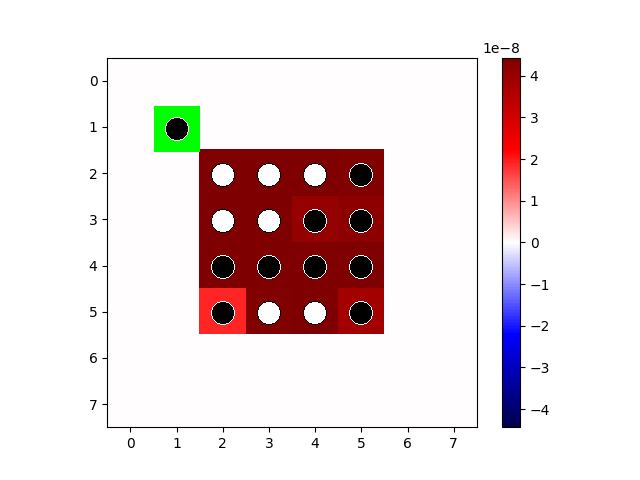

9
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


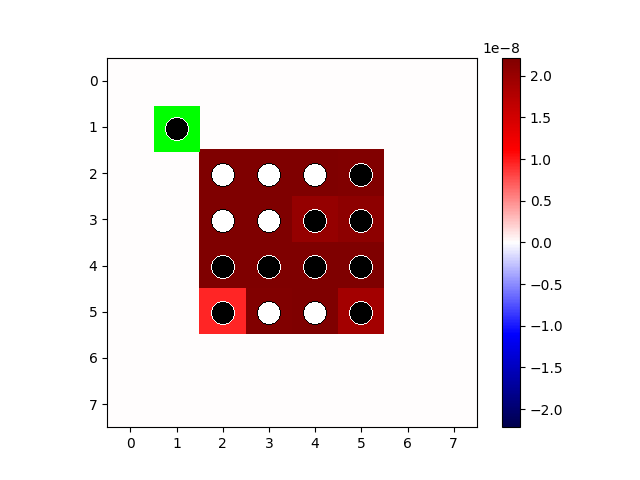

9
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


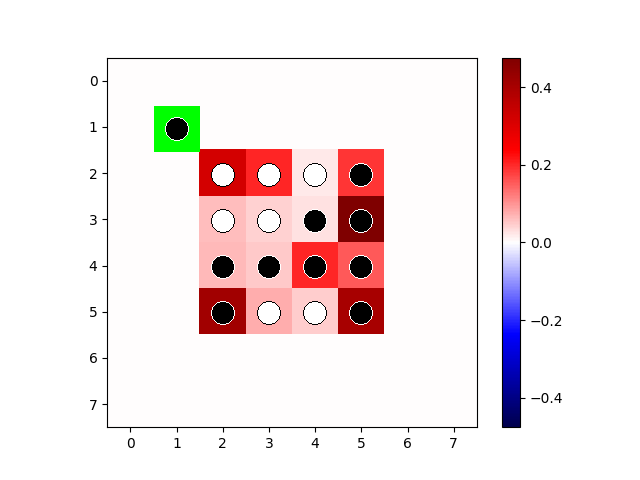

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


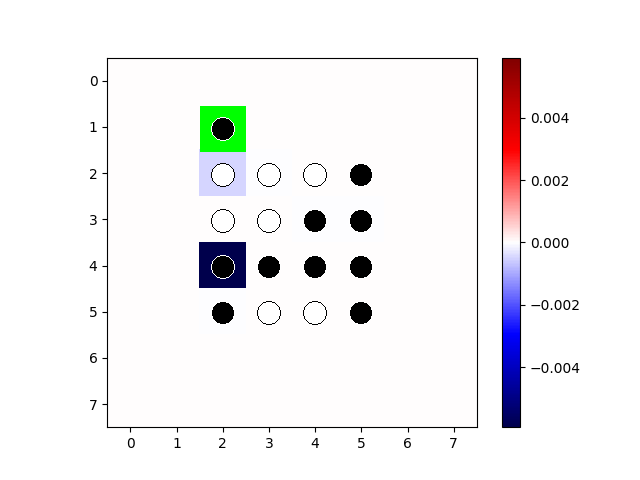

10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


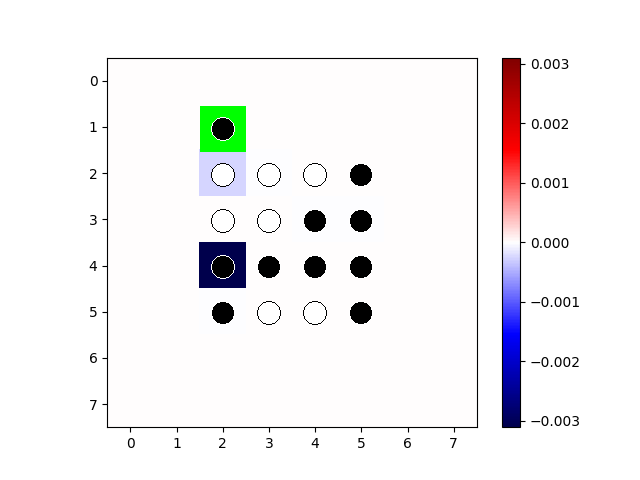

10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


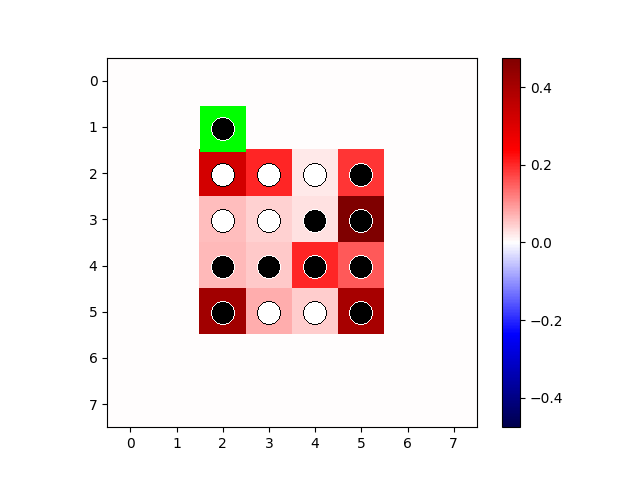

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


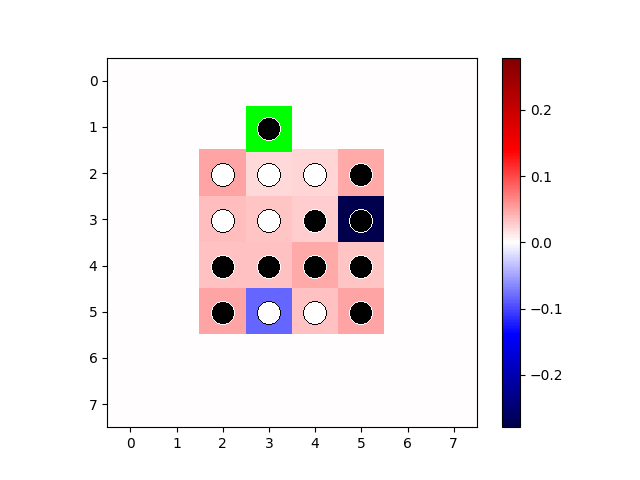

11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


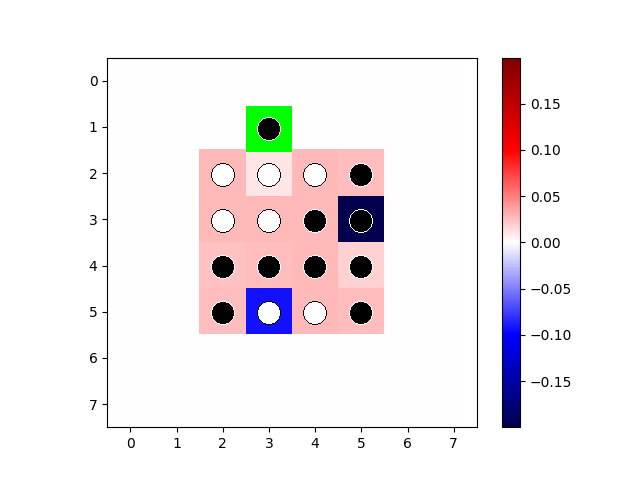

11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


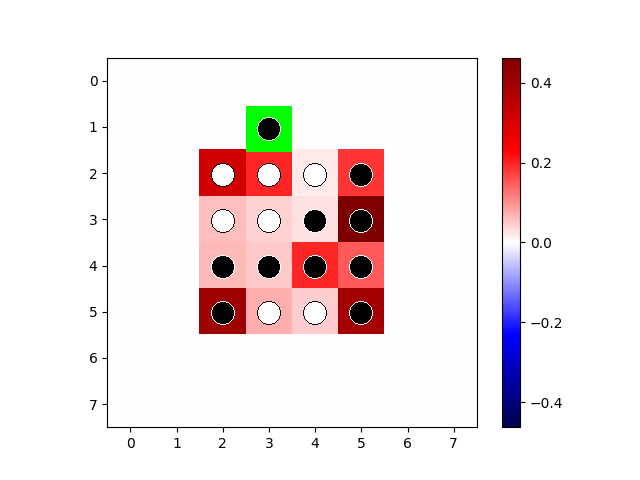

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


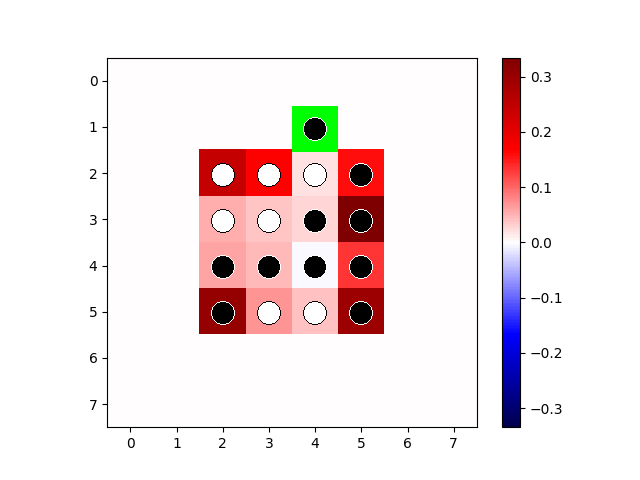

12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


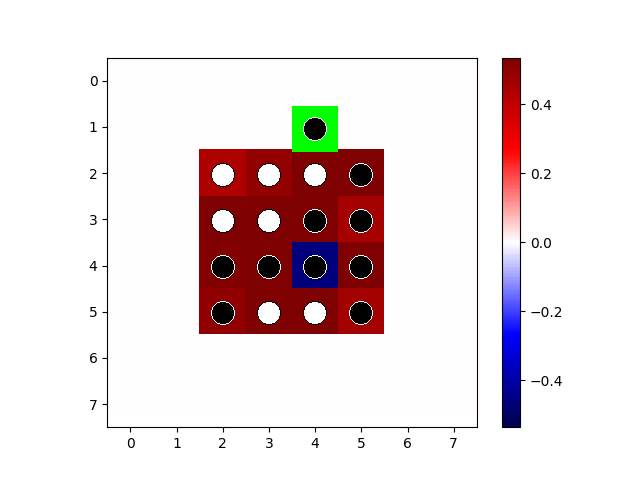

12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


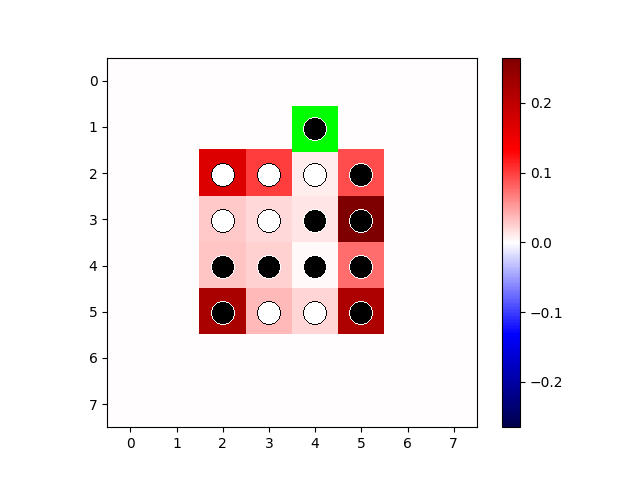

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


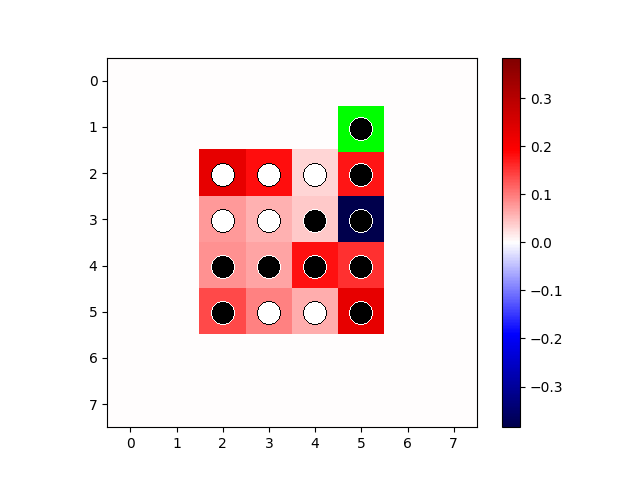

13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


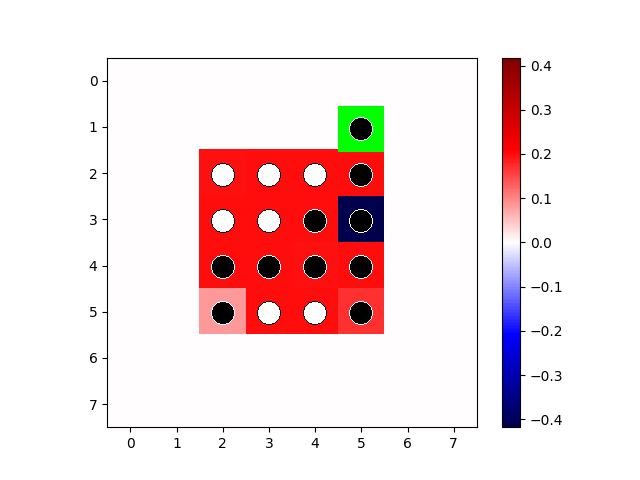

13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


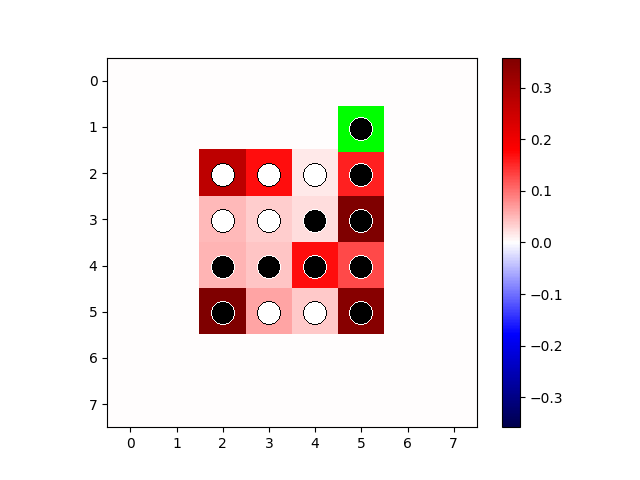

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


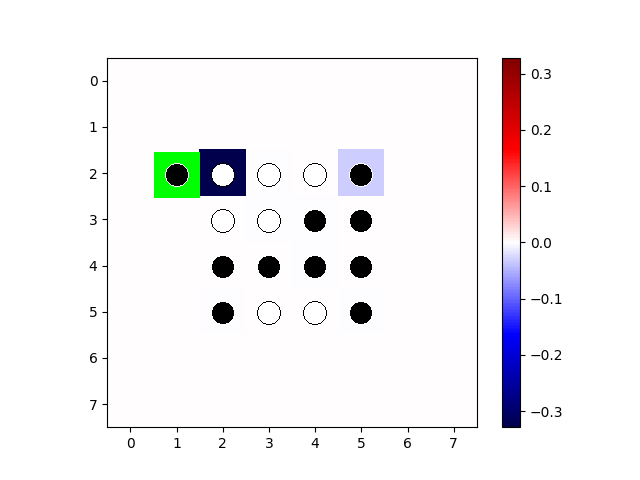

17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


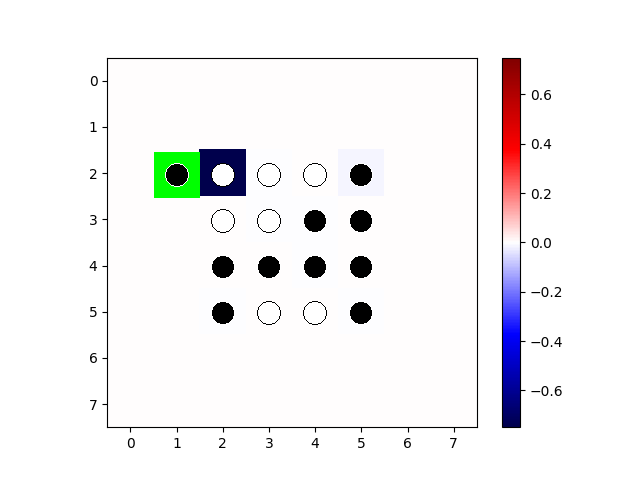

17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


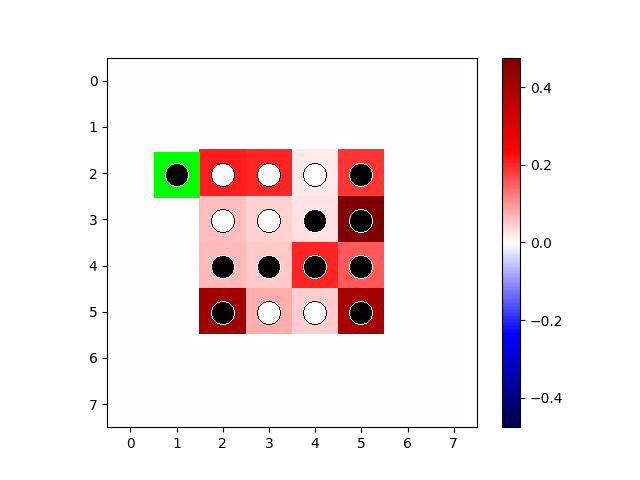

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


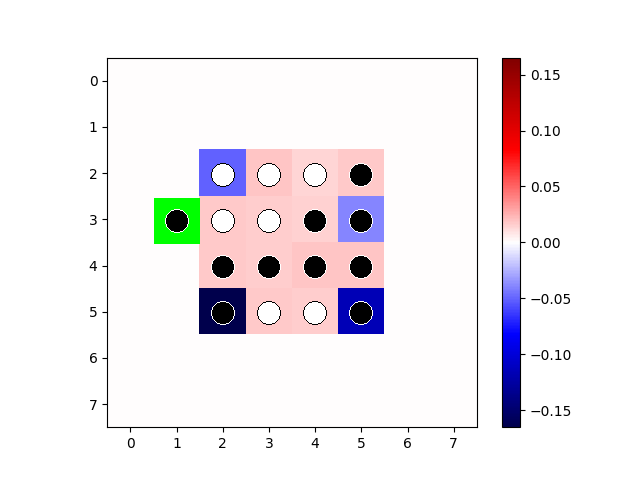

25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


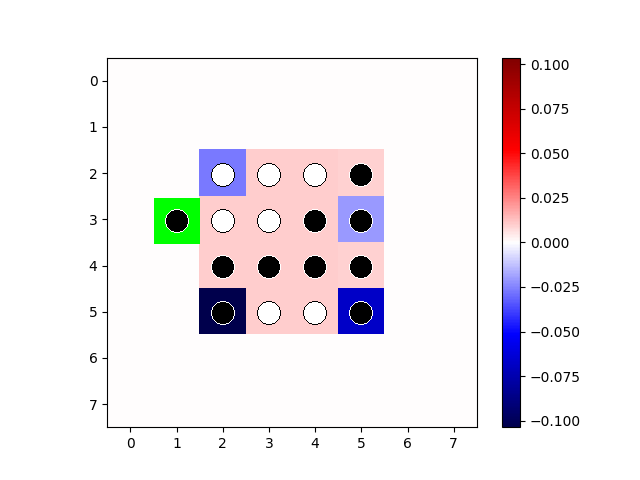

25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


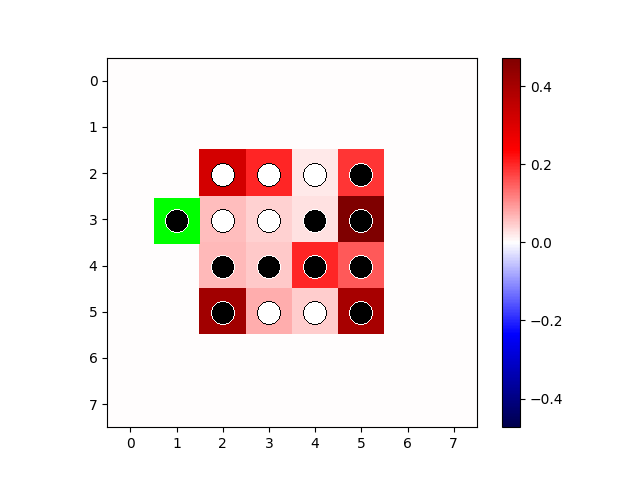

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


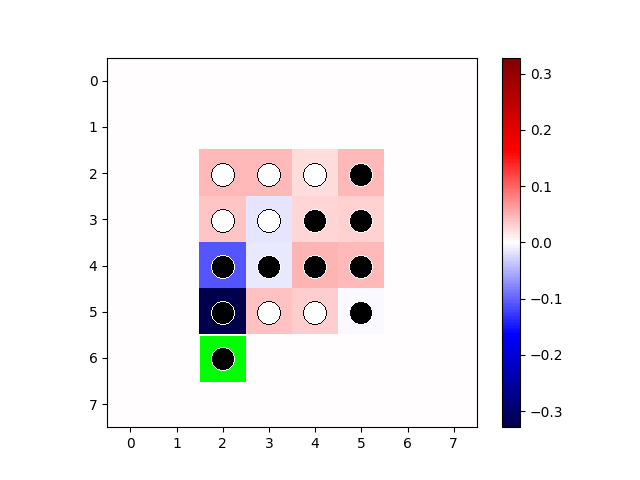

50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


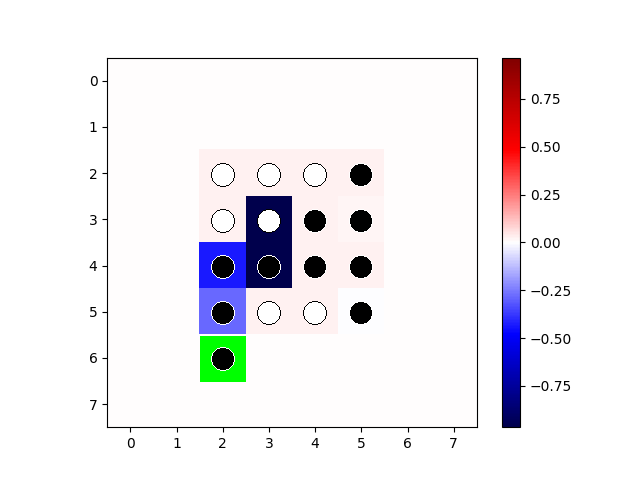

50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


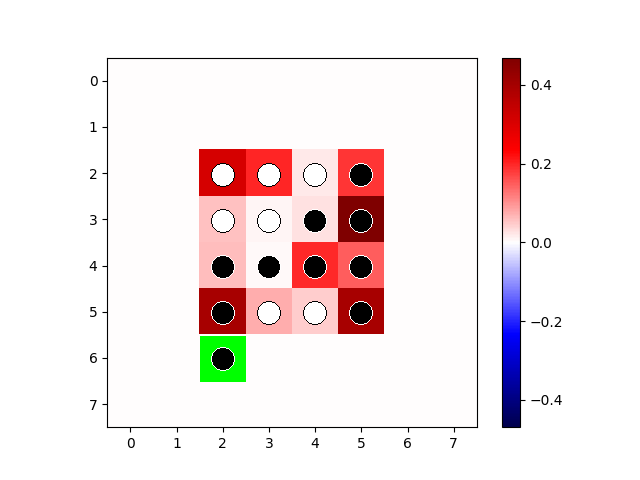

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


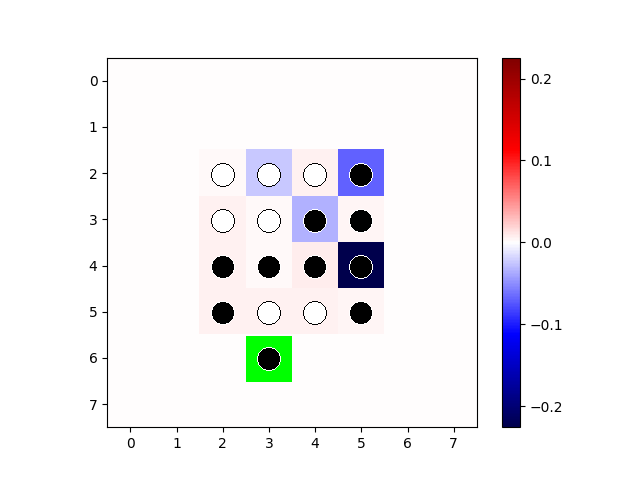

51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


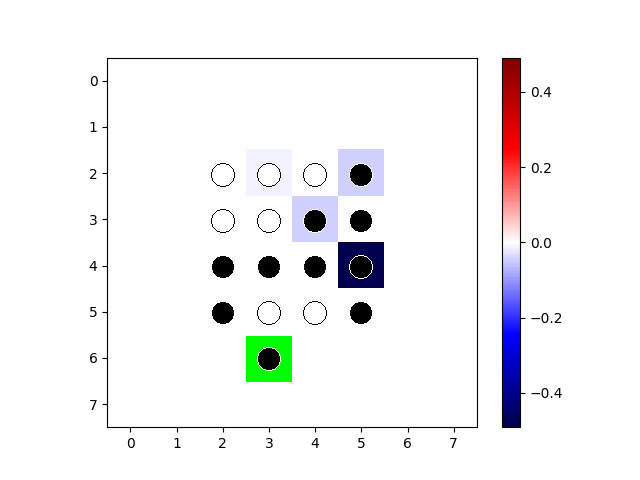

51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


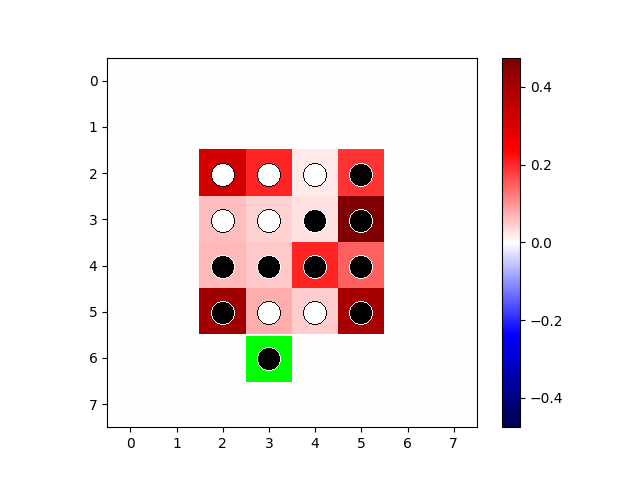

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


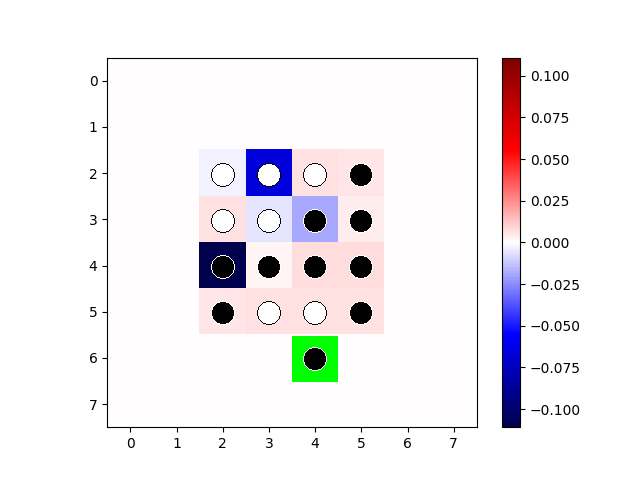

52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


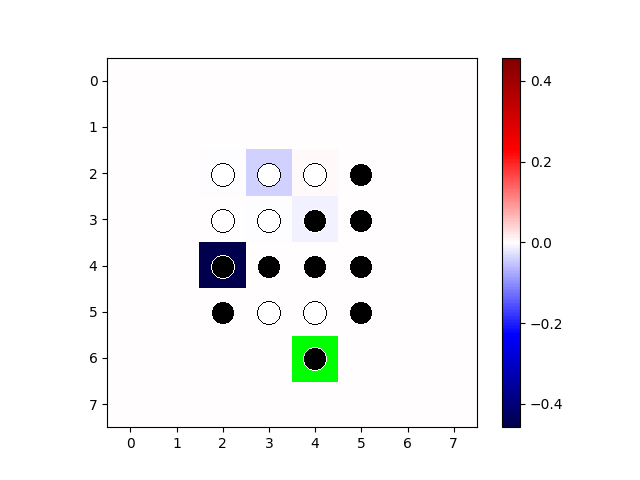

52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


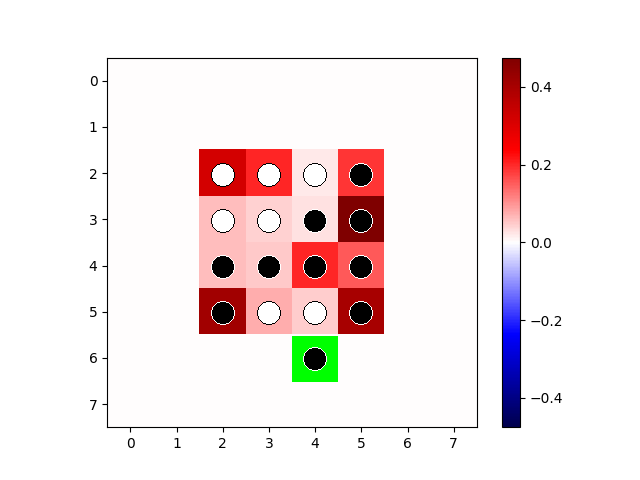

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


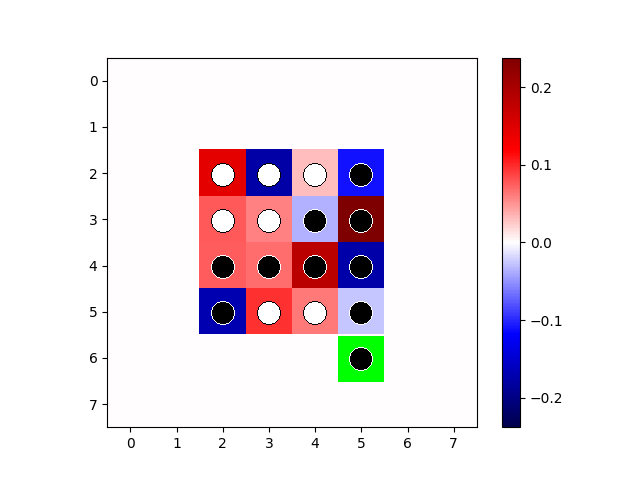

53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


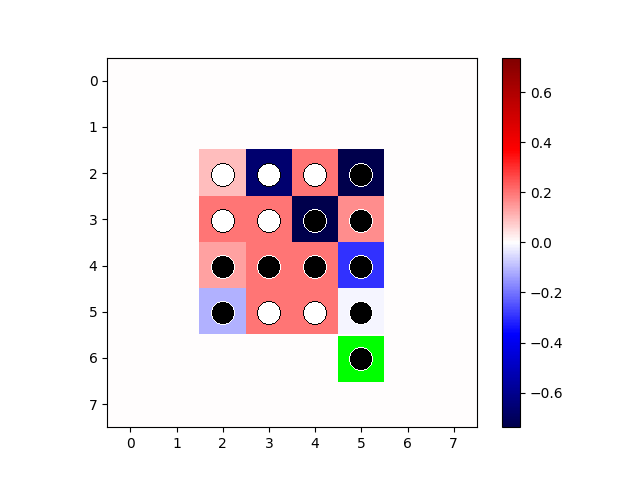

53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


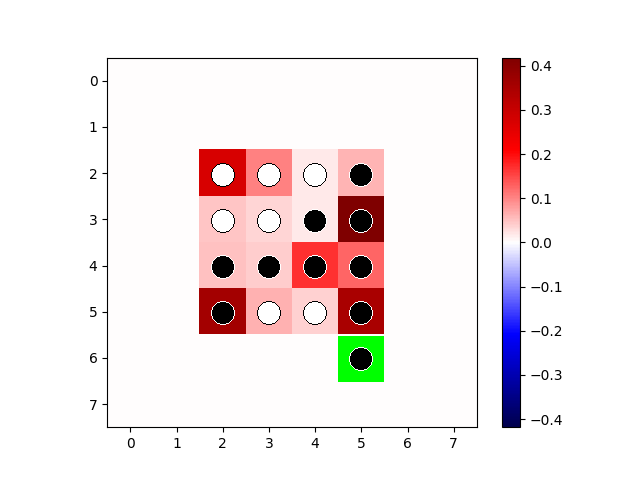

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]


In [ ]:
#手番黒なら-1

turn = -1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



SARFA(board_0,turn = -1)

In [25]:
def normalizedSARFA(board_0,turn,normalizer):




    print(board_0)
    eval_0 = evaluation(board_0,turn,myegaroucid)
    eval_0 = eval_0 / normalizer




    # board_f = numpy.array([[0,0,0,0,0,0,0,0],
    #                     [0,0,0,0,0,0,0,0],
    #                     [0,0,1,1,1,0,0,0],
    #                     [0,0,1,1,-1,-1,0,0],
    #                     [0,0,-1,-1,-1,-1,0,0],
    #                     [0,0,-1,1,1,-1,0,0],
    #                     [0,0,0,0,0,0,0,0],
    #                     [0,0,0,0,0,0,0,0]])

    # print(board_f)
    # eval_f = evaluation(board_f,-1,myegaroucid)
    # print(eval_f)








    A = numpy.ndarray((3,64,64))

    board_0 = numpy.reshape(board_0,64)



    #board_f = board_0


    for x in range(64):
        board_f = numpy.copy(board_0)
        #print(board_f)
        if board_0[x]:
            print(x)
            print(board_0[x])


            board_f[x] = 0



            #print(board_f)
            eval_f = evaluation(board_f,turn,myegaroucid)
            eval_f = eval_f / normalizer
            #print(eval_f)



            #
            #計算する 始め
            #



            #特異度:specificity(eval_0,eval_f)

            # specificity = numpy.ndarray(64)
            # specificity = specificity(eval_0,eval_f)


            #関連度:relevance(eval_0,eval_f)

            # K = numpy.ndarray()
            # K = relevance(eval_0,eval_f)


            #貢献度:contribution(specificity,K)

            contribution = mycontribution(specificity(eval_0,eval_f),relevance(eval_0,eval_f))






            #
            #計算する 終わり
            #






            A[0][x][:] = contribution
            A[1][x][:] = specificity(eval_0,eval_f)
            A[2][x][:] = relevance(eval_0,eval_f)

    #import matplotlib.pyplot as plt
    #aを固定

    print(eval_0)

    for a in range(64):

        #print(a)
        if eval_0[a] != -64 / normalizer:

            #banmen = numpy.zeros(64)
            saliency = numpy.zeros((3,64))


            # board_0 = numpy.array([[0,0,0,0,0,0,0,0],
            #                     [0,0,0,0,0,0,0,0],
            #                     [0,0,1,1,1,-1,0,0],
            #                     [0,0,1,1,-1,-1,0,0],
            #                     [0,0,-1,-1,-1,-1,0,0],
            #                     [0,0,-1,1,1,-1,0,0],
            #                     [0,0,0,0,0,0,0,0],
            #                     [0,0,0,0,0,0,0,0]])
            # board_0 = numpy.reshape(board_0,64)
            #print(board_0)



            for x in range(64):
                #print(x)
                #print(board_0[x])
                if board_0[x]:


                    saliency[0][x] = A[0][x][a]
                    saliency[1][x] = A[1][x][a]
                    saliency[2][x] = A[2][x][a]
                    #print(x)

                #if board_0[x]:


                #banmen[x] = A[x][a]
                #print(x)

            print(a)
            print(numpy.reshape(board_0,(8,8)))
            message = ["貢献度","特異度","関連度"]

            #print(numpy.reshape(banmen,(8,8)))
            for y in range(3):
                print(message[y])
                plt.rcParams["image.cmap"] = "seismic"


                data = numpy.reshape(saliency[y],(8,8))
                fig, ax = plt.subplots()
                absmax = numpy.max(numpy.abs(saliency[y]))
                im = ax.imshow(data,vmin=-1*absmax,vmax=absmax)
                #plt.clim(-16,16)
                plt.colorbar(im)
                #plt.show()

                fig.canvas.draw()
                img = Image.fromarray(numpy.array(fig.canvas.renderer.buffer_rgba()))
                plt.close()






                draw = ImageDraw.Draw(img)

                #(108,60) 46x8 23 11.5

                for y in range(64):
                    if board_0[y] == 1:
                        #白描画
                        draw.ellipse((108+11.5+46*(y % 8), 60+11.5+46*(y // 8 ),
                                    108+34.5+46*(y % 8), 60+34.5+46*(y // 8)),
                                    fill=(255, 255, 255), outline=(0, 0, 0))


                    elif board_0[y] == -1:
                        #黒描画
                        draw.ellipse((108+11.5+46*(y % 8), 60+11.5+46*(y // 8 ),
                                    108+34.5+46*(y % 8), 60+34.5+46*(y // 8)),
                                    fill=(0, 0, 0), outline=(255, 255, 255))
                        #draw.ellipse((210+47, 160+46.5, 235+47, 185+47), fill=(255, 255, 255), outline=(0, 0, 0))

                #指し手
                turn = -1
                if turn == 1:
                    f = 255
                    o = 0
                elif turn == -1:
                    f = 0
                    o = 255
                draw.rectangle((108+46*(a % 8), 60+46*(a // 8),
                                108+46*(a % 8+ 1), 60+46*(a // 8 + 1)),
                                fill=(0, 255, 0))
                draw.ellipse((108+11.5+46*(a % 8), 60+11.5+46*(a // 8 ),
                            108+34.5+46*(a % 8), 60+34.5+46*(a // 8)),
                            fill=(f, f, f), outline=(o, o, o))





                #draw.rectangle((210+47, 160+46.5, 235+47, 185+47), fill=(255, 255, 255), outline=(0, 255, 0))
                #
                #draw.text()

                img.show()

            print(numpy.reshape(eval_0,(8,8)))



[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WWBB----BBBB----BWWB------------------B
11
18
1
setboard -------------------WWB----WWBB----BBBB----BWWB------------------B
11
19
1
setboard ------------------W-WB----WWBB----BBBB----BWWB------------------B
12
20
1
setboard ------------------WW-B----WWBB----BBBB----BWWB------------------B
10
21
-1
setboard ------------------WWW-----WWBB----BBBB----BWWB------------------B
11
26
1
setboard ------------------WWWB-----WBB----BBBB----BWWB------------------B
11
27
1
setboard ------------------WWWB----W-BB----BBBB----BWWB------------------B
8
28
-1
setboard ------------------WWWB----WW-B----BBBB----BWWB------------------B
9
29
-1
setboard ------------------WWWB----WWB-----BBBB----BWWB------------------B
11
34
-1
setboard ------------------WWWB---

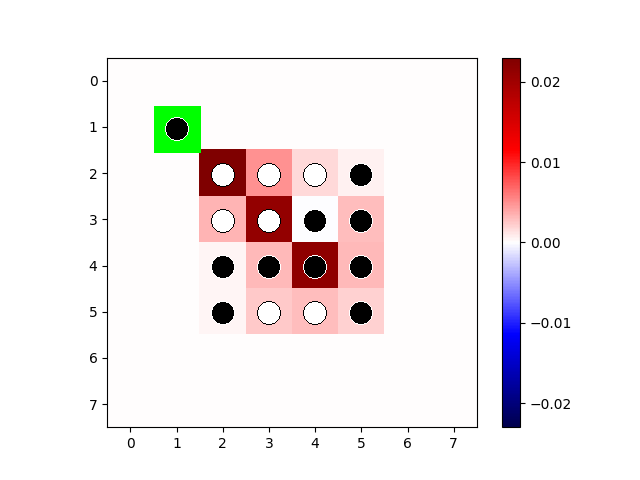

特異度


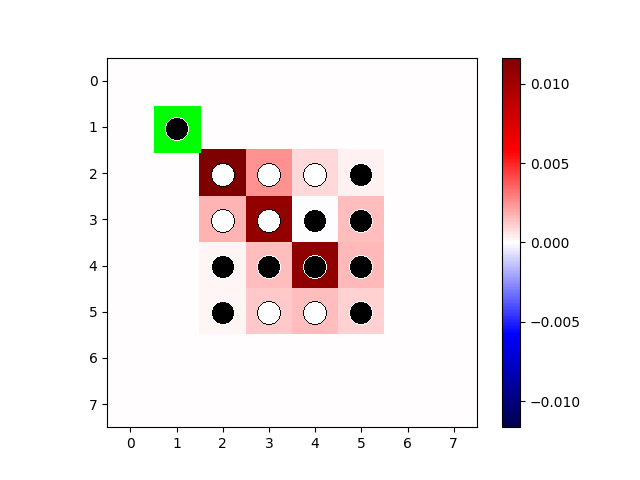

関連度


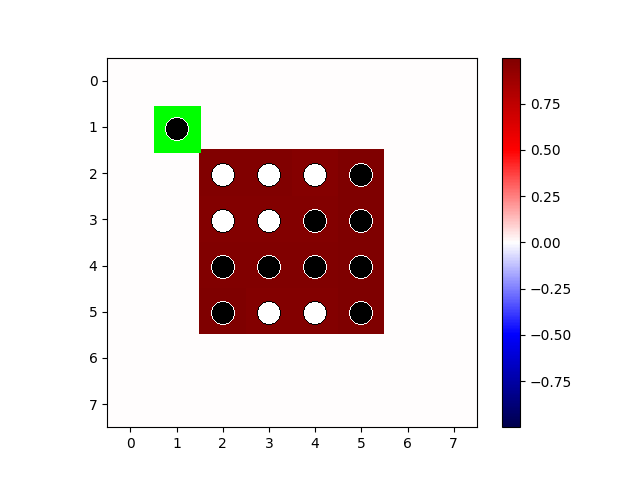

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


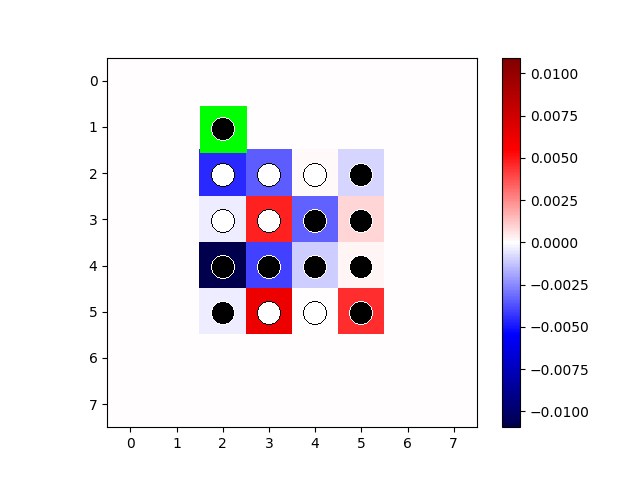

特異度


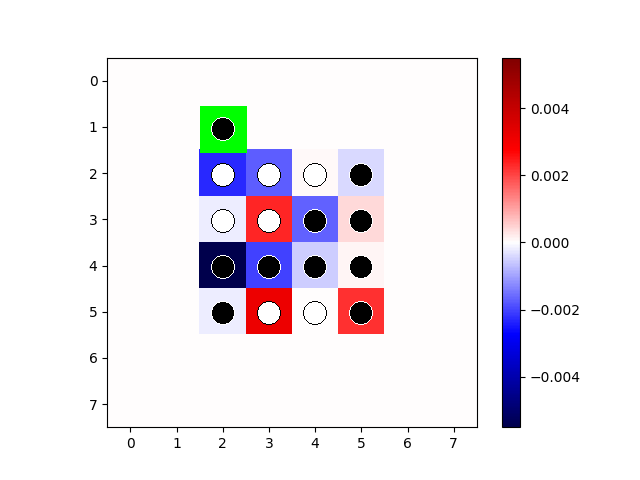

関連度


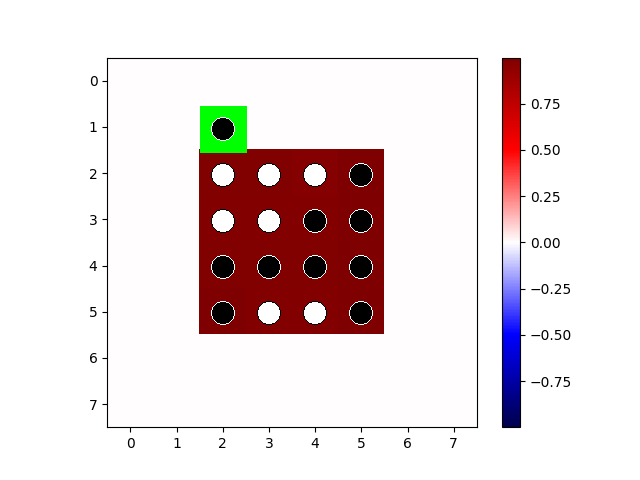

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


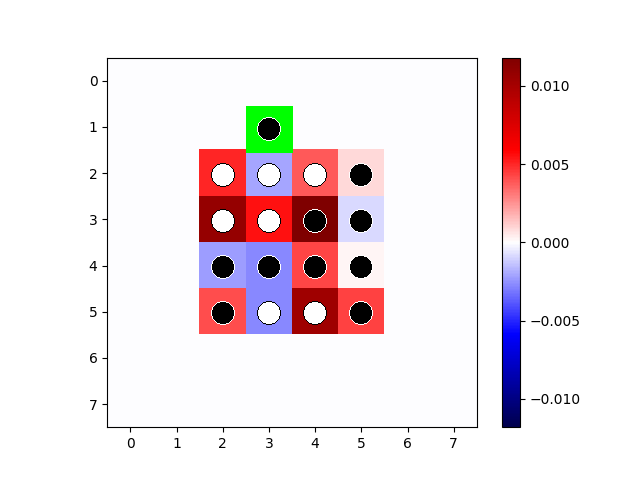

特異度


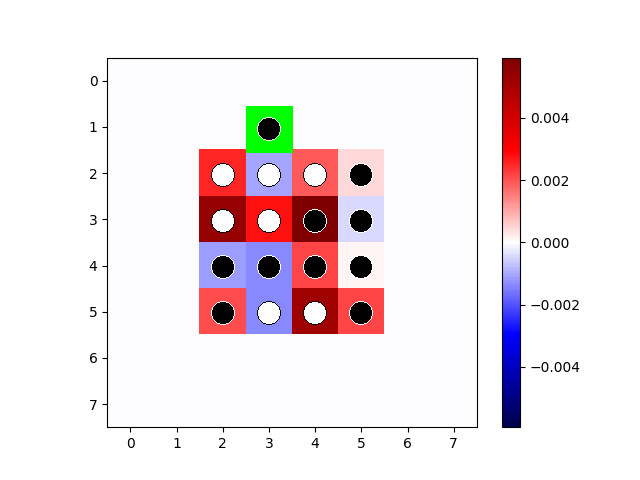

関連度


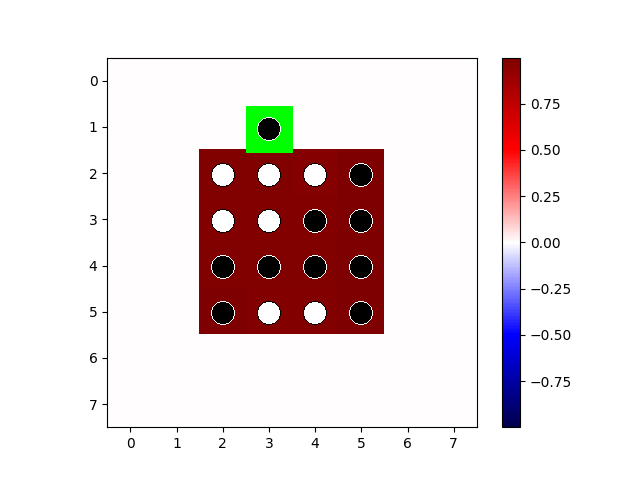

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


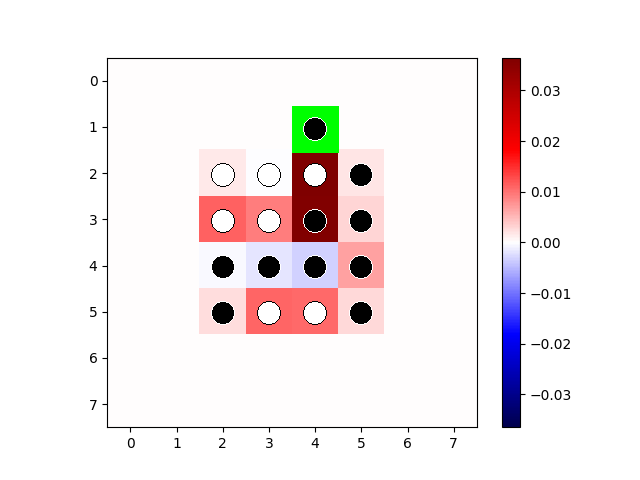

特異度


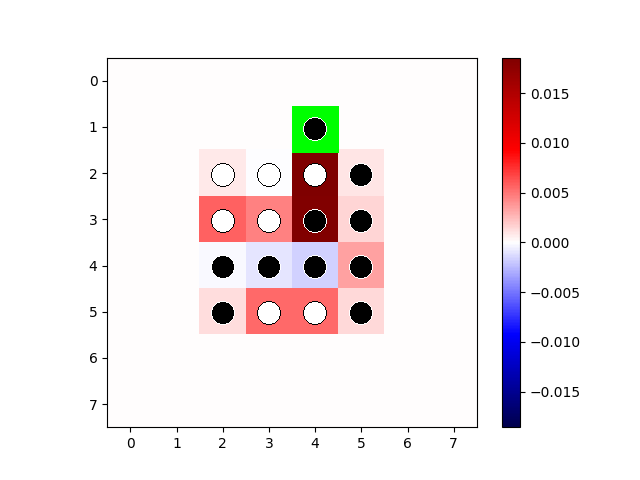

関連度


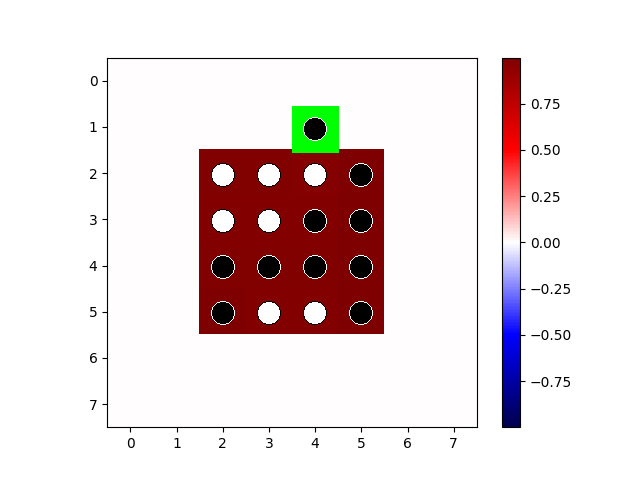

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


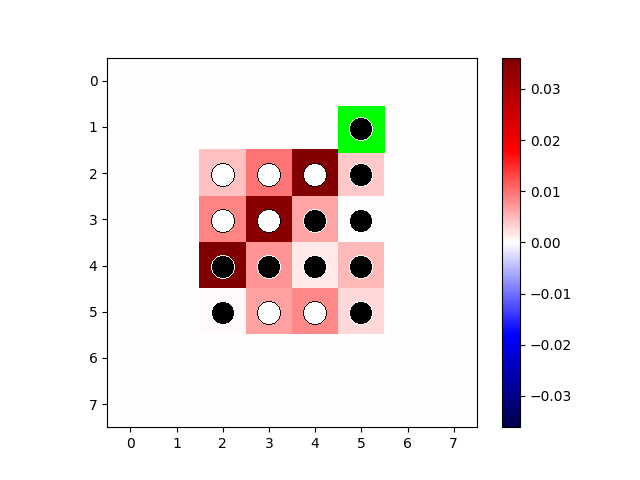

特異度


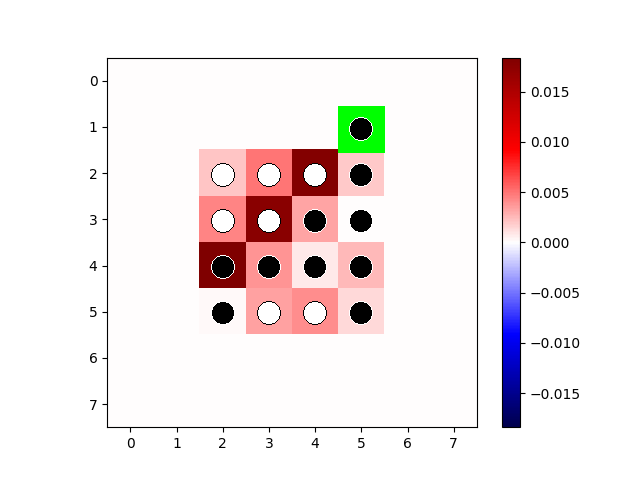

関連度


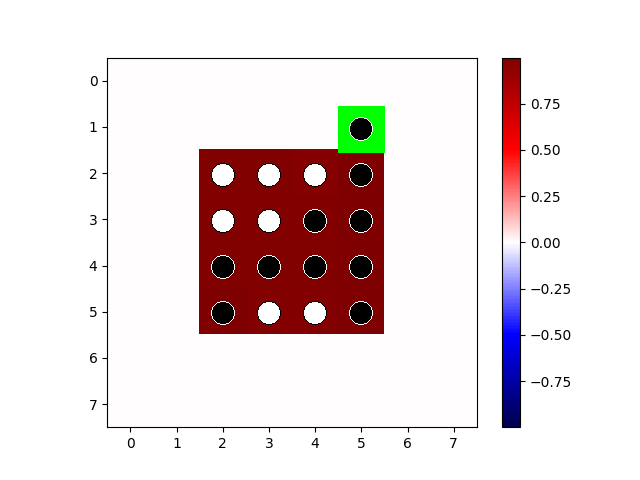

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


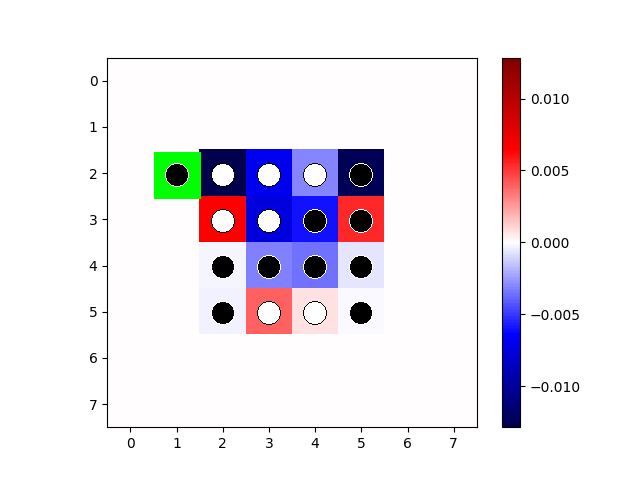

特異度


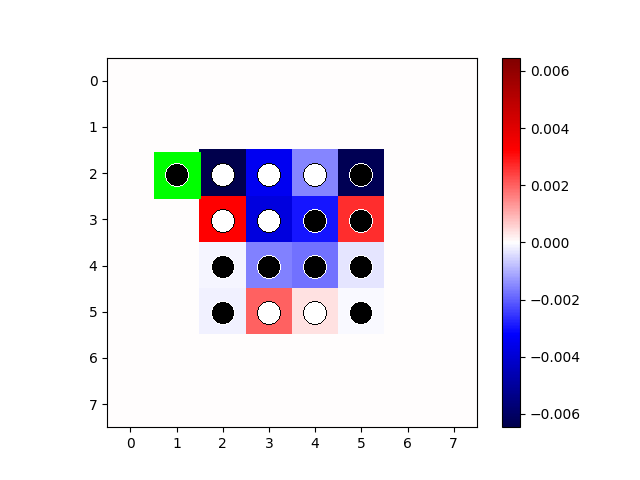

関連度


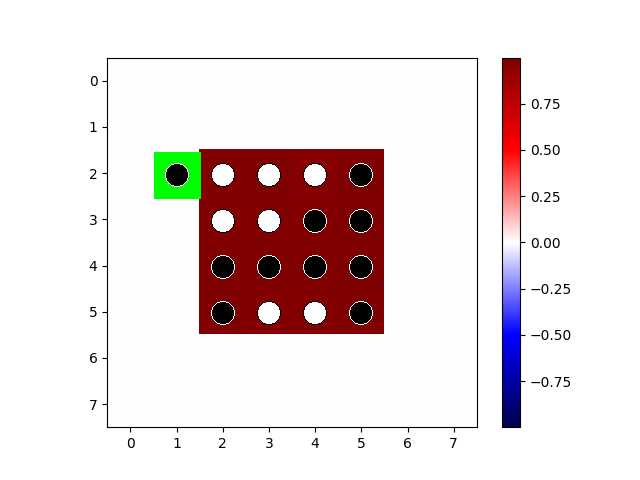

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


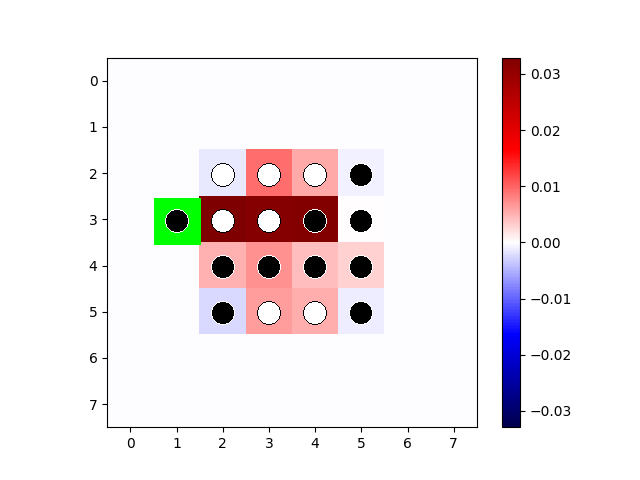

特異度


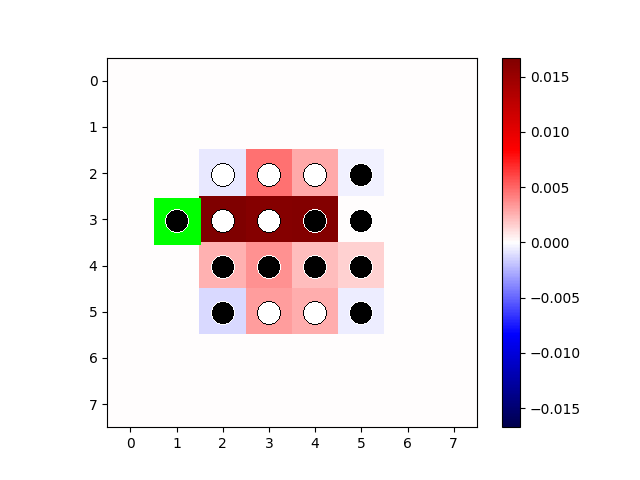

関連度


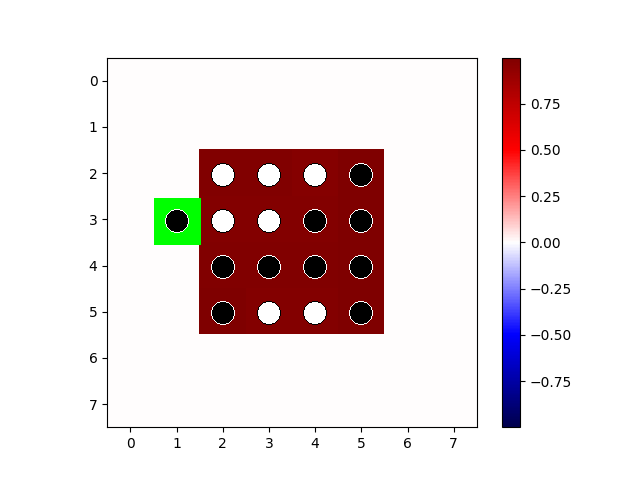

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


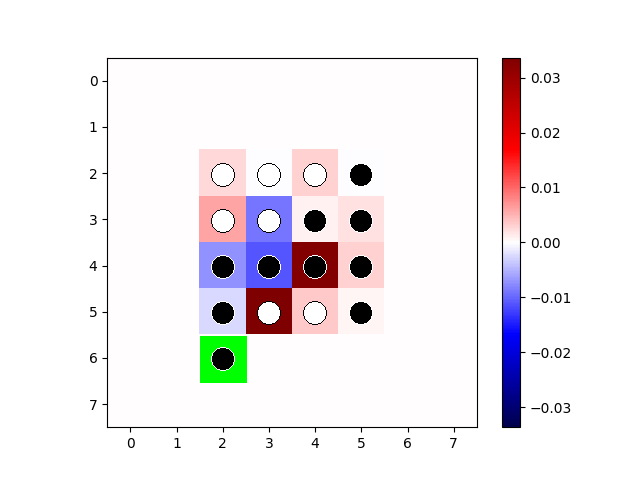

特異度


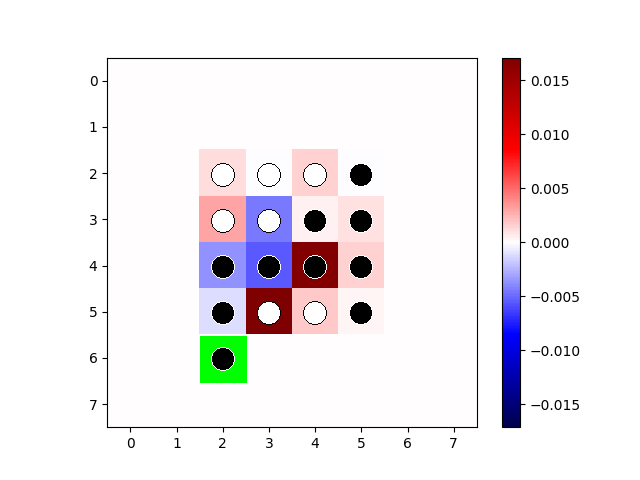

関連度


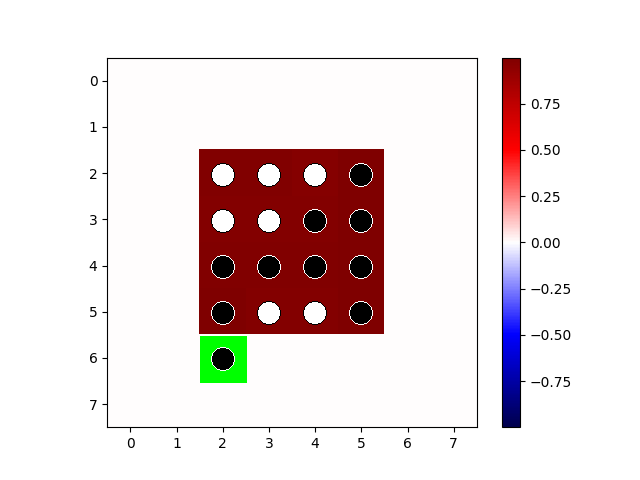

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


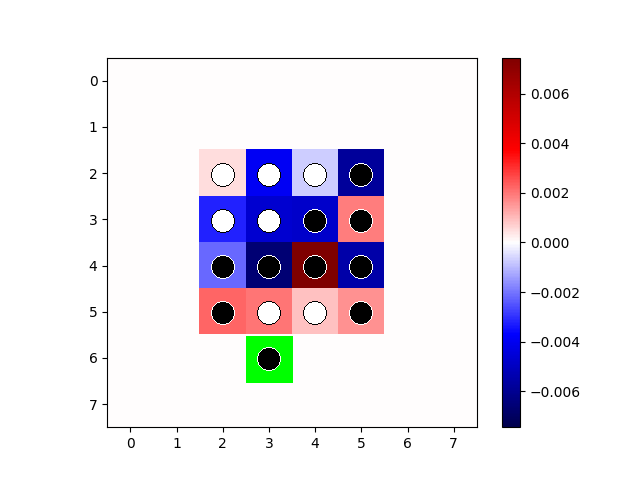

特異度


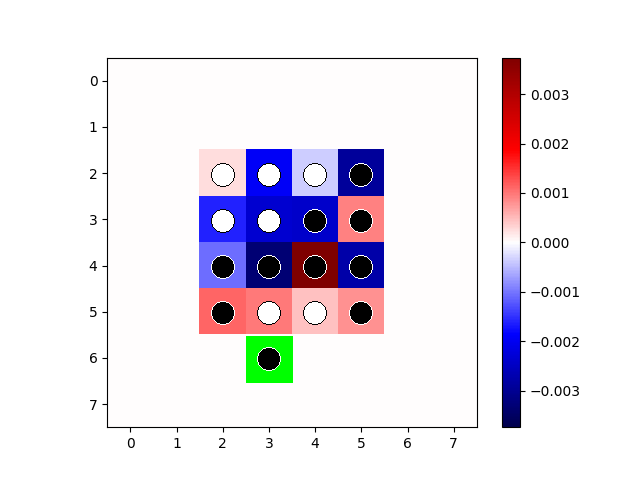

関連度


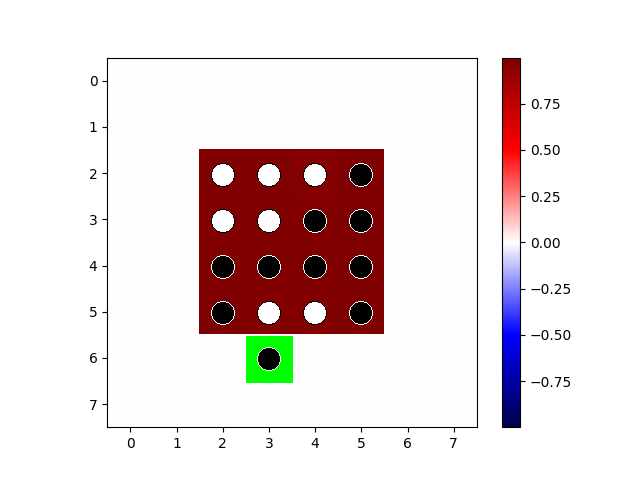

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


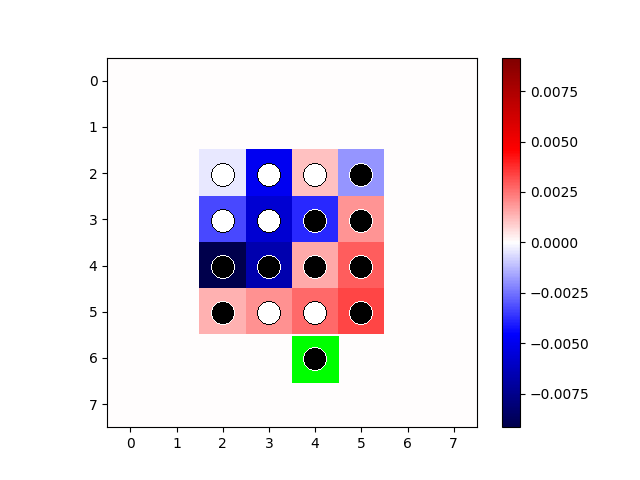

特異度


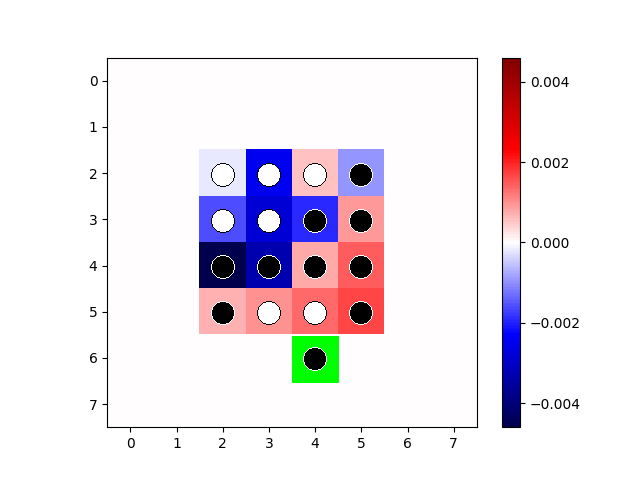

関連度


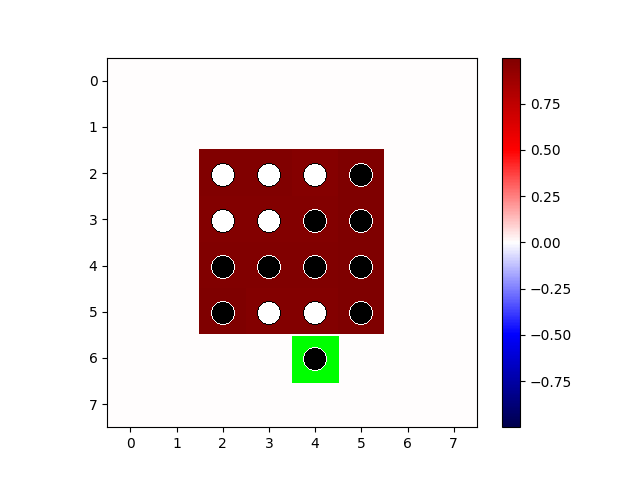

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]
53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


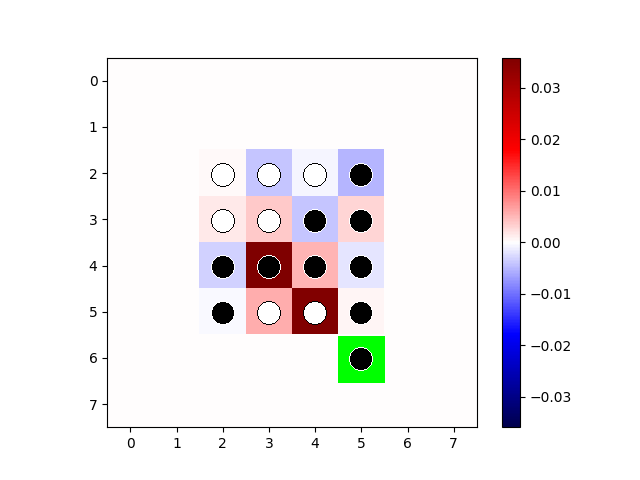

特異度


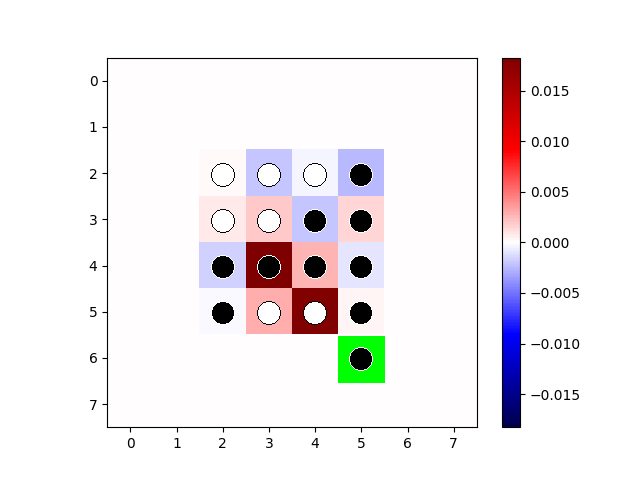

関連度


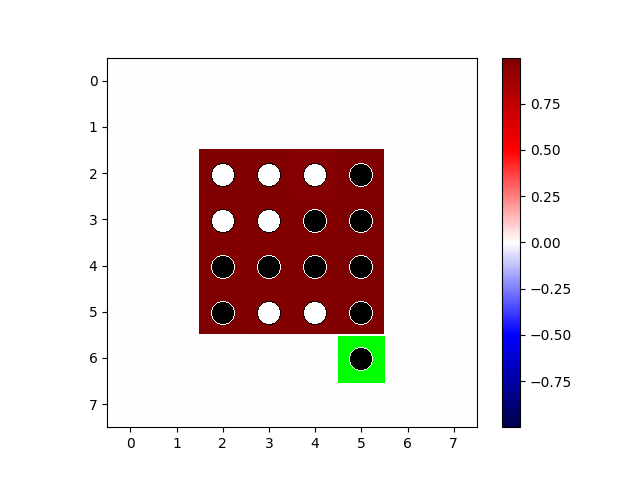

[[-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.359375 -0.296875 -0.140625 -0.09375  -0.109375 -1.
  -1.      ]
 [-1.       -0.3125   -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -0.15625  -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]
 [-1.       -1.       -0.140625 -0.171875 -0.171875 -0.109375 -1.
  -1.      ]
 [-1.       -1.       -1.       -1.       -1.       -1.       -1.
  -1.      ]]


In [26]:
#手番黒なら-1

turn = -1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



normalizedSARFA(board_0,-1,64)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WWBB----BBBB----BWWB------------------B
11
18
1
setboard -------------------WWB----WWBB----BBBB----BWWB------------------B
11
19
1
setboard ------------------W-WB----WWBB----BBBB----BWWB------------------B
12
20
1
setboard ------------------WW-B----WWBB----BBBB----BWWB------------------B
10
21
-1
setboard ------------------WWW-----WWBB----BBBB----BWWB------------------B
11
26
1
setboard ------------------WWWB-----WBB----BBBB----BWWB------------------B
11
27
1
setboard ------------------WWWB----W-BB----BBBB----BWWB------------------B
8
28
-1
setboard ------------------WWWB----WW-B----BBBB----BWWB------------------B
9
29
-1
setboard ------------------WWWB----WWB-----BBBB----BWWB------------------B
11
34
-1
setboard ------------------WWWB---

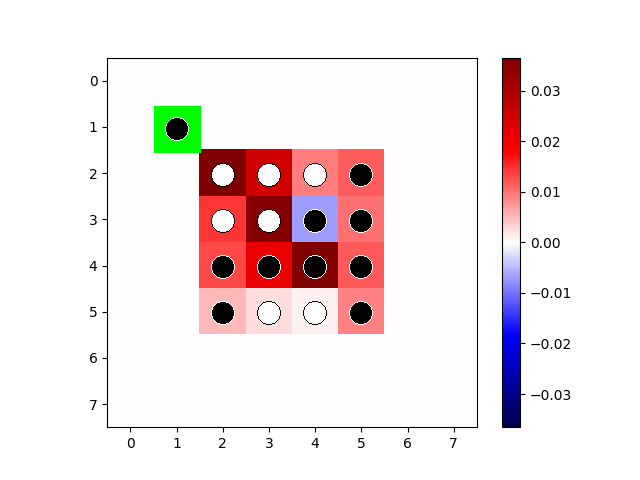

特異度


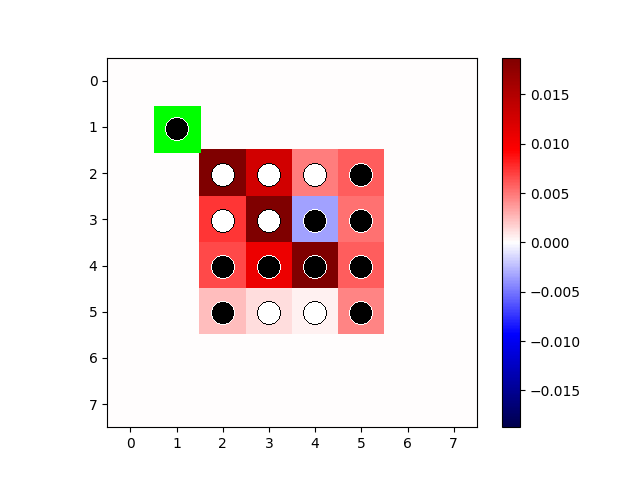

関連度


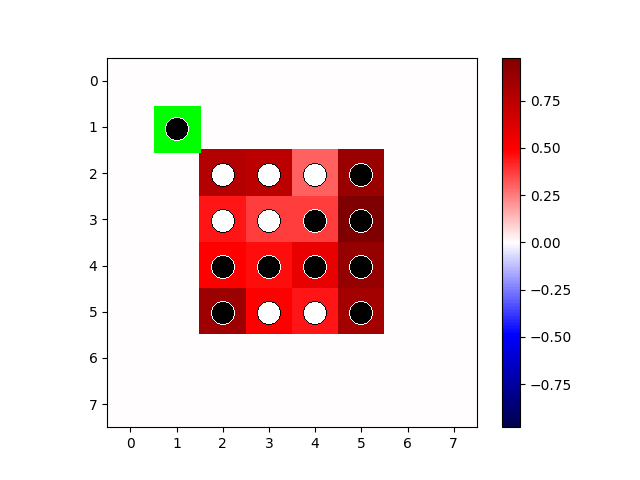

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


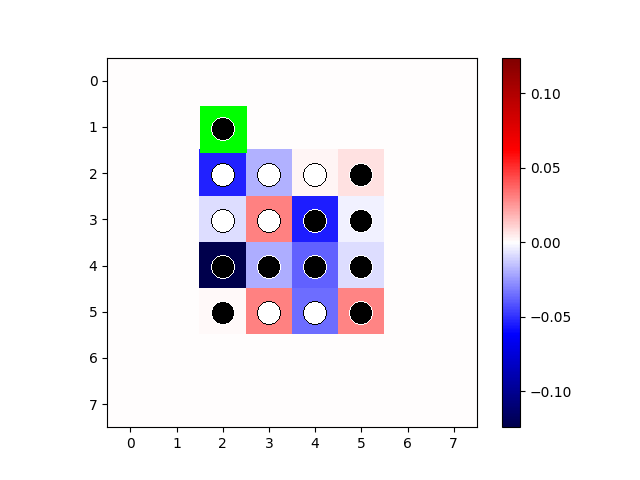

特異度


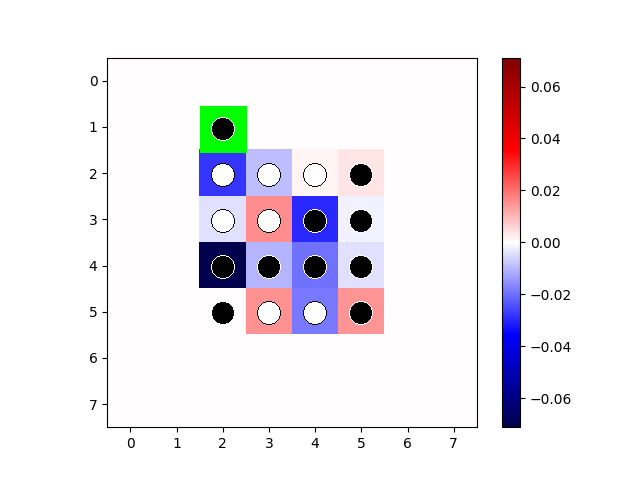

関連度


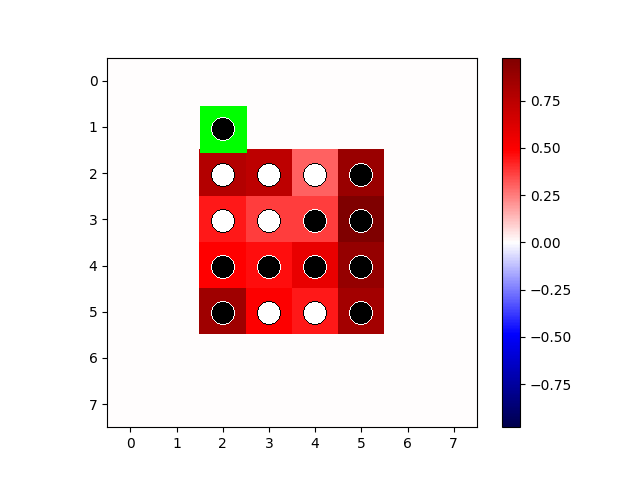

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


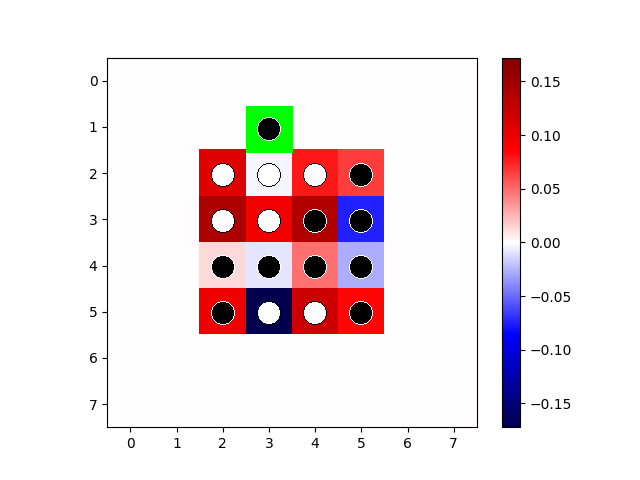

特異度


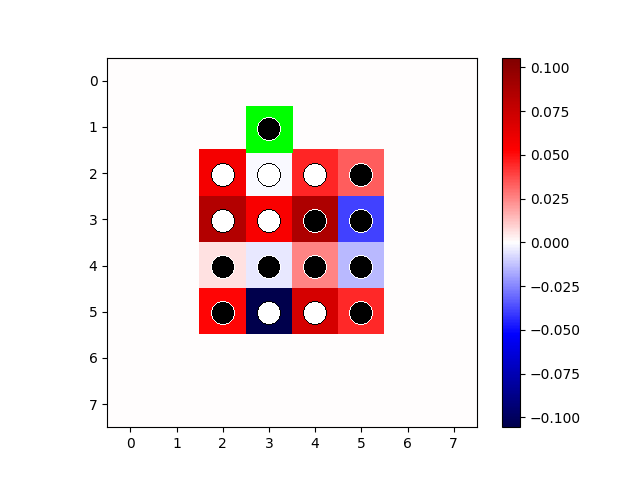

関連度


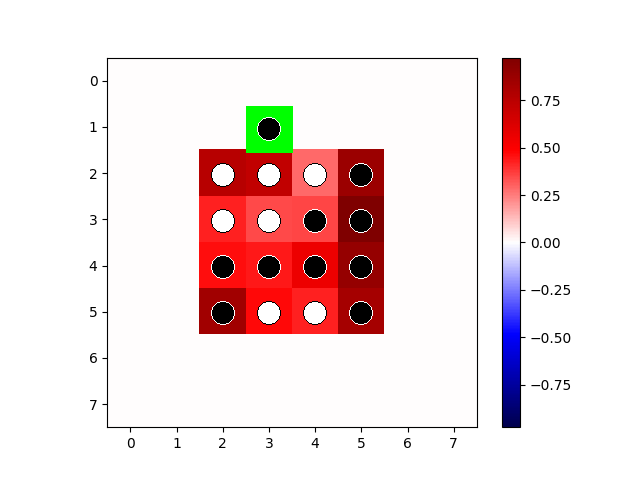

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


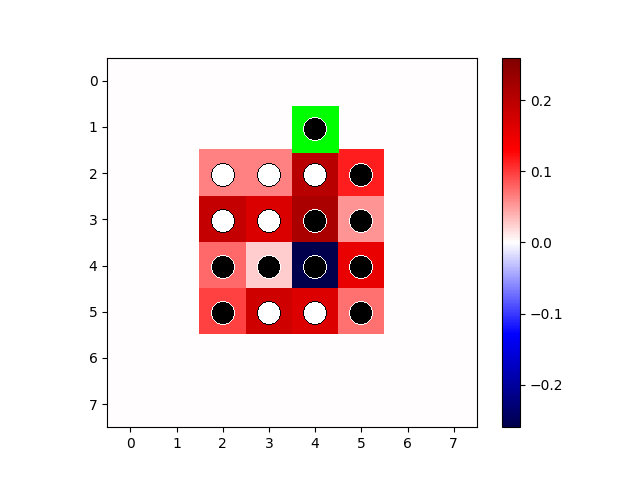

特異度


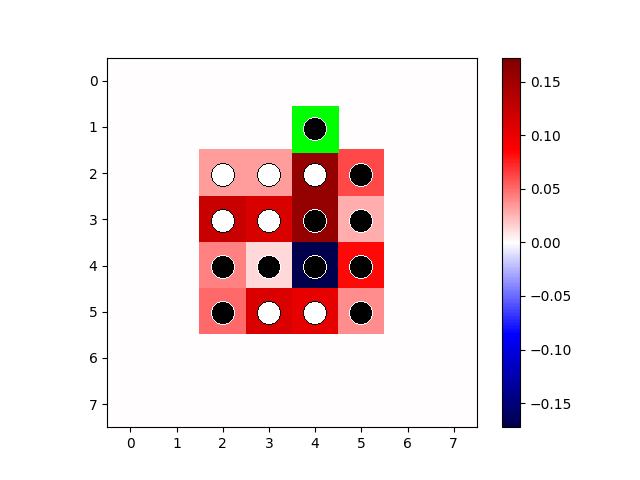

関連度


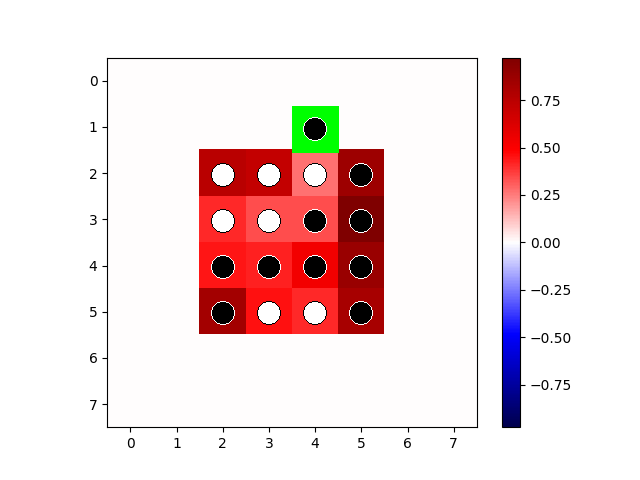

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


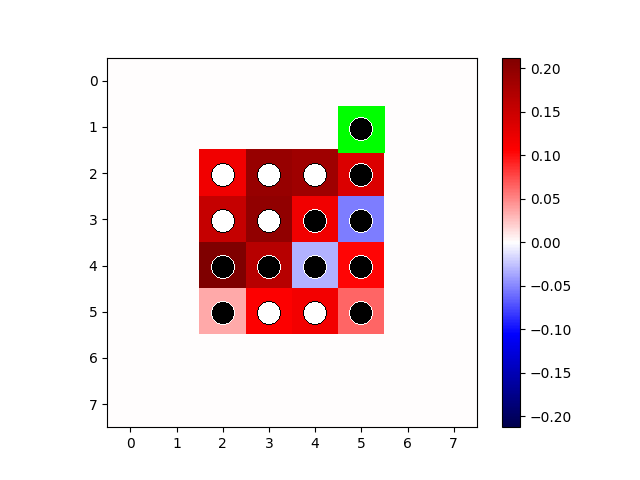

特異度


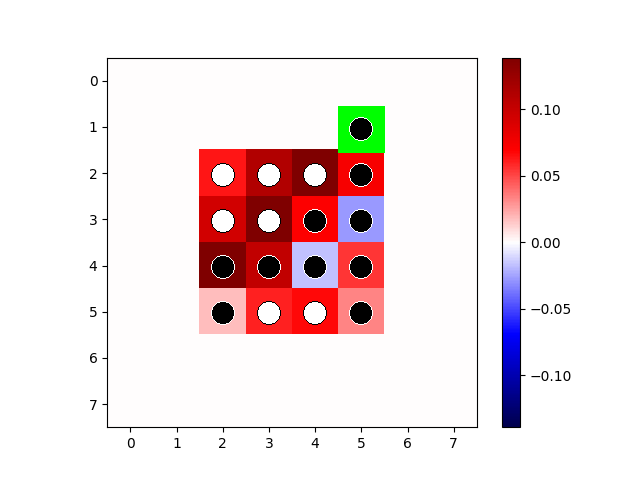

関連度


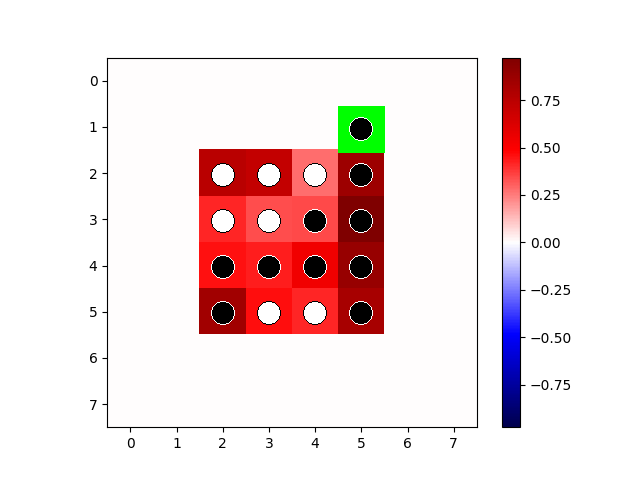

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


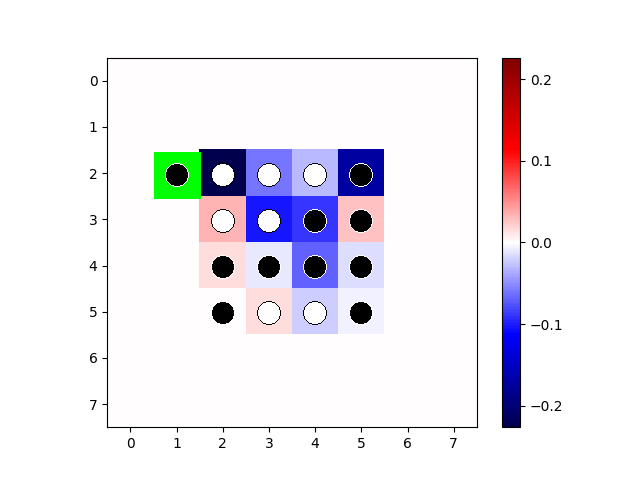

特異度


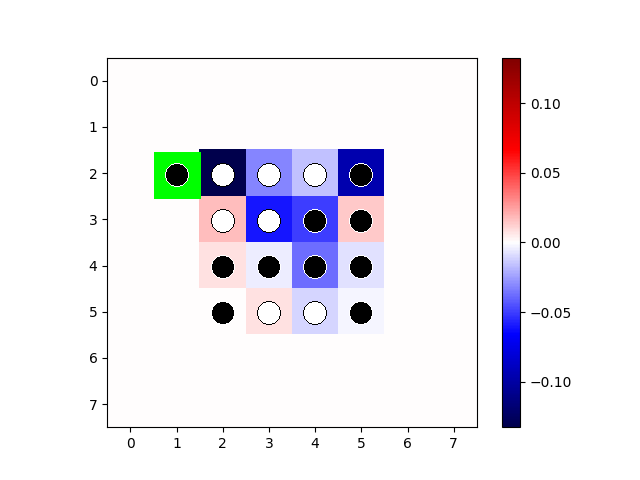

関連度


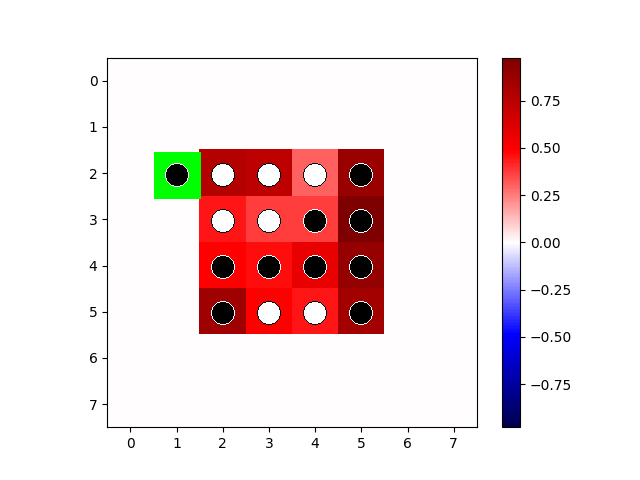

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


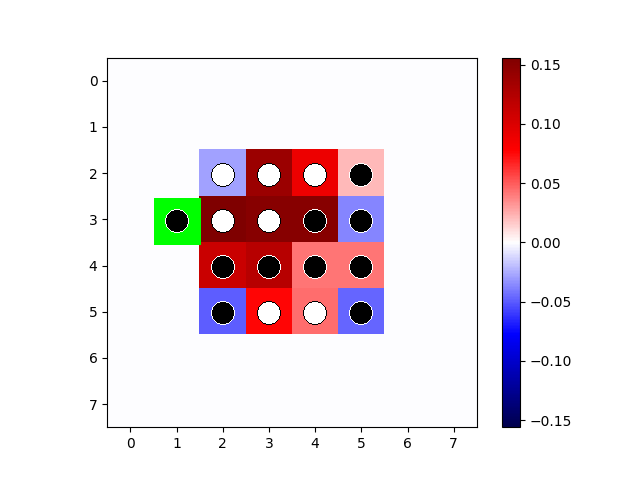

特異度


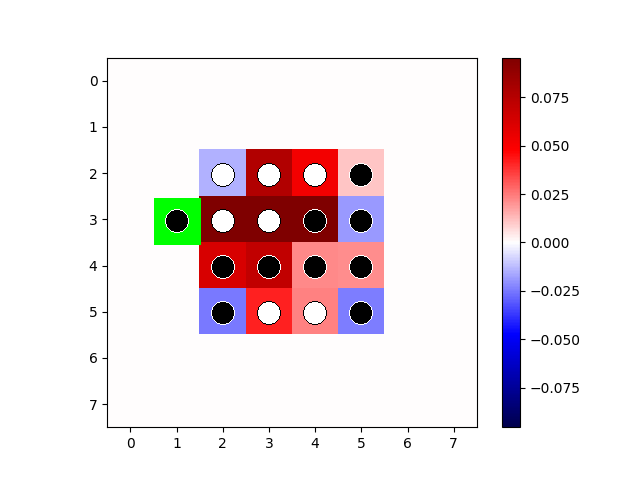

関連度


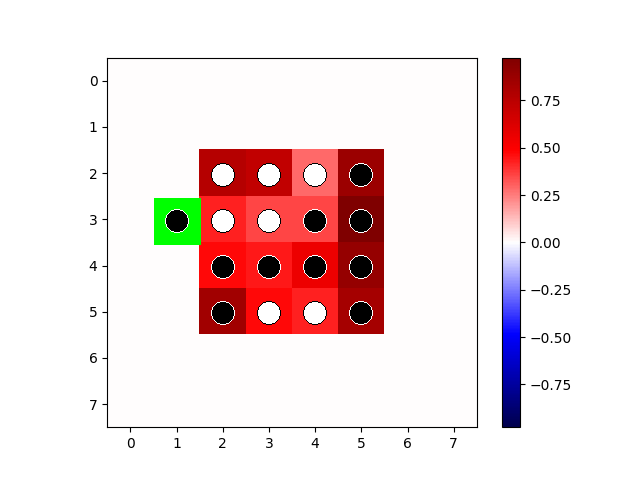

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


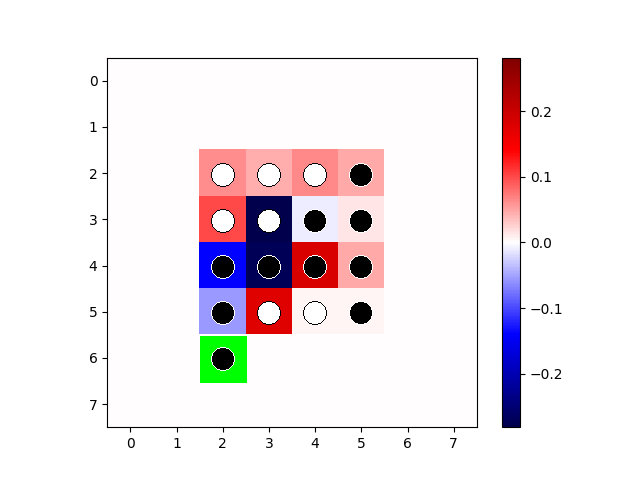

特異度


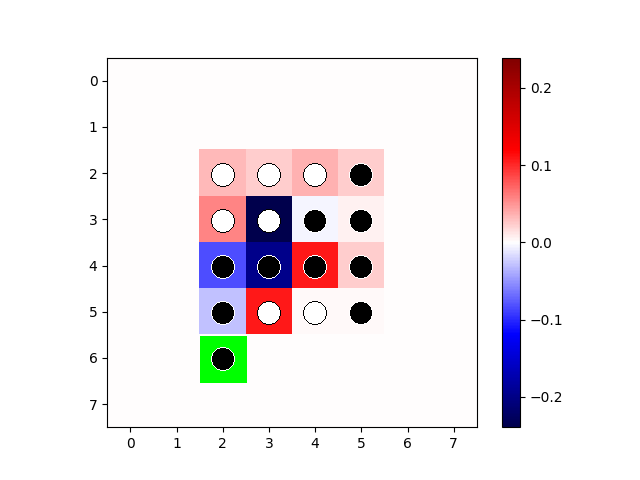

関連度


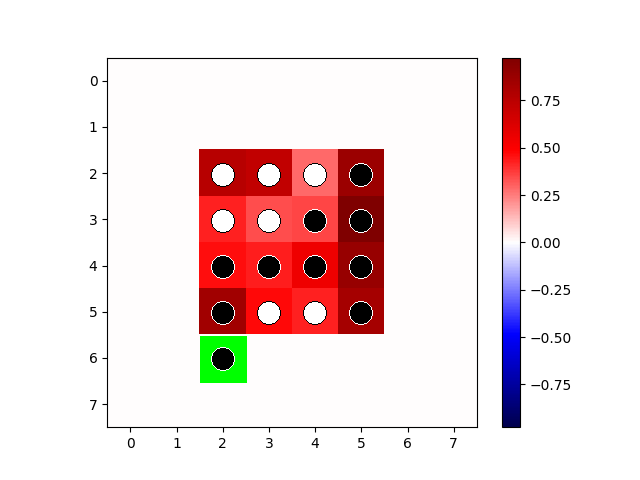

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


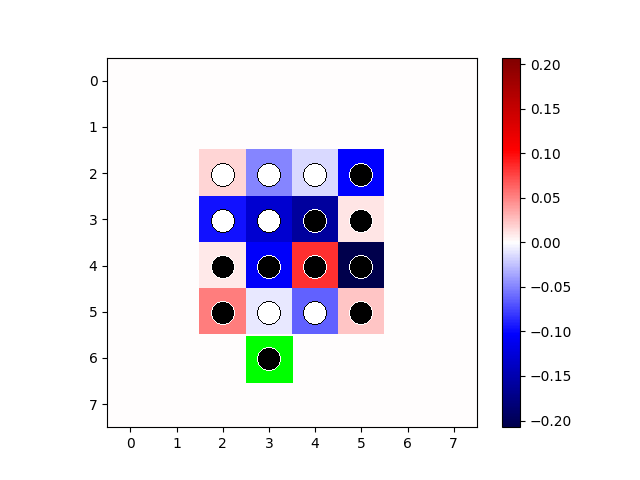

特異度


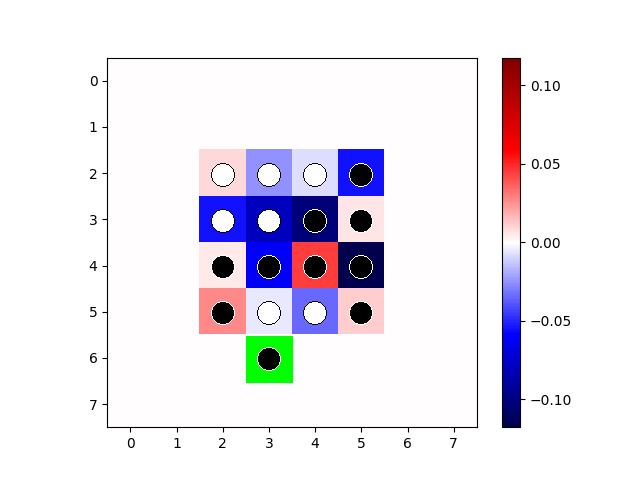

関連度


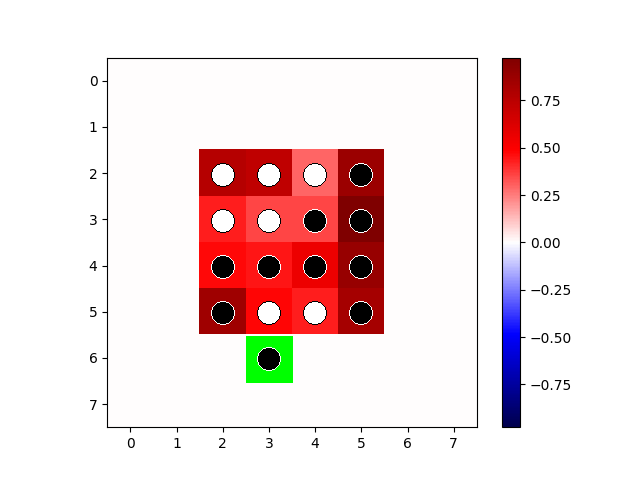

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


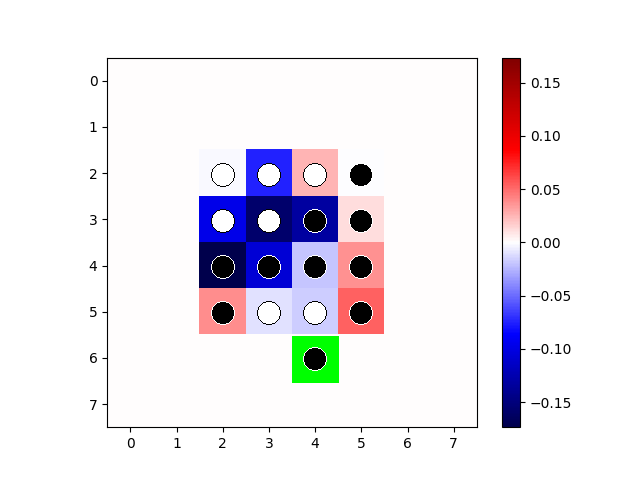

特異度


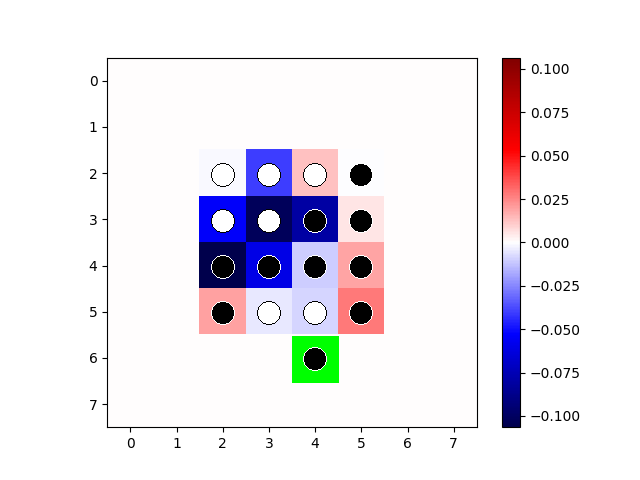

関連度


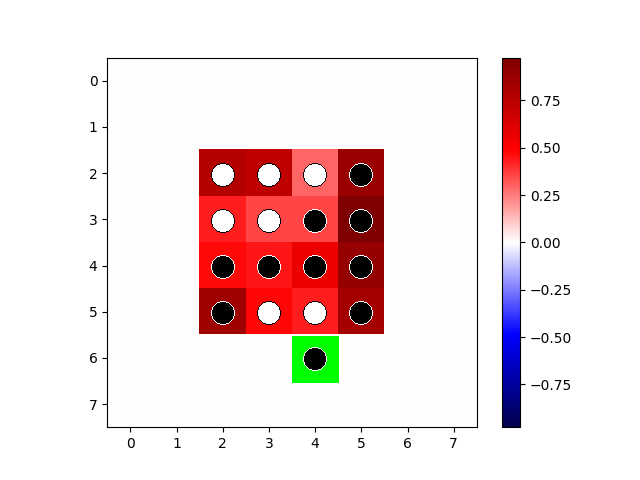

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]
53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


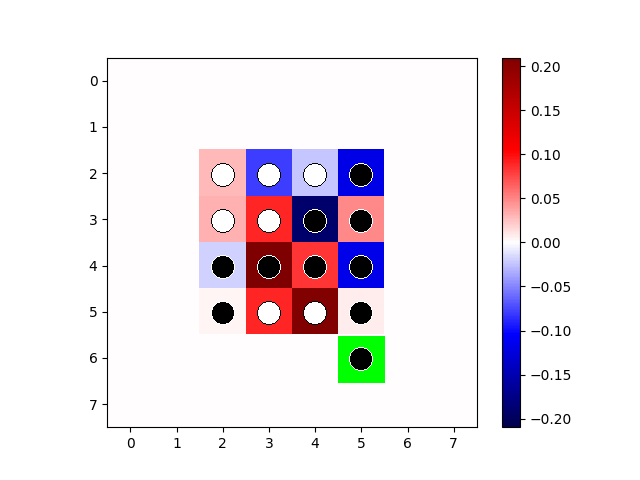

特異度


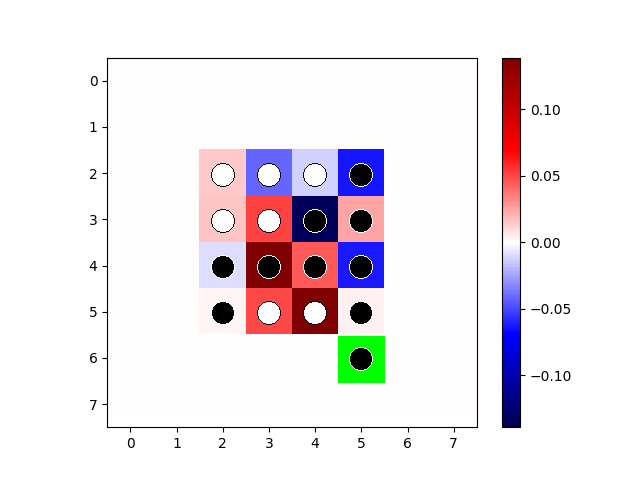

関連度


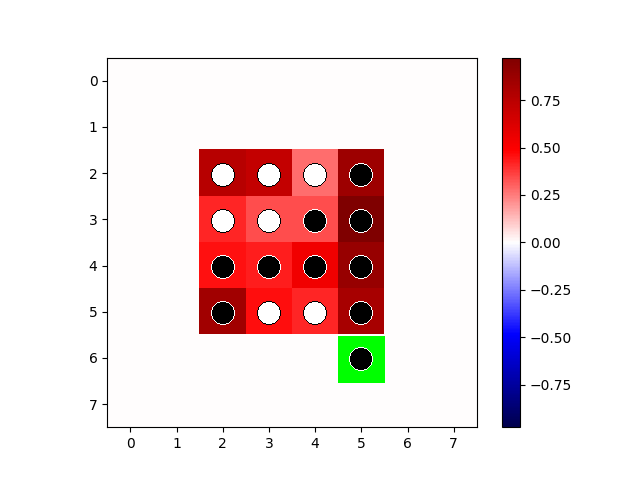

[[-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -2.875 -2.375 -1.125 -0.75  -0.875 -8.    -8.   ]
 [-8.    -2.5   -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -1.25  -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]
 [-8.    -8.    -1.125 -1.375 -1.375 -0.875 -8.    -8.   ]
 [-8.    -8.    -8.    -8.    -8.    -8.    -8.    -8.   ]]


In [27]:
#手番黒なら-1

turn = -1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



normalizedSARFA(board_0, -1,8)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WWBB----BBBB----BWWB------------------B
11
18
1
setboard -------------------WWB----WWBB----BBBB----BWWB------------------B
11
19
1
setboard ------------------W-WB----WWBB----BBBB----BWWB------------------B
12
20
1
setboard ------------------WW-B----WWBB----BBBB----BWWB------------------B
10
21
-1
setboard ------------------WWW-----WWBB----BBBB----BWWB------------------B
11
26
1
setboard ------------------WWWB-----WBB----BBBB----BWWB------------------B
11
27
1
setboard ------------------WWWB----W-BB----BBBB----BWWB------------------B
8
28
-1
setboard ------------------WWWB----WW-B----BBBB----BWWB------------------B
9
29
-1
setboard ------------------WWWB----WWB-----BBBB----BWWB------------------B
11
34
-1
setboard ------------------WWWB---

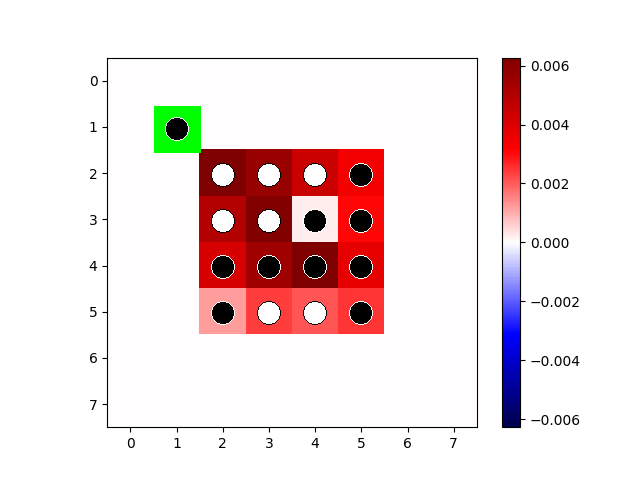

特異度


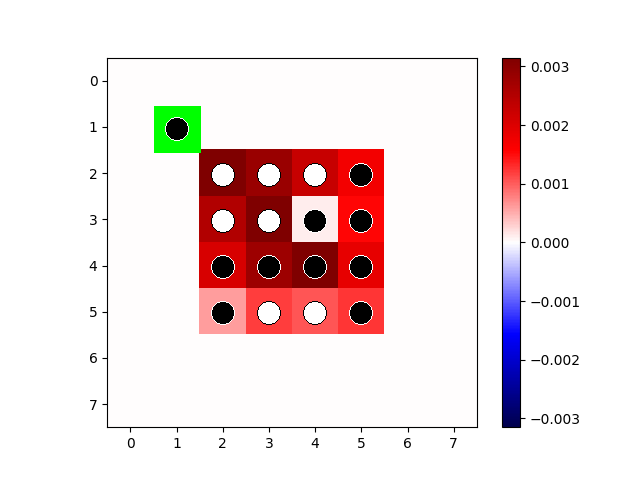

関連度


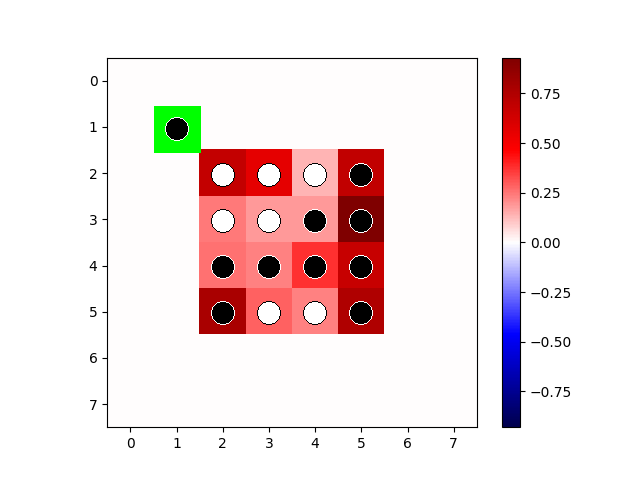

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


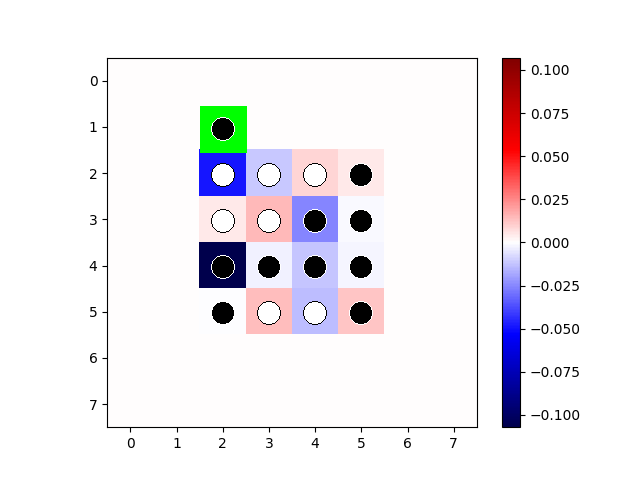

特異度


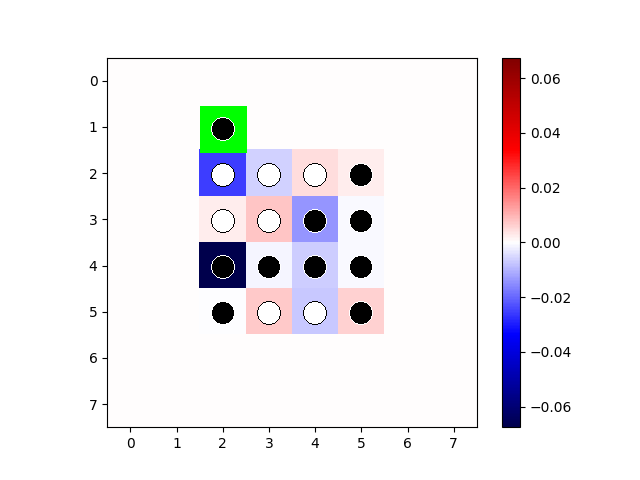

関連度


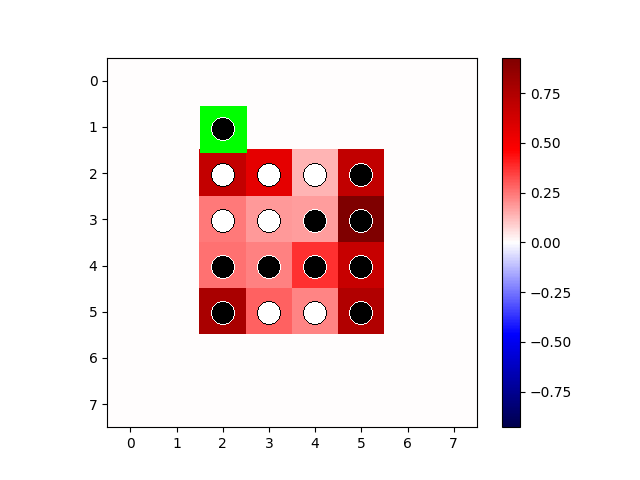

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


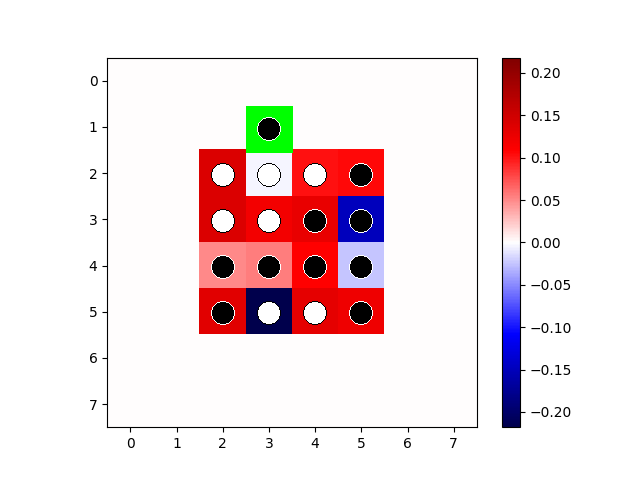

特異度


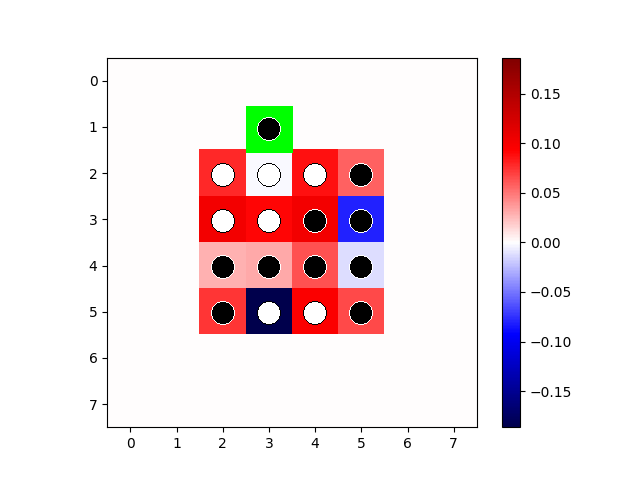

関連度


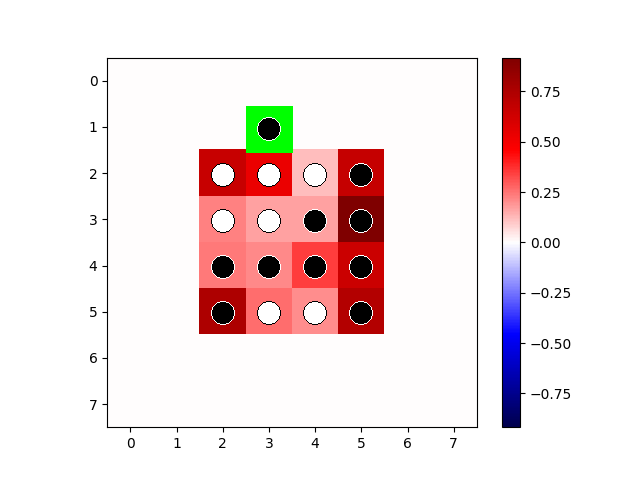

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


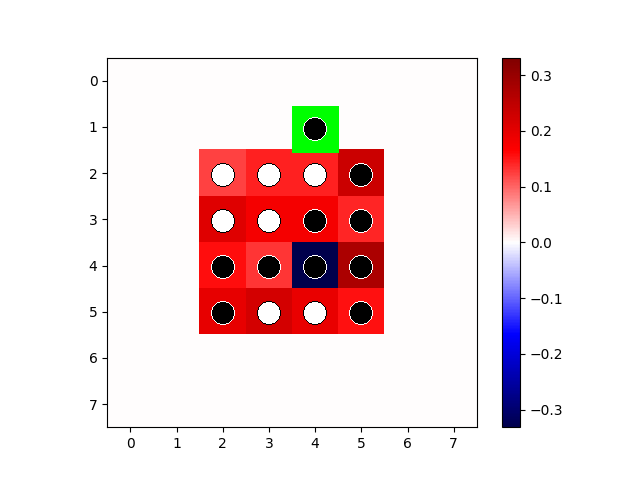

特異度


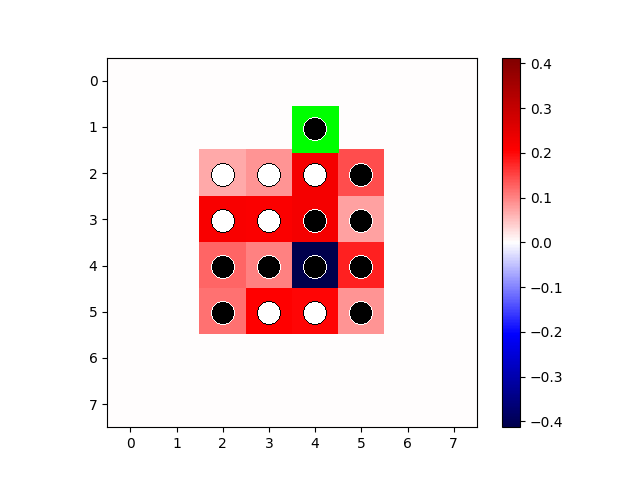

関連度


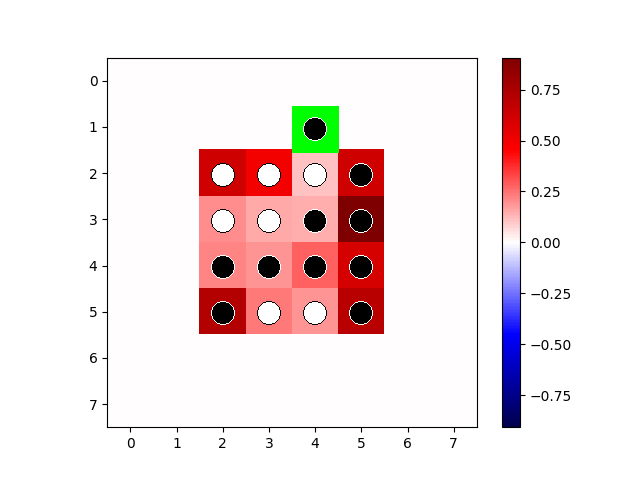

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


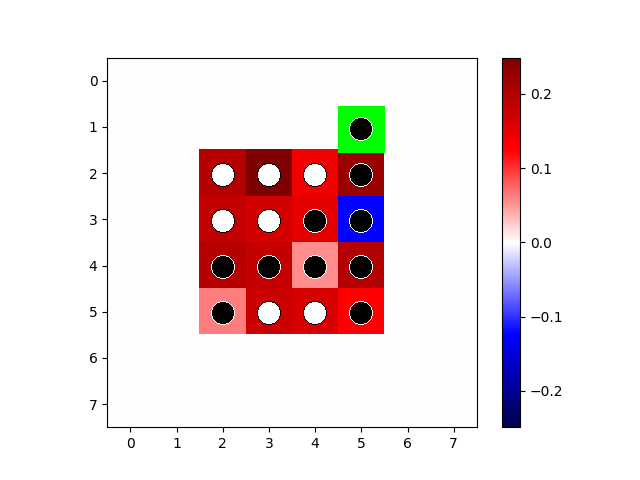

特異度


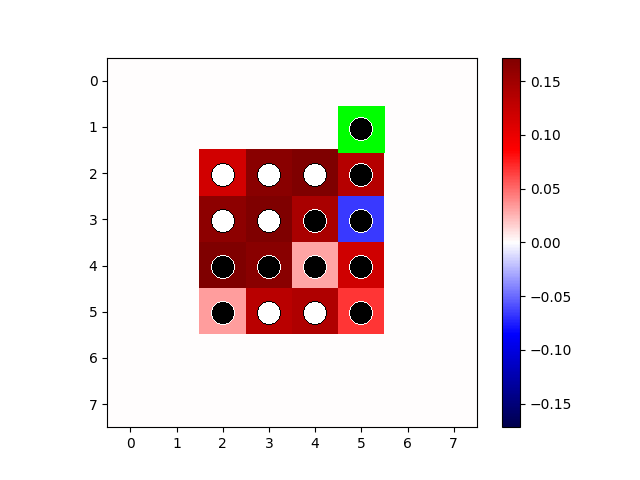

関連度


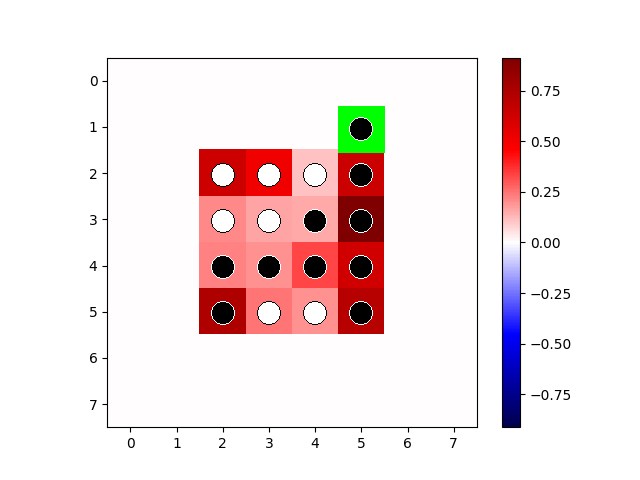

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


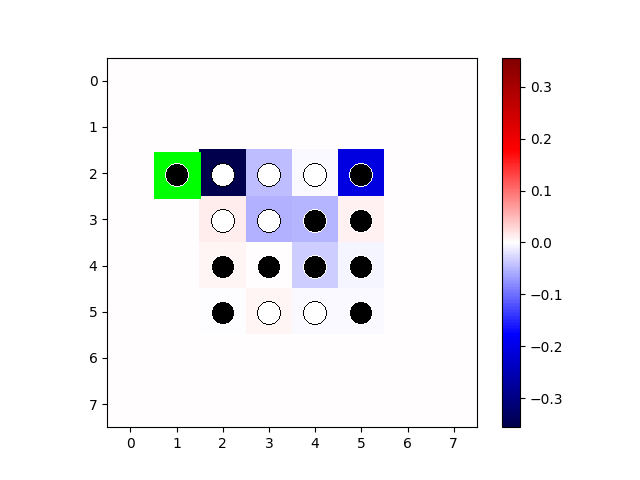

特異度


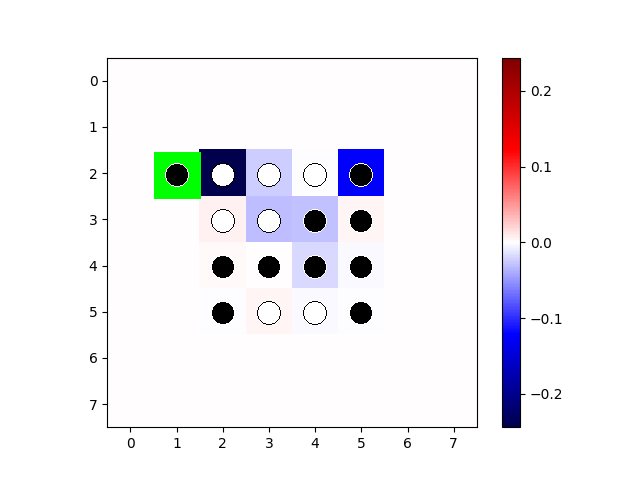

関連度


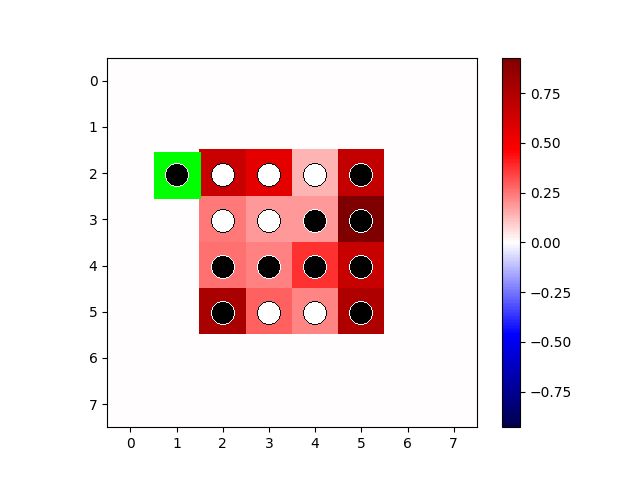

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


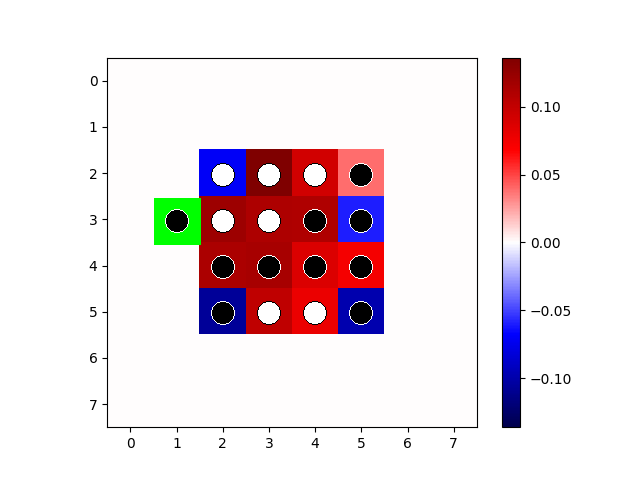

特異度


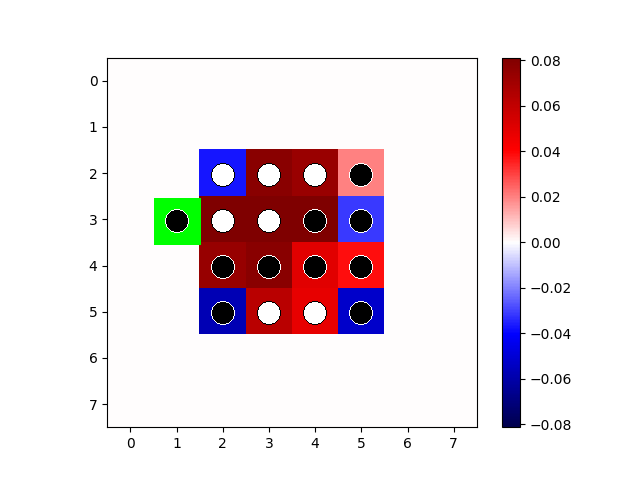

関連度


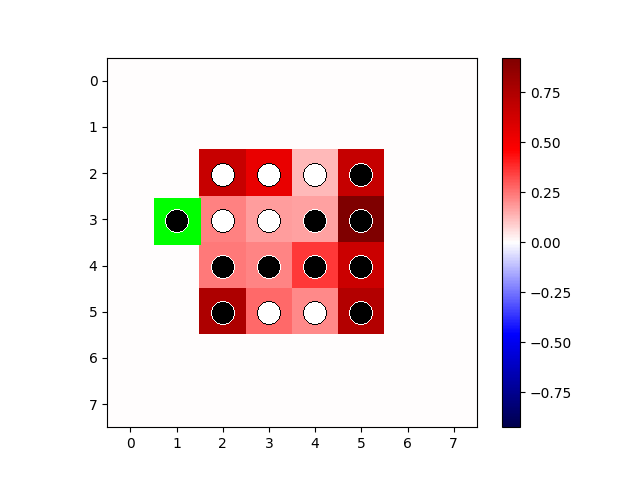

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


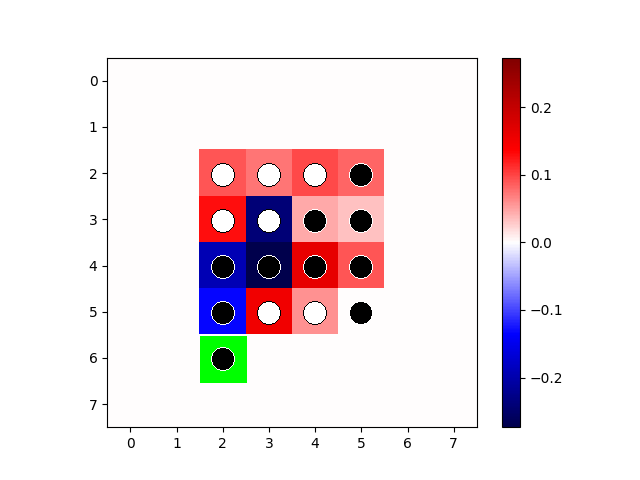

特異度


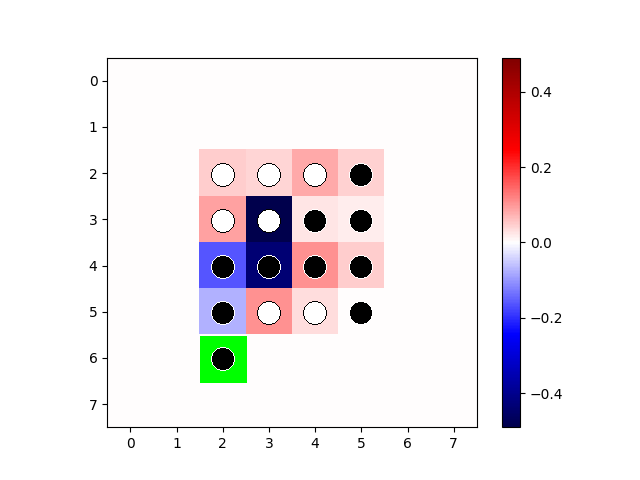

関連度


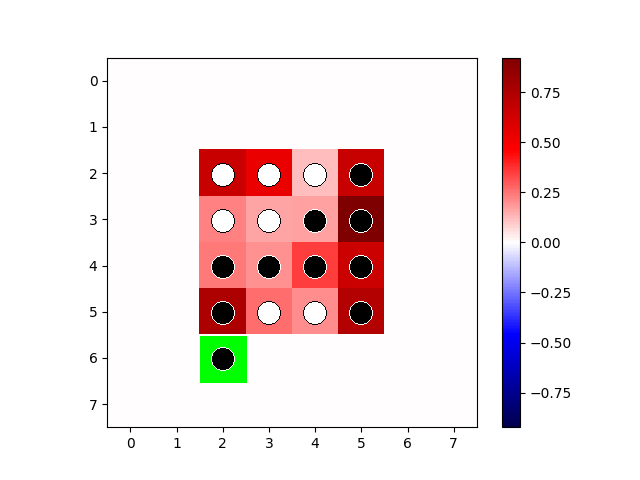

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


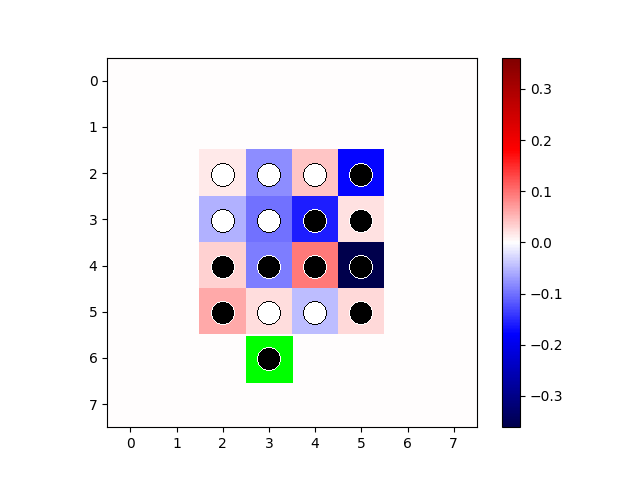

特異度


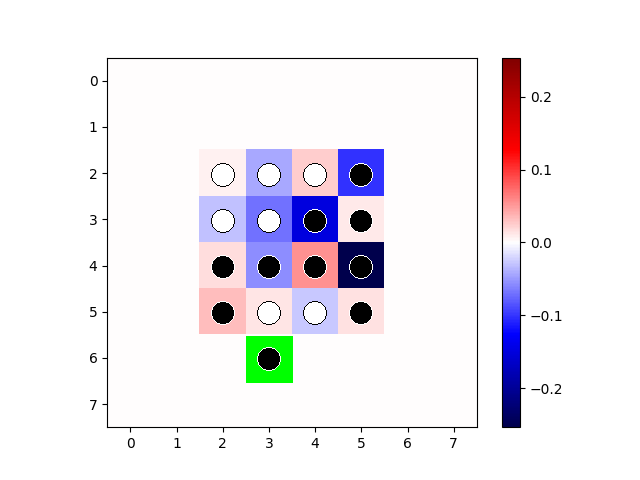

関連度


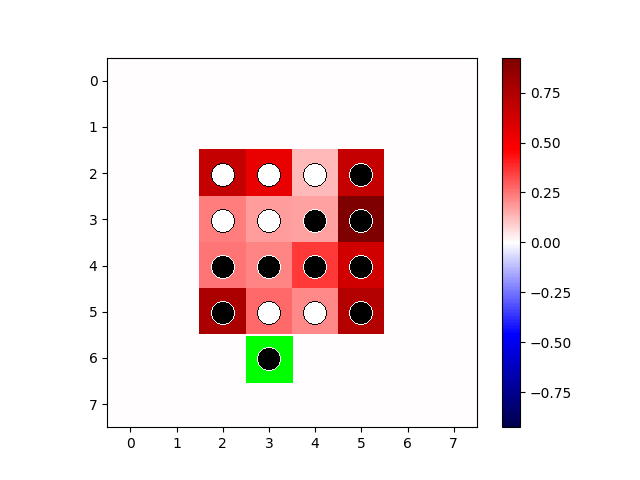

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


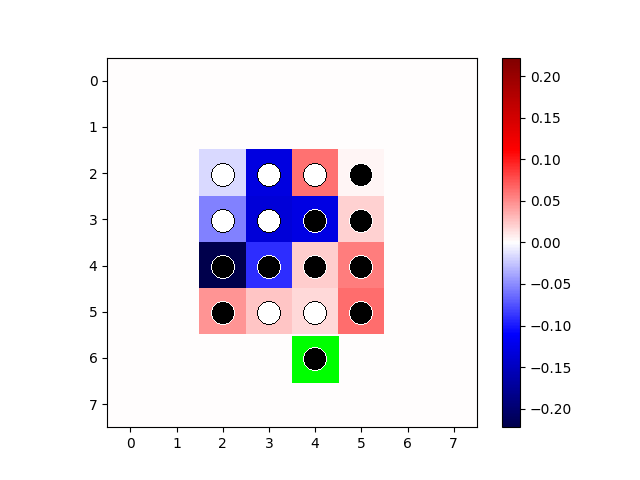

特異度


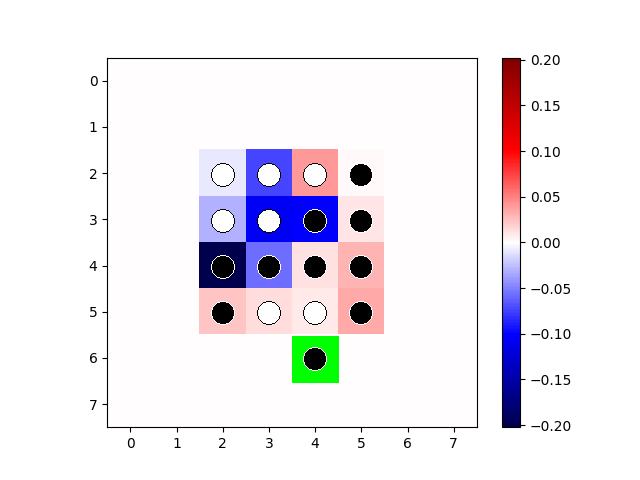

関連度


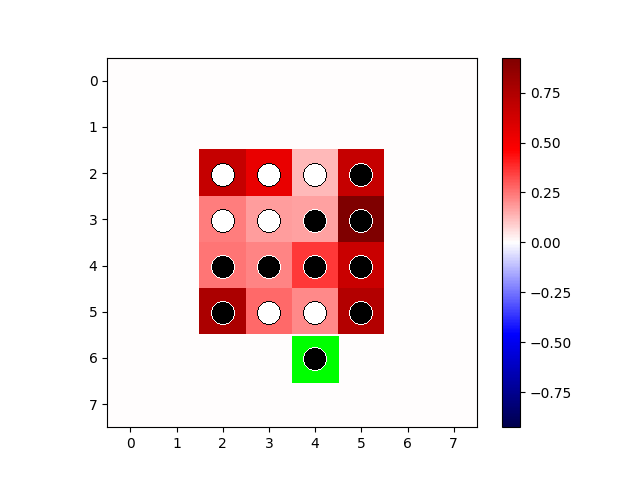

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]
53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


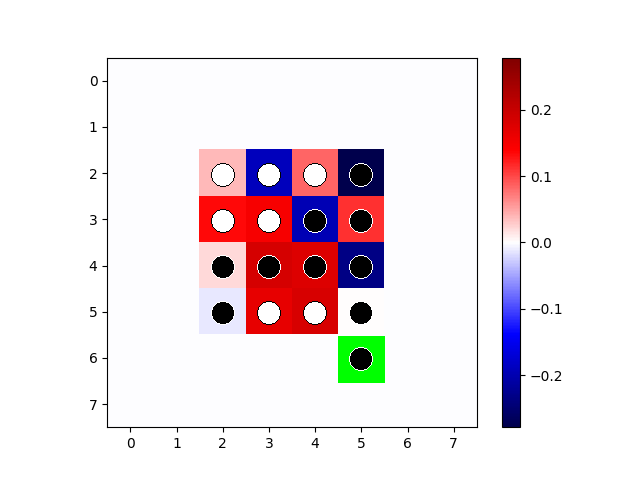

特異度


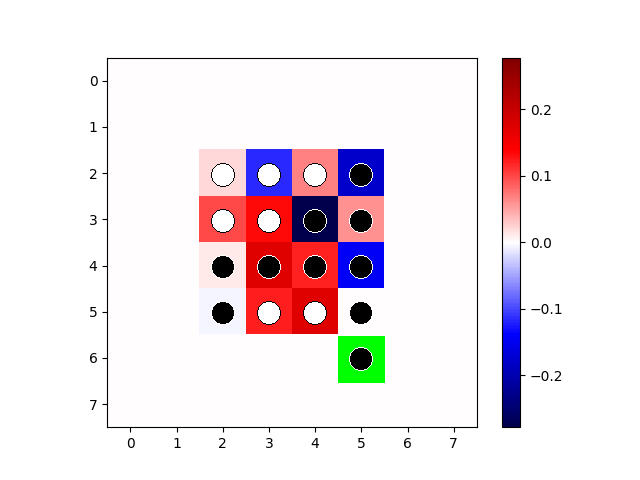

関連度


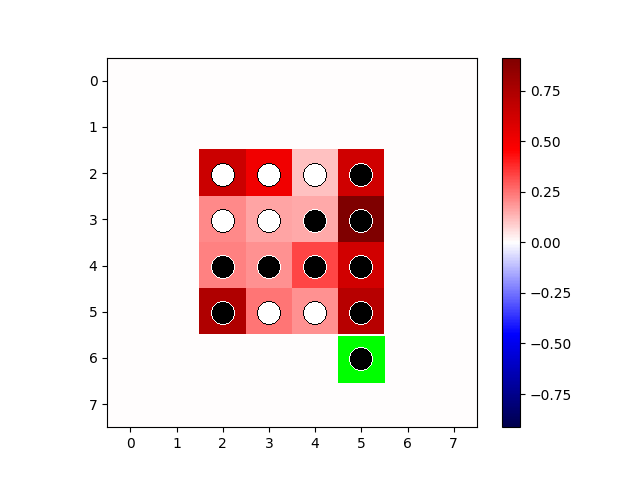

[[-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -5.75  -4.75  -2.25  -1.5   -1.75 -16.   -16.  ]
 [-16.    -5.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.    -2.5  -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]
 [-16.   -16.    -2.25  -2.75  -2.75  -1.75 -16.   -16.  ]
 [-16.   -16.   -16.   -16.   -16.   -16.   -16.   -16.  ]]


In [28]:


#手番黒なら-1

turn = -1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



normalizedSARFA(board_0,-1,4)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WWBB----BBBB----BWWB------------------B
11
18
1
setboard -------------------WWB----WWBB----BBBB----BWWB------------------B
11
19
1
setboard ------------------W-WB----WWBB----BBBB----BWWB------------------B
12
20
1
setboard ------------------WW-B----WWBB----BBBB----BWWB------------------B
10
21
-1
setboard ------------------WWW-----WWBB----BBBB----BWWB------------------B
11
26
1
setboard ------------------WWWB-----WBB----BBBB----BWWB------------------B
11
27
1
setboard ------------------WWWB----W-BB----BBBB----BWWB------------------B
8
28
-1
setboard ------------------WWWB----WW-B----BBBB----BWWB------------------B
9
29
-1
setboard ------------------WWWB----WWB-----BBBB----BWWB------------------B
11
34
-1
setboard ------------------WWWB---

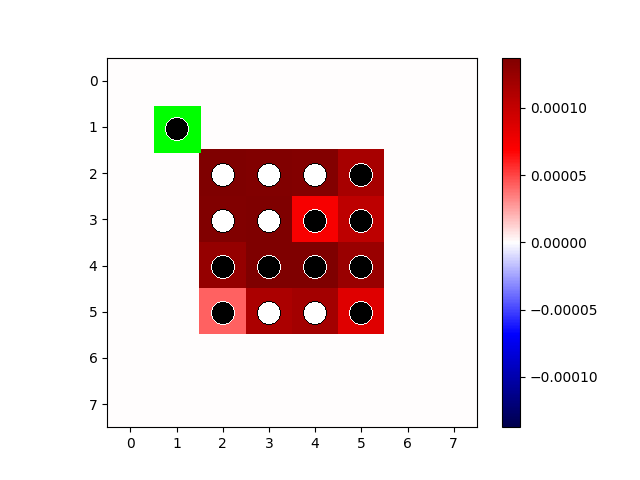

特異度


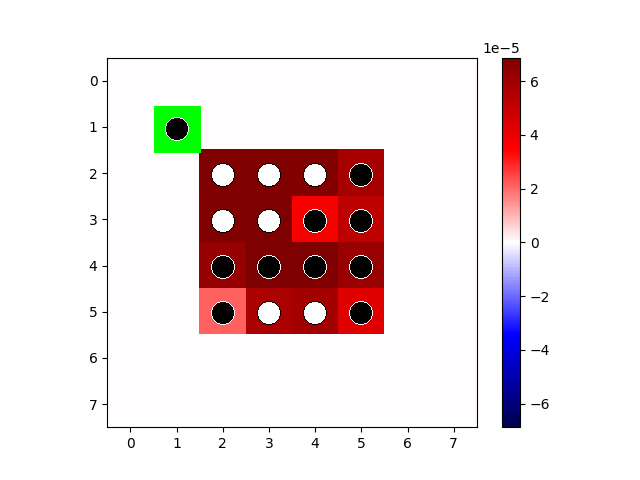

関連度


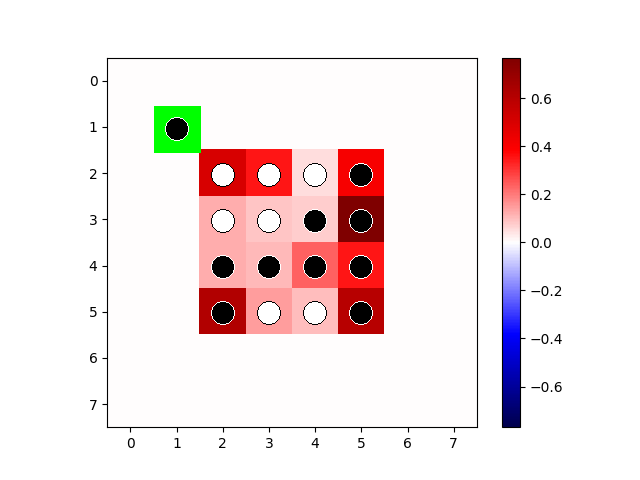

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
10
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


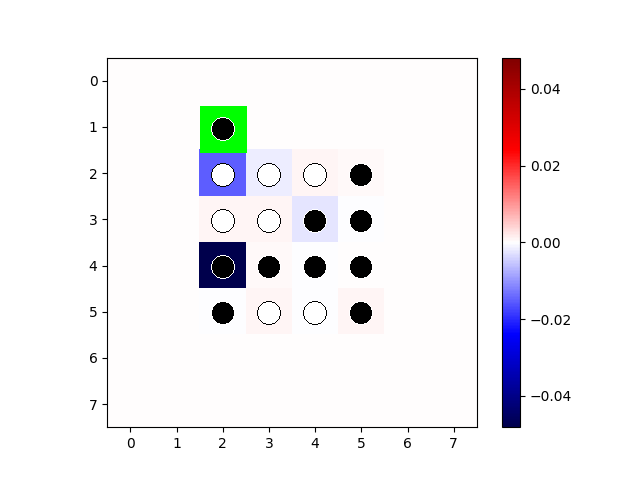

特異度


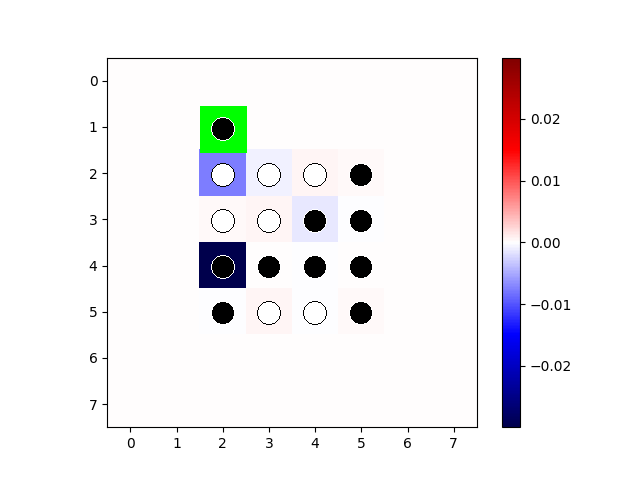

関連度


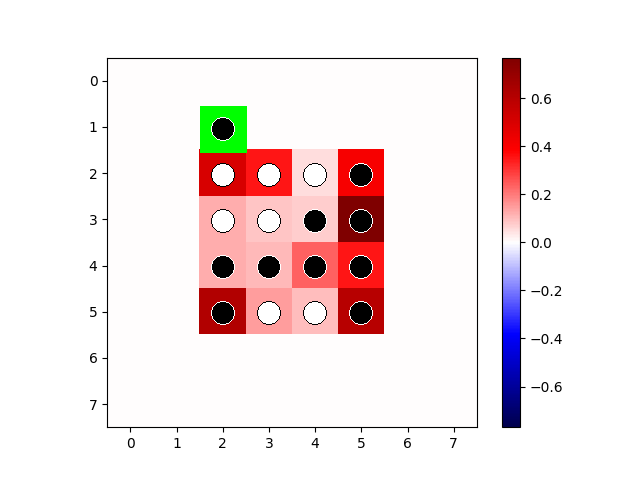

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
11
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


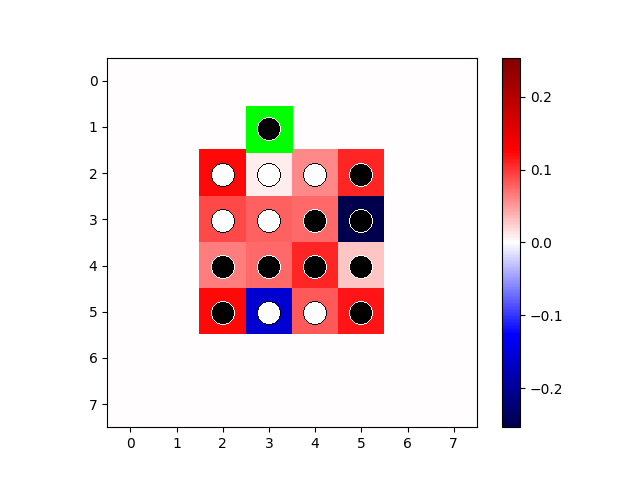

特異度


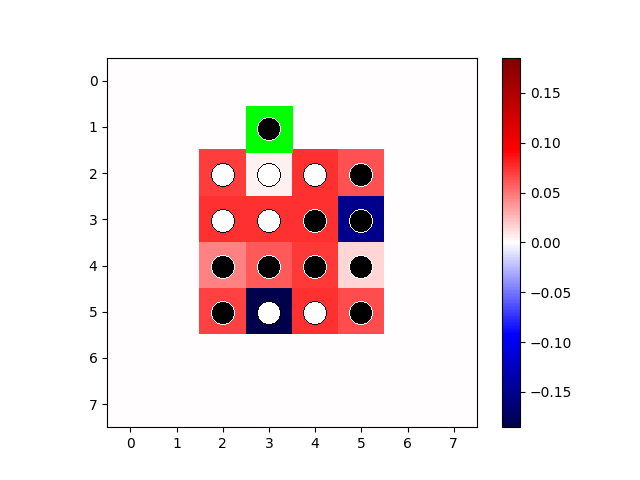

関連度


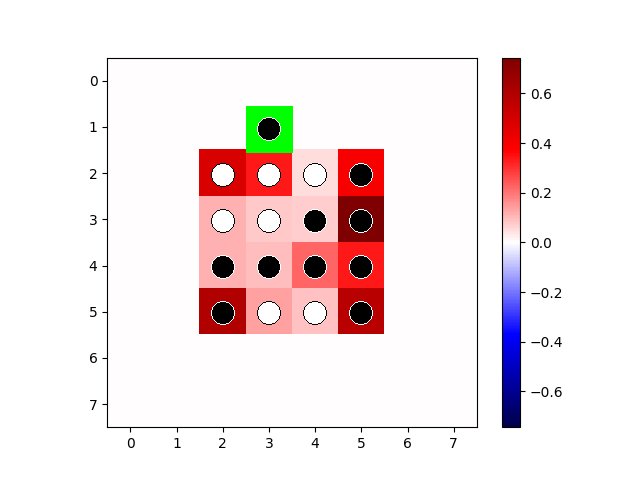

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
12
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


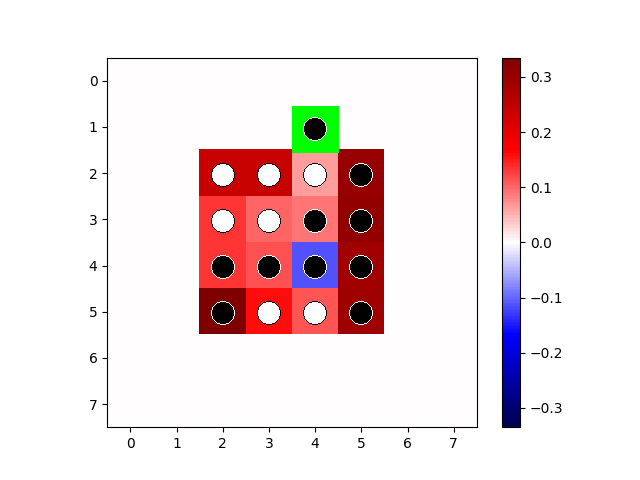

特異度


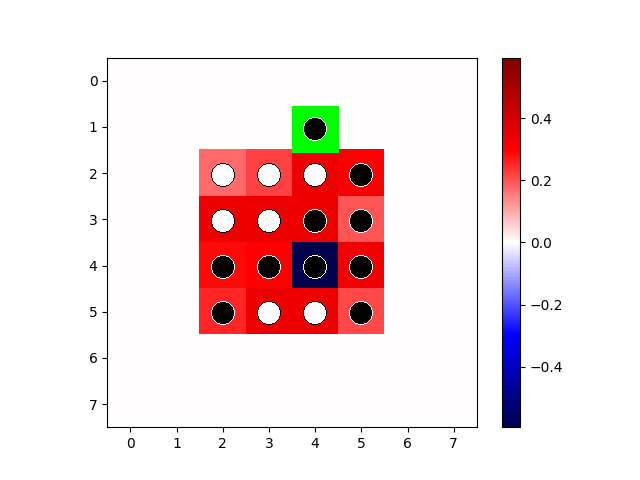

関連度


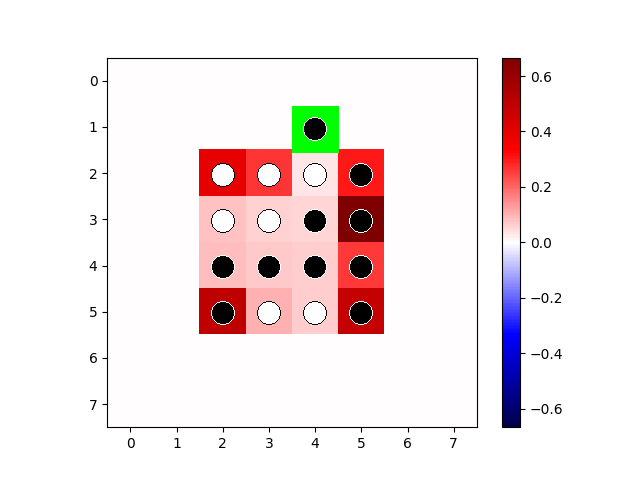

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


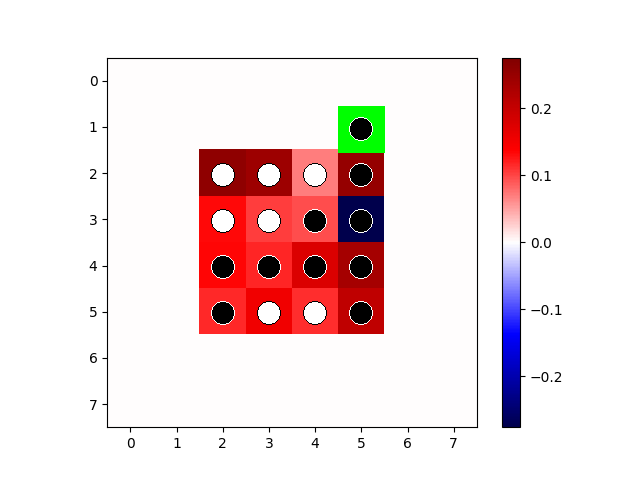

特異度


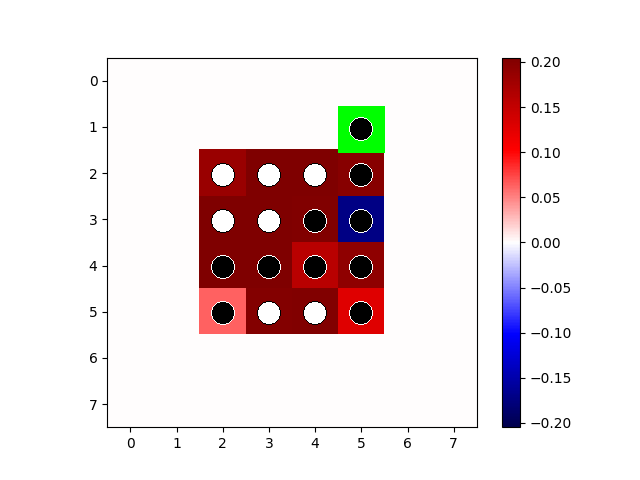

関連度


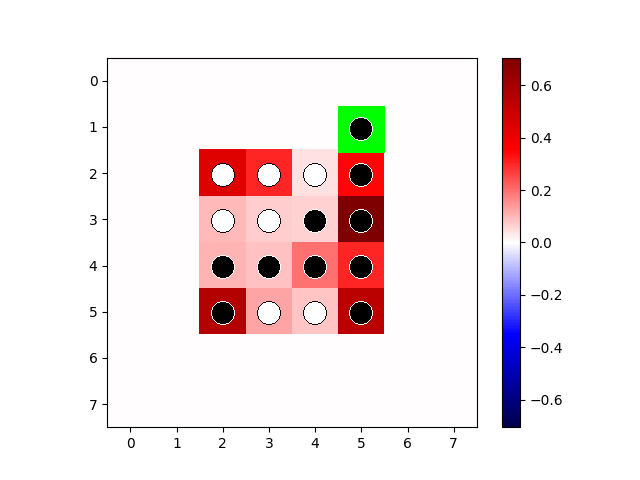

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
17
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


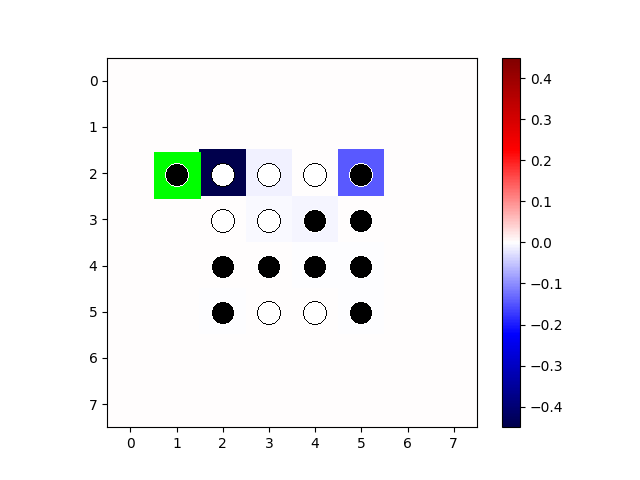

特異度


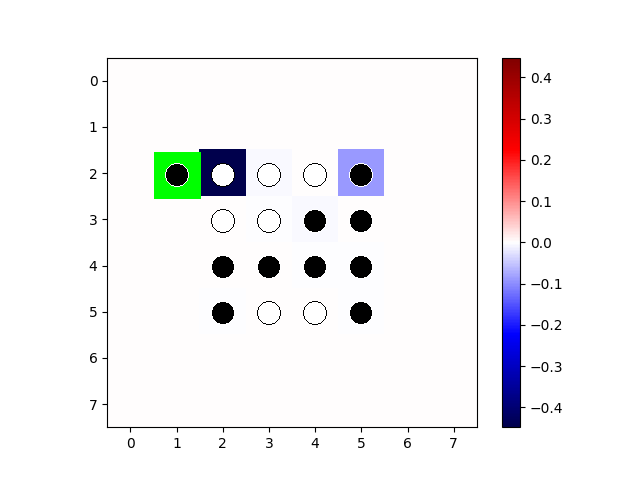

関連度


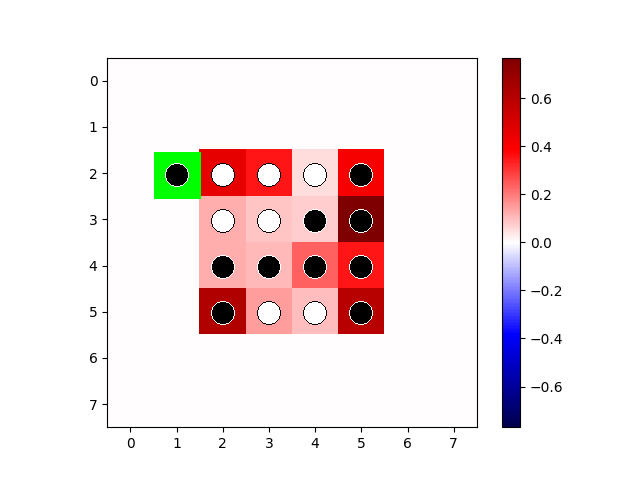

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
25
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


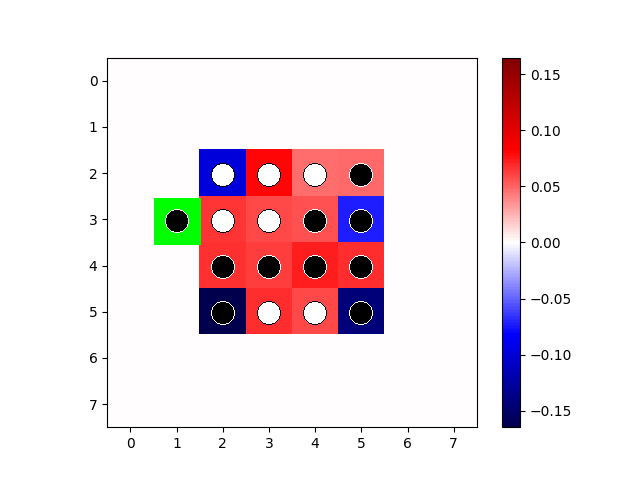

特異度


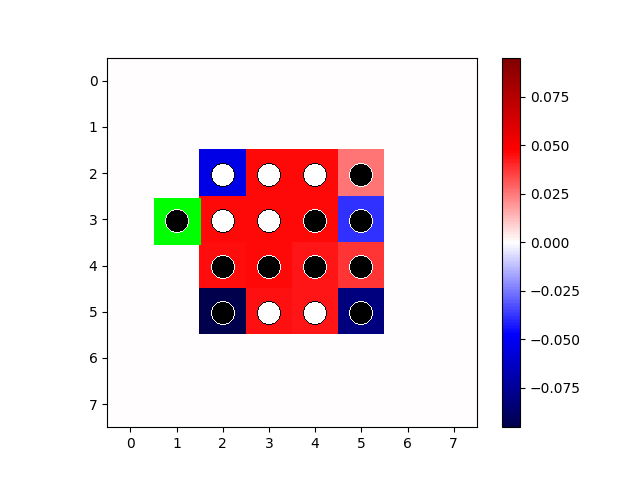

関連度


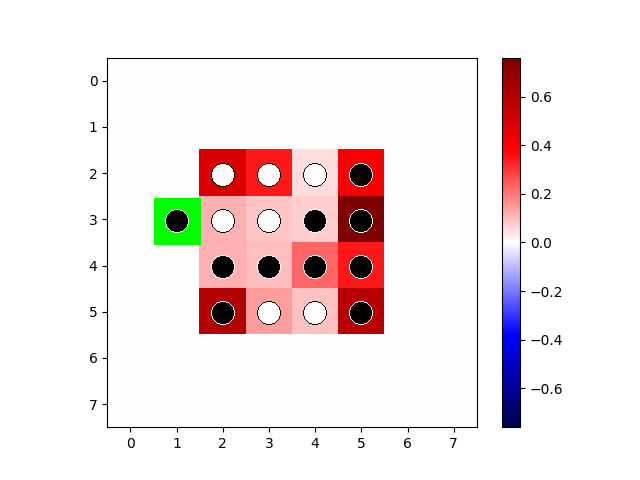

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
50
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


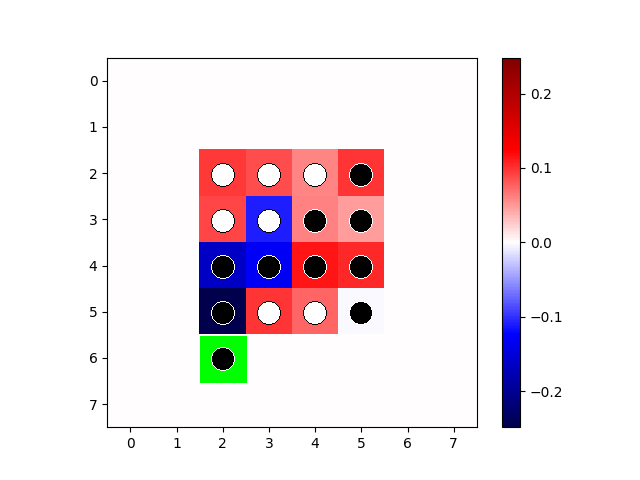

特異度


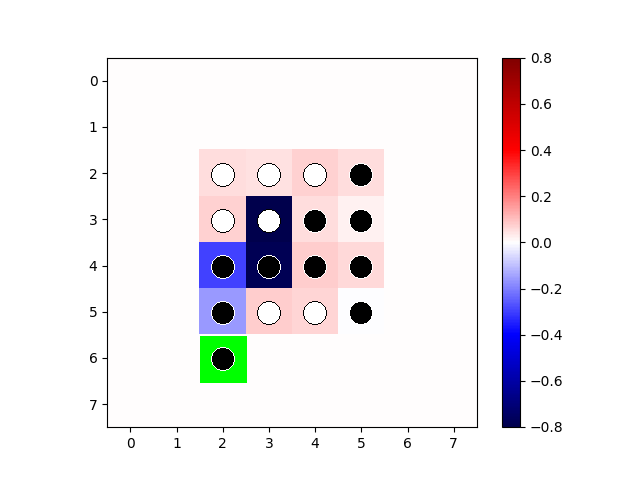

関連度


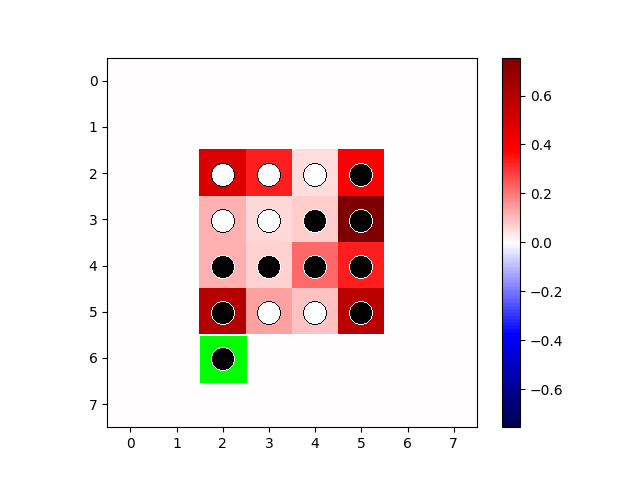

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
51
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


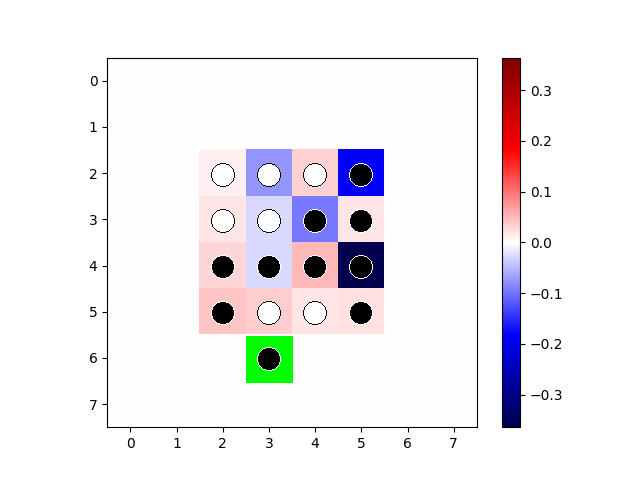

特異度


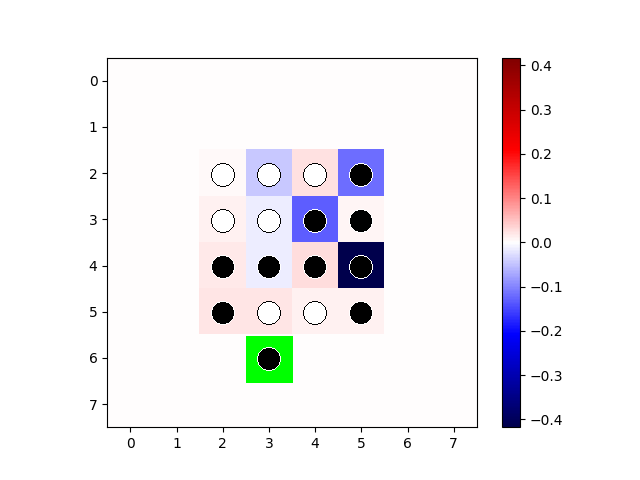

関連度


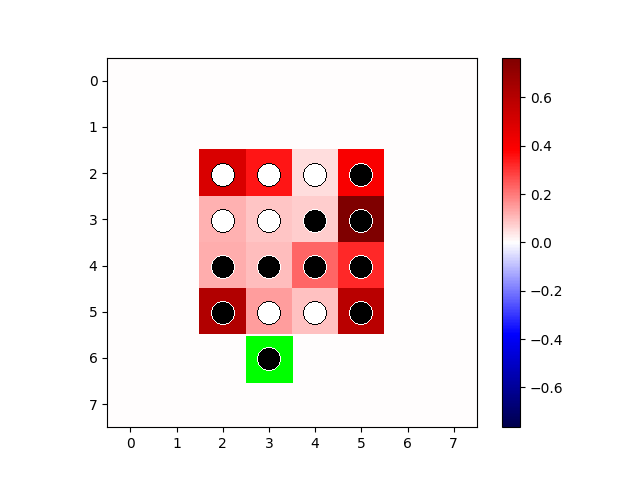

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
52
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


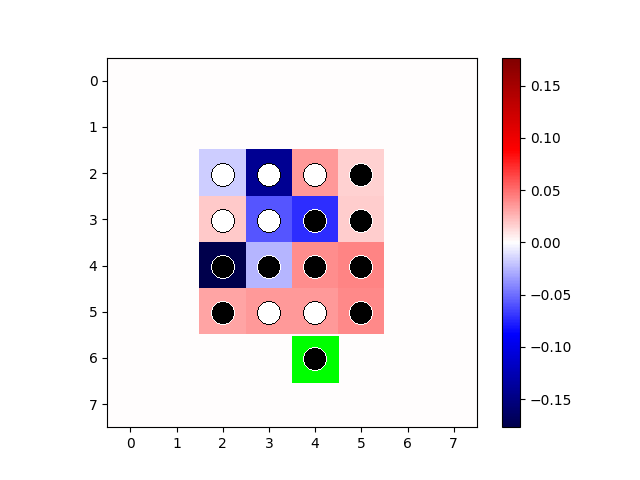

特異度


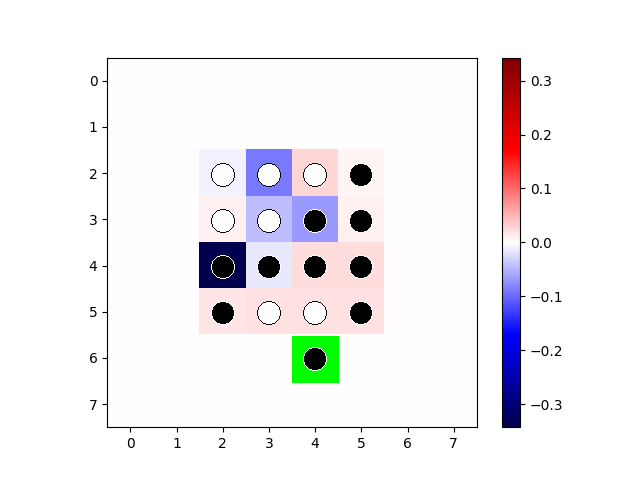

関連度


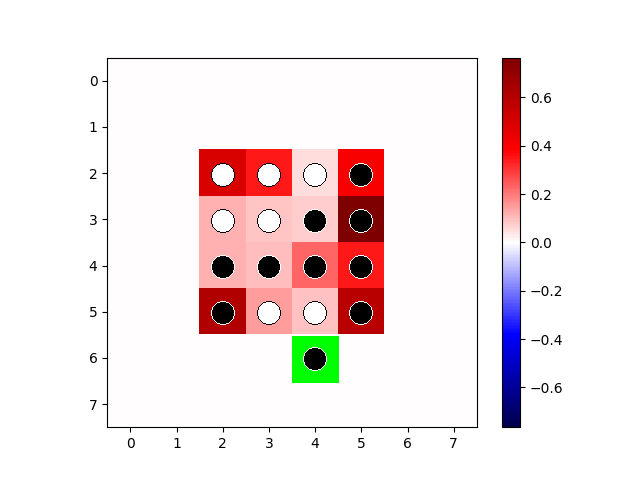

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]
53
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
貢献度


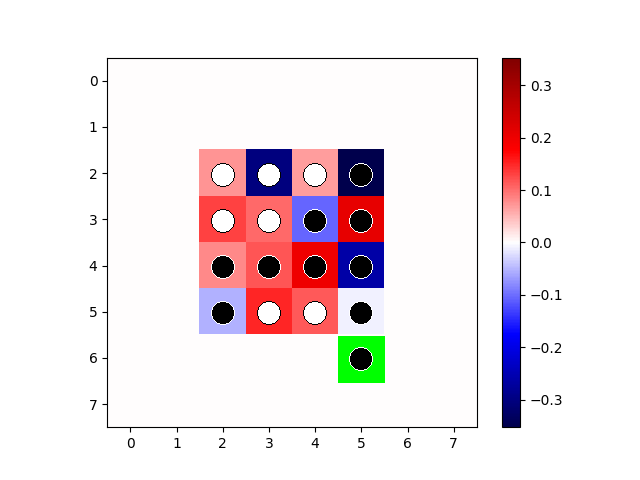

特異度


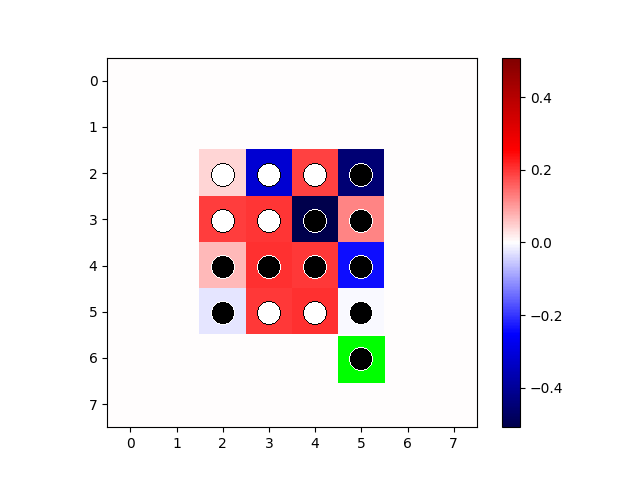

関連度


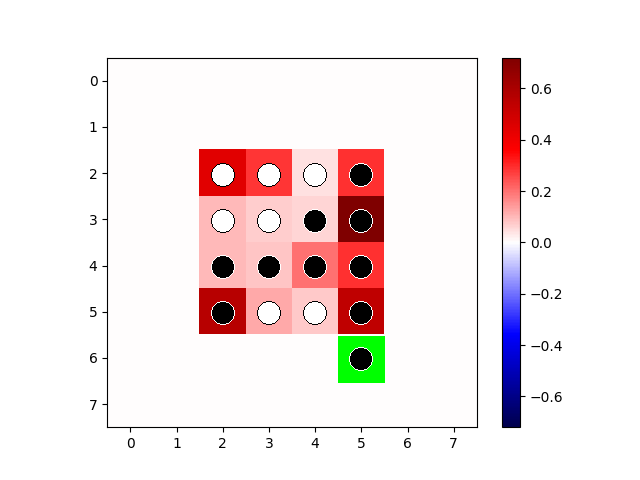

[[-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -11.5  -9.5  -4.5  -3.   -3.5 -32.  -32. ]
 [-32.  -10.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.   -5.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]
 [-32.  -32.   -4.5  -5.5  -5.5  -3.5 -32.  -32. ]
 [-32.  -32.  -32.  -32.  -32.  -32.  -32.  -32. ]]


In [29]:


#手番黒なら-1

turn = -1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



normalizedSARFA(board_0,-1,2)

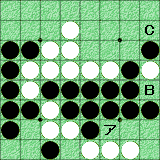

In [ ]:

turn = 1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                        [0,0,0,1,0,0,0,0],
                        [-1,-1,1,1,0,0,0,-1],
                        [-1,1,1,1,1,1,-1,1],
                        [-1,1,-1,-1,-1,-1,-1,0],
                        [-1,-1,1,-1,-1,-1,-1,-1],
                        [-1,0,1,1,-1,0,0,0],
                        [0,0,-1,0,1,1,1,0]])#full((8,8),-1)



SARFA(board_0,turn = -1)

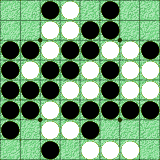

In [ ]:

turn = 1


                        # [0,0,0,0,0,0,0,0],
                        # [0,0,0,1,0,0,0,0],
                        # [1,1,1,1,0,0,0,1],
                        # [1,1,1,1,1,1,1,1],
                        # [1,1,1,1,1,1,1,0],
                        # [1,1,1,1,1,1,1,1],
                        # [1,0,1,1,1,0,0,0],
                        # [0,0,1,0,1,1,1,0]

board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



SARFA(board_0,turn = -1)

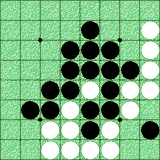

In [ ]:

turn = -1




board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)



SARFA(board_0,turn = -1)

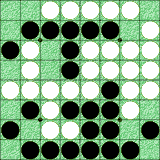

[[ 0  0  1  1  1  1  1  0]
 [ 0 -1 -1 -1 -1 -1  0  1]
 [-1  1  0 -1  1  1  1  1]
 [ 0  1  0 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]
 [ 0 -1  1 -1 -1 -1  1  0]
 [-1  0  1  1 -1 -1  0 -1]
 [ 0 -1 -1 -1 -1 -1 -1  0]]
setboard --WWWWW--BBBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
2
1
setboard ---WWWW--BBBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
3
1
setboard --W-WWW--BBBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
4
1
setboard --WW-WW--BBBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
5
1
setboard --WWW-W--BBBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
6
1
setboard --WWWW---BBBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
9
-1
setboard --WWWWW---BBBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
6
10
-1
setboard --WWWWW--B-BBB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
11
-1
setboard --WWWWW--BB-BB-WBW-BWWWW-W-BWWWWWWWWWBWW-BWBBBW-B-WWBB-B-BBBBBB-B
5
12
-1
setboard --WWWWW--BBB-B-WBW-BWWWW-W-BWWWWWWWWWB

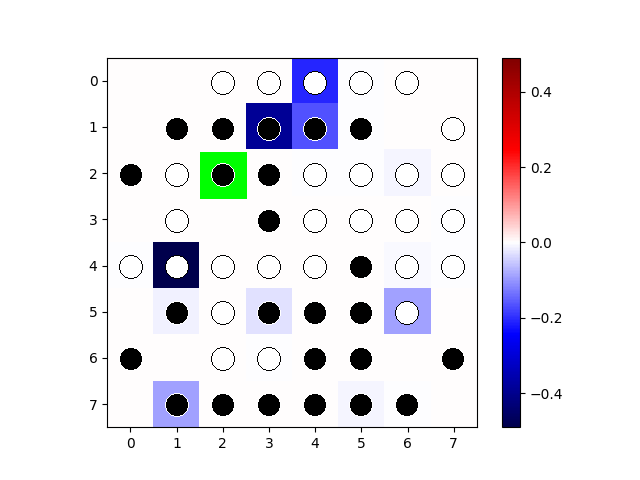

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -18 -64 -64 -64 -64 -64]
 [-22 -64 -11 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -29]
 [-64 -17 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
24
[[ 0  0  1  1  1  1  1  0]
 [ 0 -1 -1 -1 -1 -1  0  1]
 [-1  1  0 -1  1  1  1  1]
 [ 0  1  0 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]
 [ 0 -1  1 -1 -1 -1  1  0]
 [-1  0  1  1 -1 -1  0 -1]
 [ 0 -1 -1 -1 -1 -1 -1  0]]


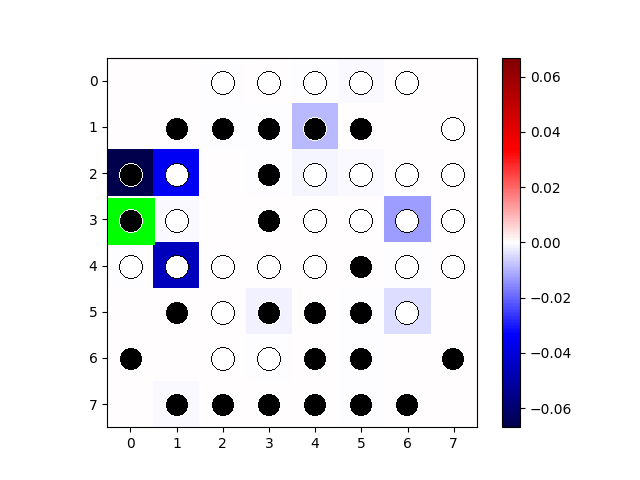

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -18 -64 -64 -64 -64 -64]
 [-22 -64 -11 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -29]
 [-64 -17 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
26
[[ 0  0  1  1  1  1  1  0]
 [ 0 -1 -1 -1 -1 -1  0  1]
 [-1  1  0 -1  1  1  1  1]
 [ 0  1  0 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]
 [ 0 -1  1 -1 -1 -1  1  0]
 [-1  0  1  1 -1 -1  0 -1]
 [ 0 -1 -1 -1 -1 -1 -1  0]]


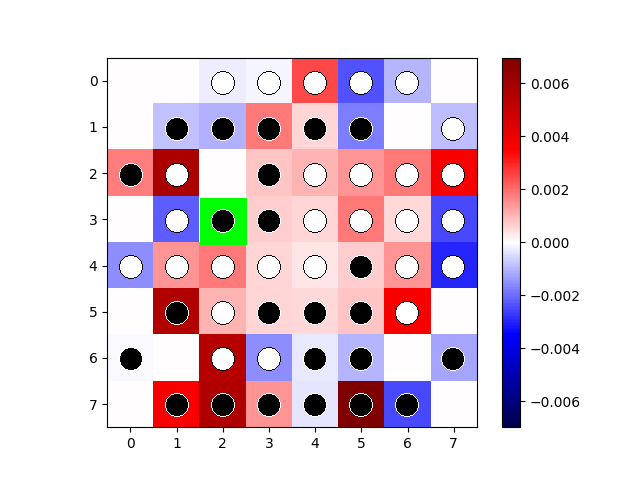

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -18 -64 -64 -64 -64 -64]
 [-22 -64 -11 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -29]
 [-64 -17 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
47
[[ 0  0  1  1  1  1  1  0]
 [ 0 -1 -1 -1 -1 -1  0  1]
 [-1  1  0 -1  1  1  1  1]
 [ 0  1  0 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]
 [ 0 -1  1 -1 -1 -1  1  0]
 [-1  0  1  1 -1 -1  0 -1]
 [ 0 -1 -1 -1 -1 -1 -1  0]]


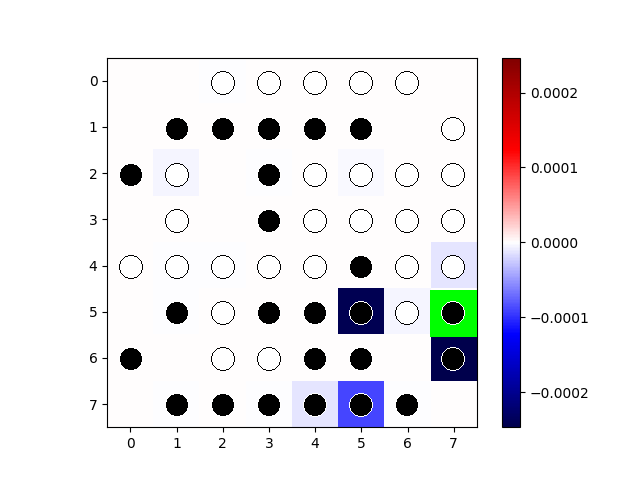

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -18 -64 -64 -64 -64 -64]
 [-22 -64 -11 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -29]
 [-64 -17 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
49
[[ 0  0  1  1  1  1  1  0]
 [ 0 -1 -1 -1 -1 -1  0  1]
 [-1  1  0 -1  1  1  1  1]
 [ 0  1  0 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]
 [ 0 -1  1 -1 -1 -1  1  0]
 [-1  0  1  1 -1 -1  0 -1]
 [ 0 -1 -1 -1 -1 -1 -1  0]]


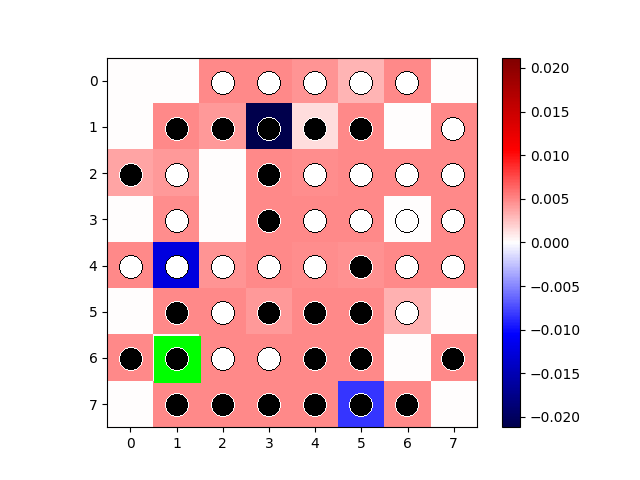

[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -18 -64 -64 -64 -64 -64]
 [-22 -64 -11 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -29]
 [-64 -17 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]


In [ ]:

turn = -1




board_0 = numpy.array([[0,0,1,1,1,1,1,0],
                    [0,-1,-1,-1,-1,-1,0,1],
                    [-1,1,0,-1,1,1,1,1],
                    [0,1,0,-1,1,1,1,1],
                    [1,1,1,1,1,-1,1,1],
                    [0,-1,1,-1,-1,-1,1,0],
                    [-1,0,1,1,-1,-1,0,-1],
                    [0,-1,-1,-1,-1,-1,-1,0]])#full((8,8),-1)



SARFA(board_0,turn = -1)

In [ ]:
# # MyEgaroucid_for_Console.outの終了

# myegaroucid.stdin.write('quit\n'.encode('utf-8'))
# myegaroucid.stdin.flush()